# <b> CREDIT EDA ASSIGNMENT </b>

### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

#### Importing Libraries

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import warnings
import warnings
warnings.filterwarnings(action='ignore')

### Reading data and data info

In [3]:
# Read the csv and create dataframe
pd.set_option('display.max_columns', 80)
App_data=pd.read_csv('application_data.csv')

In [4]:
# print head of dataframe
App_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# check rows and columns of dataframe
App_data.shape

(307511, 122)

In [6]:
# print the information of variables 
App_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# To check full info with columns and  their data types
App_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
# Check statistical info
App_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## <b> Data Cleaning </b>

#### Before proceeding further we can remove columns which wont help in our  Analysis

In [9]:
to_drop_cols=["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
# Drop the columns
App_data.drop(to_drop_cols,axis=1,inplace=True)

In [10]:
#Print shape of dataframe
App_data.shape

(307511, 96)

### Handling Missing Values

In [11]:
# check missing or null value percentage of each column
Null_perc=App_data.isnull().mean()*100
Null_perc

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 96, dtype: float64

In [12]:
# Check columns where missing value percentage is >40
Null_perc[Null_perc>40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [13]:
#Convert the null columns to list for removal
above_40=Null_perc[Null_perc>40].index.to_list()


<b> As these columns are having more than 40 percentage value as missing we can drop them </b>

In [14]:
# drop the columns
App_data.drop(columns=above_40,inplace=True)

In [15]:
# check shape of dataframe now
App_data.shape

(307511, 47)

In [16]:
# check App_data
App_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

<b> checking the rest of null values </b>

In [18]:
#Use mean to check null values
App_data.isnull().mean() *100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

<b> Handling Missing values in Occupation column </b>

In [19]:
App_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

This is categorical column and if we used mode to impute values which is Laborers then it will effect data.Also we cant remove this column as it is needed for analysis.So better to keep missing values in a separate category "Missing"

In [17]:
#Replace NAN values with Missing
App_data.OCCUPATION_TYPE = App_data.OCCUPATION_TYPE.replace(np.nan, "Missing")

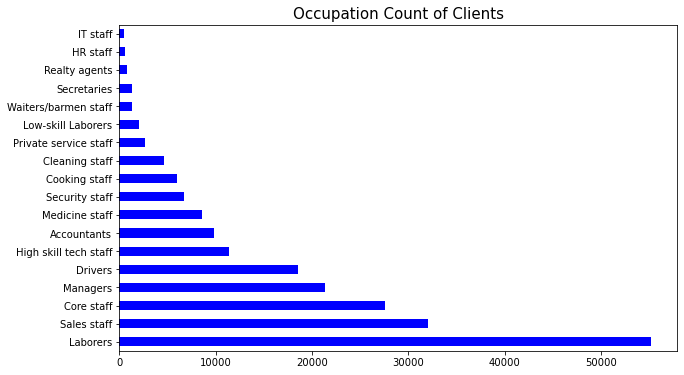

In [18]:
#plot the occupation column without Missing
plt.figure(figsize=(10,6))
App_data[~(App_data.OCCUPATION_TYPE=='Missing')]['OCCUPATION_TYPE'].value_counts().plot.barh(color='blue')
plt.title('Occupation Count of Clients',size=15)
plt.show()

<b> Handling DAYS_LAST_PHONE_CHANGE  & CNT_FAM_MEMBERS</b>

Since it have only small values can remove that row

In [19]:
# Removing null value for CNT_FAM_MEMBERS
App_data=App_data[~App_data.CNT_FAM_MEMBERS.isnull()]

In [20]:
# Removing null value for DAYS_LAST_PHONE_CHANGE
App_data=App_data[~App_data.DAYS_LAST_PHONE_CHANGE.isnull()]

<b> Handling NAME_TYPE_SUITE </b>

In [21]:
App_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

As its a categorical column we can impute the null value with mode

In [27]:
App_data.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [22]:
# Replace NA value with mode
App_data.NAME_TYPE_SUITE.fillna(App_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

<b> Handling EXT_SOURCE_2 & EXT_SOURCE_3 </b>

In [23]:
#EXT_SOURCE_2: Numerical column so use statistical info
for i in ['EXT_SOURCE_2','EXT_SOURCE_3']:
    print(i,'\n', App_data[i].describe(),'\n')

EXT_SOURCE_2 
 count    3.068490e+05
mean     5.143916e-01
std      1.910603e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64 

EXT_SOURCE_3 
 count    246545.000000
mean          0.510852
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64 



As mean and median are closer and impute with mean wont make much difference

In [24]:
#Fill NA values with mean
App_data.EXT_SOURCE_2.fillna((App_data['EXT_SOURCE_2'].mean()), inplace=True)
App_data.EXT_SOURCE_3.fillna((App_data['EXT_SOURCE_3'].mean()), inplace=True)

<b> Handling AMT_ANNUITY & AMT_GOODS_PRICE </b>

As both columns has low missing values we can impute them with median or mean

In [25]:
#Impute with median
App_data.AMT_ANNUITY.fillna((App_data.AMT_ANNUITY.median()), inplace=True)
App_data.AMT_GOODS_PRICE.fillna((App_data.AMT_GOODS_PRICE.median()), inplace=True)

 <b> Handling For Null values > 13% </b>

In [26]:
for i in ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
    print(i,':\n',App_data[i].value_counts(dropna=False),end='\n\n')

AMT_REQ_CREDIT_BUREAU_HOUR :
 0.0    264365
NaN     41517
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

AMT_REQ_CREDIT_BUREAU_DAY :
 0.0    264502
NaN     41517
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

AMT_REQ_CREDIT_BUREAU_WEEK :
 0.0    257455
NaN     41517
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

AMT_REQ_CREDIT_BUREAU_MON :
 0.0     222232
NaN      41517
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1


From this we found that these can be categorical values like hour,day,week,month,quarter,year.so we can impute the columns 
with their mode

In [27]:
#Impute null values of columns with mode
cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in cols:
    imp_val=App_data[i].mode()[0]
    App_data[i]=App_data[i].fillna(imp_val)

<b> Handling other null values </b>

In [28]:
#Analysing OBS_30_CNT_SOCIAL_CIRCLE
App_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306487.000000
mean          1.422246
std           2.400997
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

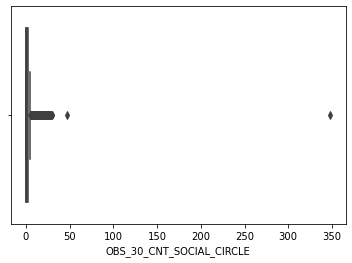

In [29]:
#As there is some jump in data from 75 to max we can check whether column has outliers
sns.boxplot(App_data.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [30]:
# so we can see outliers in data.so its better to impute column with median than mean
App_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(App_data.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

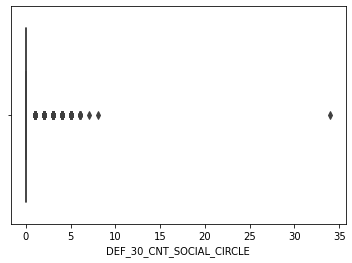

In [31]:
# similarly we can check for other columns also
sns.boxplot(App_data.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

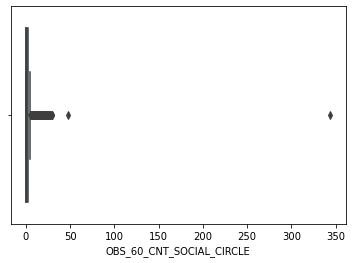

In [32]:
sns.boxplot(App_data.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

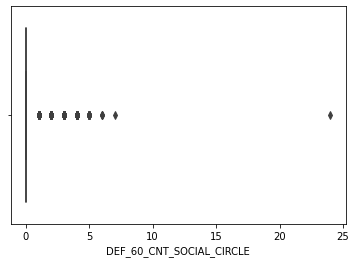

In [39]:
sns.boxplot(App_data.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

As all columns have outliers we can impute missing data with median as mean can skew the data and this wont make big difference in analysis as missing values are small

In [33]:
#Imputing with median
App_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(App_data.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
App_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(App_data.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
App_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(App_data.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [34]:
#Again check Missing values Percentage
App_data.isnull().mean() *100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_

<b> Now we are done with handling Missing values </b>

### Checking and Correcting incorrect data 

In [42]:
#Analysis of CODE_GENDER
App_data.CODE_GENDER.value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

Its not possible for Gender to be XNA.it can be typing error or customer missed to provide info.

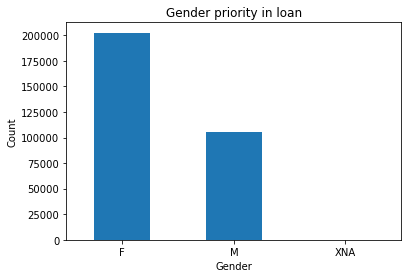

In [35]:
App_data.CODE_GENDER.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Gender priority in loan')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

So we can see that Female took loans more than Male and they are double in number than Male.so we can replace XNA values with 'F'

In [36]:
#Replace XNA with F
App_data.CODE_GENDER.replace('XNA','F',inplace=True)

In [37]:
# Analysis of DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH columns
list=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in list:
    print(i,':\n',App_data[i].value_counts(),end='\n\n')
    

DAYS_BIRTH :
 -13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

DAYS_EMPLOYED :
  365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

DAYS_REGISTRATION :
 -1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

DAYS_ID_PUBLISH :
 -4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

DAYS_LAST_PHONE_CHANGE :
  0.0       37672
-1.0        2812
-2.0        2318
-

we can find that negative values are present but days cant be negative.so we need to change all values to positive

In [38]:
#Change negative values to positive
App_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=App_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()

In [39]:
#Its better to Convert days to Years for readability
list1=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in list1:
    App_data[i]=App_data[i].apply(lambda x:round(x/365))

In [40]:
# for better reading we can rename the columns
App_data.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

In [49]:
#Analysing ORGANIZATION column
App_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110644
XNA                       18.007336
Self-employed             12.491382
Other                      5.425225
Medicine                   3.639905
Business Entity Type 2     3.431455
Government                 3.383327
School                     2.891957
Trade: type 7              2.546600
Kindergarten               2.237340
Construction               2.185634
Business Entity Type 1     1.945966
Transport: type 4          1.755401
Trade: type 3              1.135255
Industry: type 9           1.095256
Industry: type 3           1.065989
Security                   1.055907
Housing                    0.961926
Industry: type 11          0.879327
Military                   0.856563
Bank                       0.815263
Agriculture                0.798028
Police                     0.761281
Transport: type 2          0.716729
Postal                     0.701445
Security Ministries        0.641935
Trade: type 2              0.617870
Restaurant                 0

We can see that there is an "XNA" entry in ORGANIZATION_TYPE and it has large value.For safety we can replace it with 'UNKNOWN'.
Moreover we have same Organization Type name with types.For easy Analysis its better to use only organization Type name.

In [41]:
# Replace XNA with Unknown
App_data.ORGANIZATION_TYPE.replace('XNA','UNKNOWN',inplace=True)

In [42]:
#Splitting data for better Analysis
App_data.ORGANIZATION_TYPE=App_data.ORGANIZATION_TYPE.apply(lambda x:x.split()[0]+' '+x.split()[1] if x.find('Type')>0 else x)
App_data.ORGANIZATION_TYPE=App_data.ORGANIZATION_TYPE.apply(lambda x:x.split(':')[0] if x.find('type')>0 else x)


In [52]:
# check value counts once again
App_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity        27.488065
UNKNOWN                18.007336
Self-employed          12.491382
Other                   5.425225
Trade                   4.654838
Industry                4.653863
Medicine                3.639905
Government              3.383327
Transport               2.923501
School                  2.891957
Kindergarten            2.237340
Construction            2.185634
Security                1.055907
Housing                 0.961926
Military                0.856563
Bank                    0.815263
Agriculture             0.798028
Police                  0.761281
Postal                  0.701445
Security Ministries     0.641935
Restaurant              0.588928
Services                0.512182
University              0.431533
Hotel                   0.314138
Electricity             0.308935
Insurance               0.193816
Telecom                 0.187637
Emergency               0.182109
Advertising             0.139509
Realtor                 0.128777
Culture   

### OUTLIER ANALYSIS

Outlier Analysis can be carried out for continuous Numerical columns to find Outliers

In [43]:
# create a function for outlier analysis
def outlier(column):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.distplot(App_data[column])
    plt.title('Distplot of'+' '+column)
    plt.subplot(1,2,2)
    sns.boxplot(y=App_data[column])
    plt.title('Boxplot of'+' '+column)
    plt.suptitle('Outlier Analysis of'+' '+column ,size=15)
    plt.tight_layout(pad=3)
    plt.show()

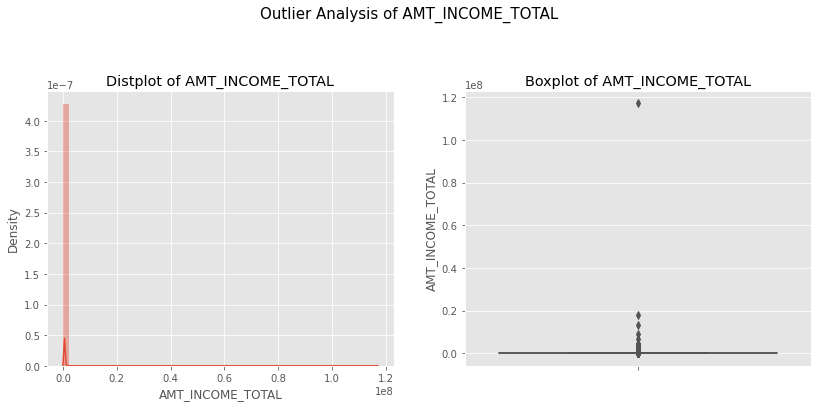

In [44]:
#Analysis of AMT_INCOME_TOTAL
outlier('AMT_INCOME_TOTAL')

We couldnt get any insights from above graph.There are lot of values above upper whisker.So we can get into an assumption that outliers are there.One outlier lies at 120 million.

In [45]:
#statistical info of income
App_data['AMT_INCOME_TOTAL'].describe()

count    3.075080e+05
mean     1.687970e+05
std      2.371237e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [46]:
# calculate percentiles
App_data['AMT_INCOME_TOTAL'].quantile([0.9,0.99,0.999,1.0])

0.900       270000.0
0.990       472500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [47]:
#so 99 percent values are within 9lakh range.check data for above 9lakh
App_data[App_data['AMT_INCOME_TOTAL']>900000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1504        101769       0    Revolving loans           M            Y   
1723        102015       0         Cash loans           F            N   
3371        103938       0         Cash loans           F            N   
4603        105384       0    Revolving loans           F            Y   
5673        106637       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
304477      452764       0         Cash loans           F            Y   
305577      454039       0         Cash loans           M            Y   
306028      454569       0    Revolving loans           M            Y   
306179      454746       0         Cash loans           M            Y   
306285      454864       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                 Y             0         1080000.0    180000.0   
1723                 Y             0         1935000.0    269550.0   
3371                 N             1         1350000.0   2410380.0   
4603                 Y             0         1350000.0    405000.0   
5673                 Y             3          967500.0    450000.0   
...                ...           ...               ...         ...   
304477               Y             1         2025000.0    935640.0   
305577               Y             0         1215000.0   1264738.5   
306028               Y             0         1350000.0   1575000.0   
306179               Y             1          949500.0    735579.0   
306285               N             1          936000.0   1014493.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504         9000.0         180000.0   Unaccompanied  Commercial associate   
1723        10534.5         225000.0   Unaccompanied             Pensioner   
3371       109053.0        2250000.0   Unaccompanied  Commercial associate   
4603        20250.0         405000.0   Unaccompanied  Commercial associate   
5673        30073.5         450000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
304477      93487.5         900000.0   Unaccompanied  Commercial associate   
305577      67513.5        1138500.0   Unaccompanied  Commercial associate   
306028      78750.0        1575000.0   Unaccompanied  Commercial associate   
306179      35518.5         585000.0   Unaccompanied               Working   
306285      55165.5         891000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504                 Higher education            Married  House / apartment   
1723    Secondary / secondary special            Married  House / apartment   
3371                 Higher education            Married  House / apartment   
4603                 Higher education            Married  House / apartment   
5673                 Higher education            Married  House / apartment   
...                               ...                ...                ...   
304477               Higher education            Married  House / apartment   
305577               Higher education     Civil marriage  House / apartment   
306028               Higher education            Married  House / apartment   
306179               Higher education          Separated  House / apartment   
306285               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
1504                      0.072508   37              15                   0   
1723                      0.007114   51            1001                   9   
3371                      0.072508   33               2                   2   
4603                      0.018801   40              13                  10 

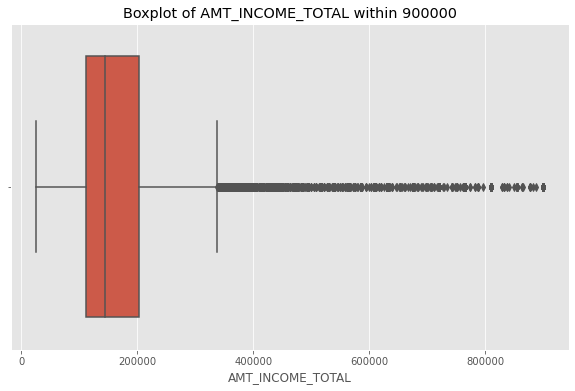

In [48]:
#plot boxplot for below 9lakh cases
plt.figure(figsize=(10,6))
sns.boxplot(x=App_data[App_data['AMT_INCOME_TOTAL']<=900000]['AMT_INCOME_TOTAL'])
plt.title("Boxplot of AMT_INCOME_TOTAL within 900000")
plt.show()

Most values lies between 1lakh and 2.5 lakh.we can find that 99% data lies below 9lakh income and above that all values can be considered as outliers.We are not deleting outliers as they may have important data

In [49]:
# Analysis of AMT_CREDIT 
App_data.AMT_CREDIT.describe()

count    3.075080e+05
mean     5.990268e+05
std      4.024923e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

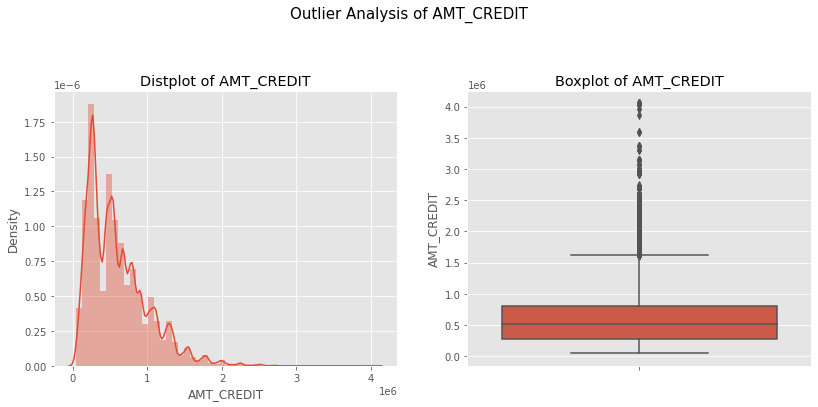

In [32]:
outlier('AMT_CREDIT')

Most of the values is in range of 2 and 8 lakhs. we can see mean and median are not having much difference.Above around 1.6 million many values(outliers) are there.

In [65]:
#Analysis of AMT_ANNUITY
App_data.AMT_ANNUITY.describe()

count    307508.000000
mean      27108.463173
std       14493.526140
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

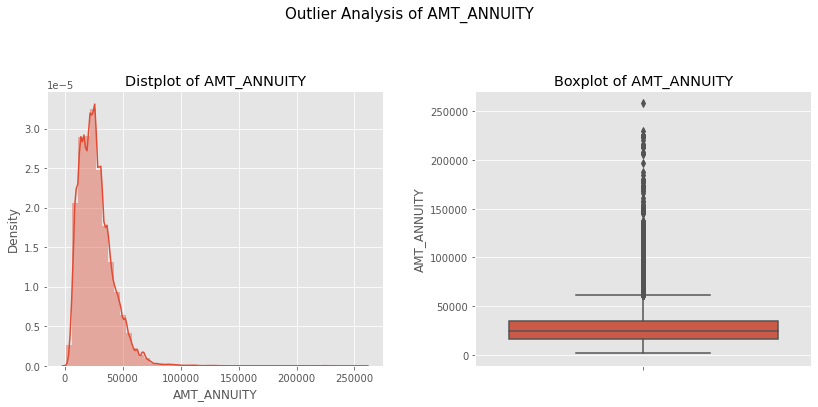

In [50]:
#Eventhough mean and median doesnt have much diffrence but sudden jump from 75 to max gives us an insight of outliers.Check it with boxplot
outlier('AMT_ANNUITY')

In [51]:
# here most of values lies between 0 and 70k.From boxplot we identified there are outliers as outside upper whisker values exist.We can check max_value using formulae (Q3 + 1.5 * IQR)
Q1=App_data.AMT_ANNUITY.quantile(0.25)
Q3=App_data.AMT_ANNUITY.quantile(0.75)
IQR=Q3-Q1
max_value=Q3+1.5*IQR
max_value

61704.0

So we can say that all values above 61704 can be considered as outliers

In [68]:
# Analysis of AMT_GOODS_PRICE
App_data.AMT_GOODS_PRICE.describe()

count    3.075080e+05
mean     5.383178e+05
std      3.692904e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

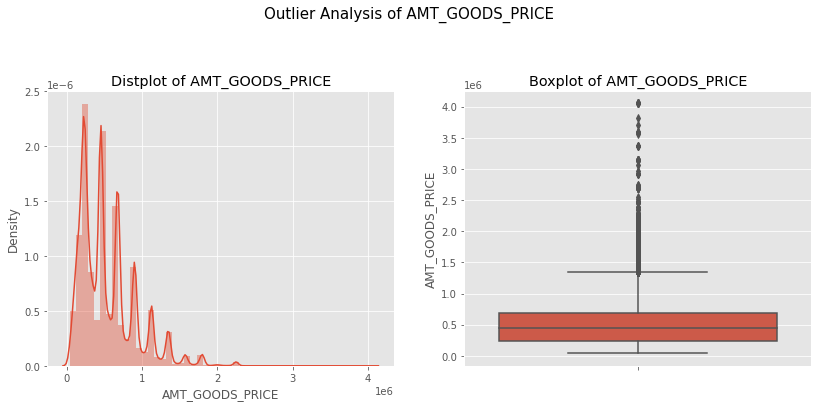

In [69]:
outlier('AMT_GOODS_PRICE')

We can see that most values lies between some 2lakh to 7 lakh and above 1.4 million are outliers and they are continuous


In [70]:
#Analysis of AGE
App_data.AGE.describe()

count    307508.000000
mean         43.938776
std          11.964022
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

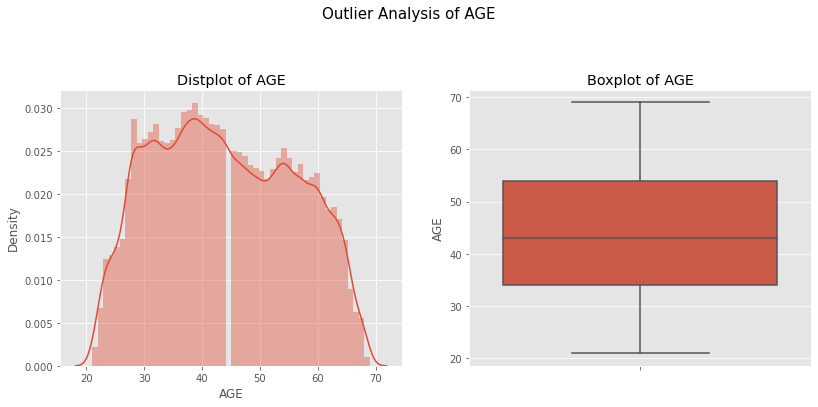

In [71]:
# we couldnt see any jump in data.Lets check with box and distplot
outlier('AGE')

So we can see there is no outliers in AGE column and most values lies between 34 and 54.Also most of the clients age are inclined slightly above median

In [72]:
#Analysis of YEARS_EMPLOYED
App_data.YEARS_EMPLOYED.describe()

count    307508.000000
mean        185.609815
std         382.167320
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: YEARS_EMPLOYED, dtype: float64

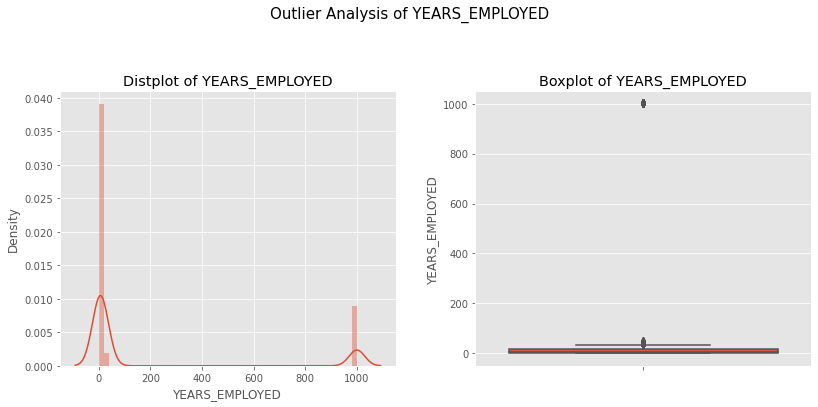

In [52]:
# There is a huge difference between mean and median.This indicates the presence of outliers.Also huge difference can be seen in 75th percentile and max
outlier('YEARS_EMPLOYED')

In [74]:
#Check how many values lies above 600
App_data[App_data.YEARS_EMPLOYED > 600].shape

(55374, 47)

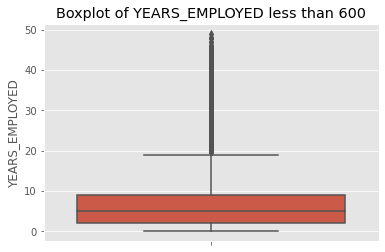

In [53]:
# From above plot we can see value lies at 1000 years of employment and this is not at all possible for humans.So this can be misentry.
#Leave the value of 1000 and check plot
sns.boxplot(y=App_data[App_data['YEARS_EMPLOYED']< 600]['YEARS_EMPLOYED'])
plt.title("Boxplot of YEARS_EMPLOYED less than 600")
plt.show()

So from above plot we majority value lies within 10 years of employement

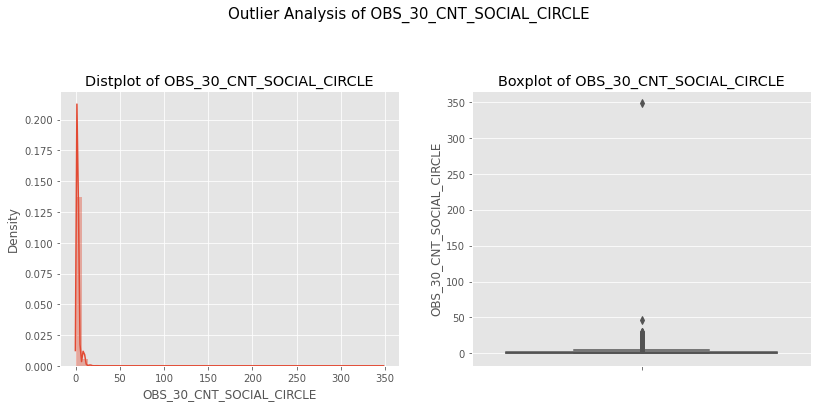

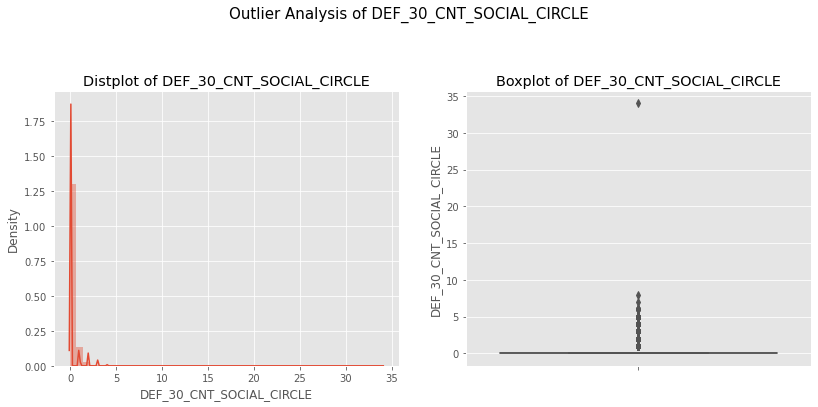

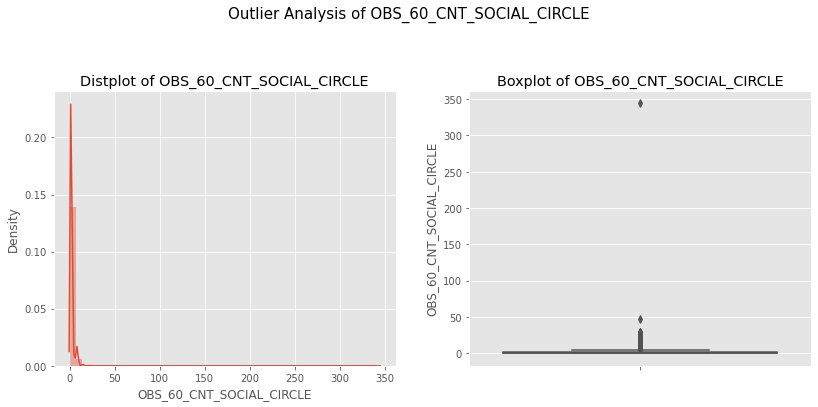

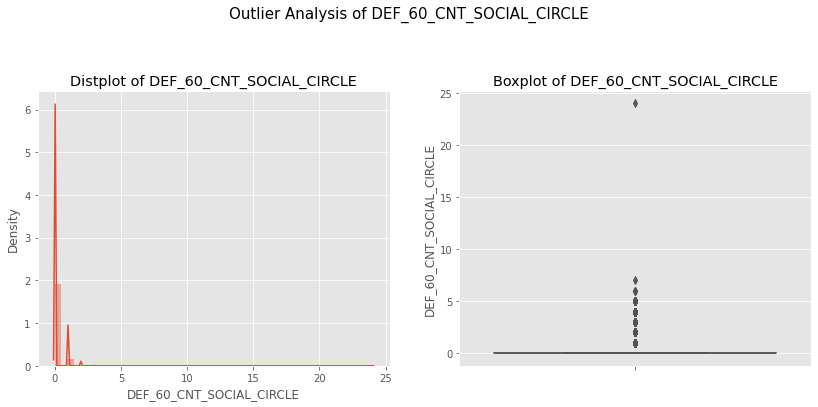

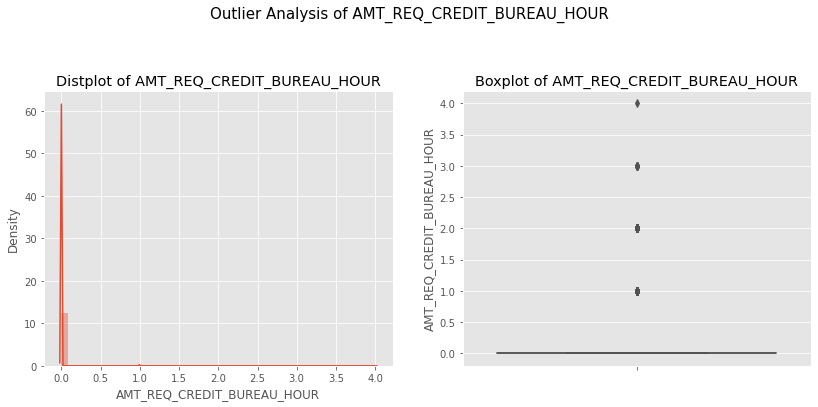

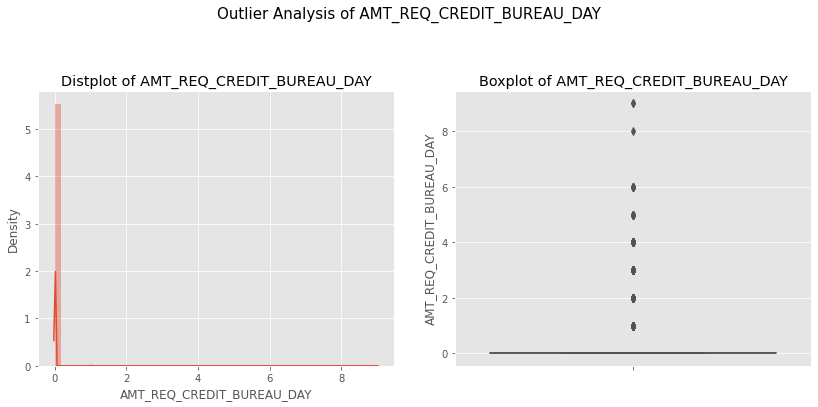

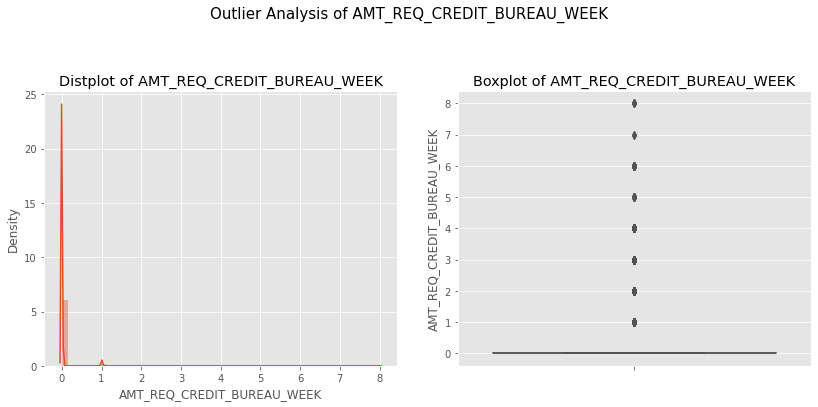

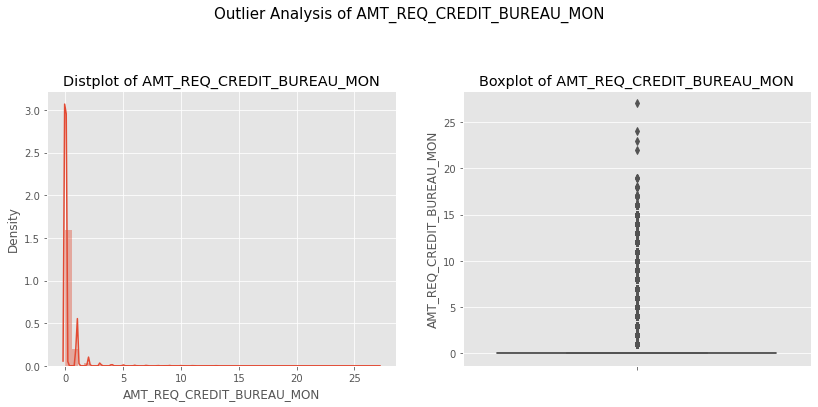

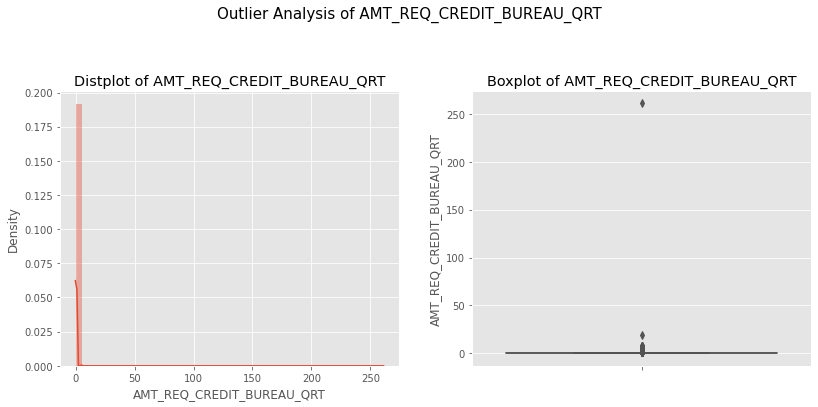

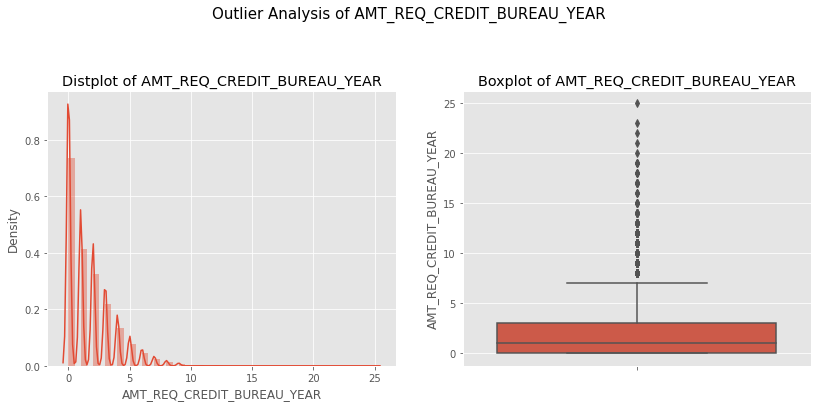

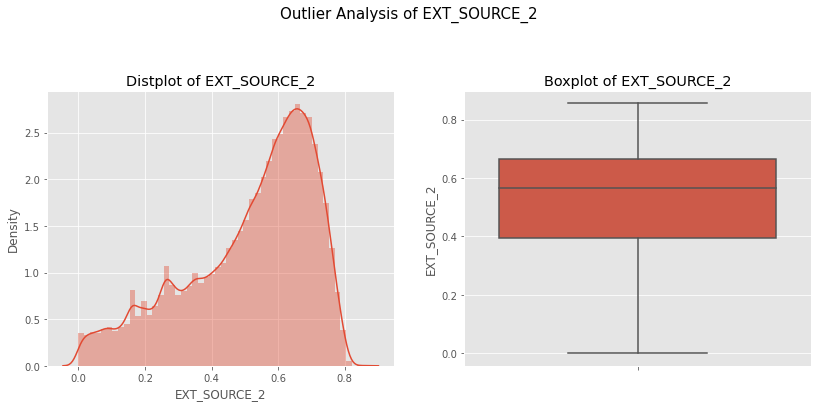

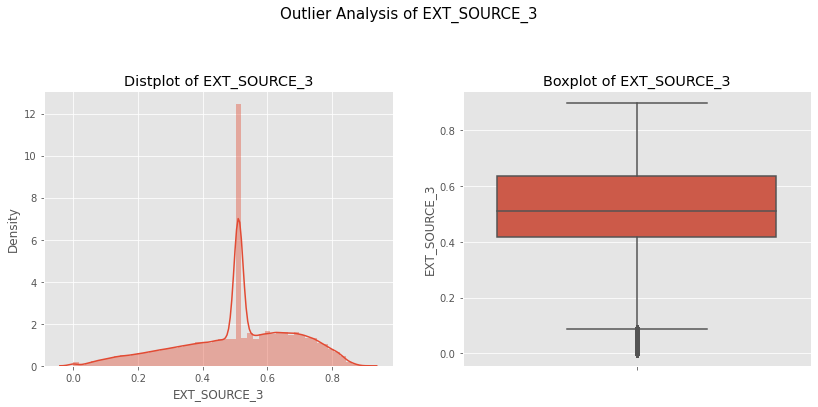

In [54]:
cols=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','EXT_SOURCE_3']
for i in cols:
    outlier(i)

So from above plot we could find that these columns are highly effected by outliers as many values exist outside or above the upper whisker and for EXT_SOURCE_3 it has many values below lower whisker.So except EXT_SOURCE_2 all have outliers

### Bucketing Some Numerical columns as categorical for better Analysis

In [55]:
# Create buckets for AGE variable
App_data['AGE_GROUP']=pd.cut(App_data.AGE,[0,20,30,40,50,60,999],labels=['0-20','20-30','30-40','40-50','50-60','60+'])


In [81]:
App_data.AGE_GROUP.value_counts(normalize=True)*100

30-40    26.915723
40-50    24.555134
50-60    22.098612
20-30    15.891619
60+      10.538913
0-20      0.000000
Name: AGE_GROUP, dtype: float64

In [56]:
#create buckets for YEARS_EMPLOYED
App_data['YEARS_OF_EMPLOYEMENT']=pd.cut(App_data.YEARS_EMPLOYED,bins=[0,5,10,15,20,25,30,35,40,9999],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40 & above'])
App_data.YEARS_OF_EMPLOYEMENT.value_counts(normalize=True)*100

0-5           45.395559
5-10          20.185320
40 & above    18.664947
10-15          8.493532
15-20          3.407824
20-25          1.955628
25-30          1.041121
30-35          0.616612
35-40          0.239458
Name: YEARS_OF_EMPLOYEMENT, dtype: float64

In [57]:
#create bins for AMT_GOODS_PRICE
App_data['AMT_GOODS_PRICE_RANGE']=pd.cut(App_data.AMT_GOODS_PRICE,bins=5,labels=['Very-Low','Low','Medium','High','Very-High'])

In [84]:
App_data.AMT_GOODS_PRICE_RANGE.value_counts(normalize=True)*100

Very-Low     80.403762
Low          18.239200
Medium        1.335900
High          0.015284
Very-High     0.005854
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [58]:
#Create buckets for AMT_INCOME_TOTAL

App_data['AMT_INCOME_RANGE']=pd.qcut(App_data.AMT_INCOME_TOTAL,q=[0,0.2,0.5,.75,.95,1], labels = ['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [86]:
App_data.AMT_INCOME_RANGE.value_counts(normalize=True)*100

LOW          29.296148
MEDIUM       26.734914
VERY_LOW     20.705478
HIGH         18.699676
VERY_HIGH     4.563784
Name: AMT_INCOME_RANGE, dtype: float64

In [59]:
#Binning of AMT_CREDIT
App_data['CREDIT_RANGE']=pd.qcut(App_data.AMT_CREDIT,q=[0,0.2,0.5,.75,.95,1], labels = ['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [88]:
App_data.CREDIT_RANGE.value_counts(normalize=True)*100

LOW          28.917296
MEDIUM       25.294952
VERY_LOW     21.113272
HIGH         20.110696
VERY_HIGH     4.563784
Name: CREDIT_RANGE, dtype: float64

In [89]:
App_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0  ...                        0.0                        0.0   
1  ...                        0.0                        0.0   
2  ...                        0.0                        0.0   
3  ...                        0.0                        0.0   
4  ...                        0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP  YEARS_OF_EMPLOYEMENT  \
0                        1.0     20-30                   0-5   
1                        0.0     40-50                   0-5   
2                        0.0     50-60                   0-5   
3                        0.0     50-60                  5-10   
4                        0.0     50-60                  5-10   

   AMT_GOODS_PRICE_RANGE  AMT_INCOME_RANGE  CREDIT_RANGE  
0               Very-Low            MEDIUM           LOW  
1                    Low              HIGH          HIGH  
2               Very-Low          VERY_LOW      VERY_LOW  
3               Very-Low               LOW           LOW  
4               Very-Low               LOW           LOW  

[5 rows x 52 columns]

### CHECKING DATA IMBALANCE

For checking Data Imbalance we need to analyse the Target Variable which is TARGET


In [60]:
# Analysis of Target Variable
App_data.TARGET.value_counts(normalize=True)*100

0    91.927039
1     8.072961
Name: TARGET, dtype: float64

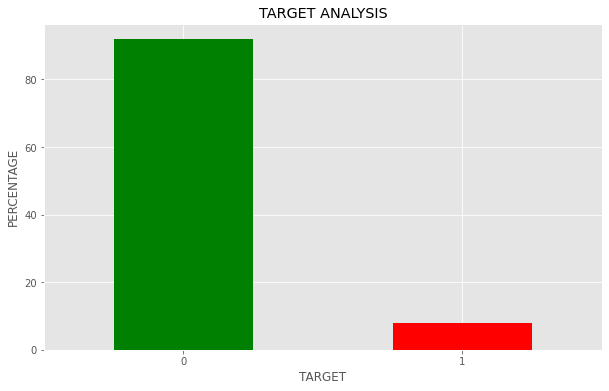

In [61]:
#plot the same with bar plot
plt.figure(figsize=(10,6))
(App_data.TARGET.value_counts(normalize=True)*100).plot.bar(title='TARGET ANALYSIS',color=['Green','Red'])
plt.xlabel('TARGET')
plt.ylabel('PERCENTAGE')
plt.xticks(rotation=0)
plt.show()


so from figure itself we can see that more than 80% customers are non defaulters and below 20% are defaulters.So there is data imbalance


In [62]:
# For finding imbalace ratio split App_data to 2,one with Target=1 and other with Target=0
#Create a new df with Target=1
TARGET_1=App_data[App_data.TARGET==1]

In [63]:
# Create df for Target=0
TARGET_0=App_data[App_data.TARGET==0]

In [64]:
#check IMBALANCE
imbalace_ratio=len(TARGET_0)/len(TARGET_1)
imbalace_ratio

11.387029204431018

<b> so we can say that there is data imbalance for the dataframe and ratio of it is 11.38. </b>

### UNIVARIATE ANALYSIS

### Categorical Variables

In [65]:
# Define function for unsegmented univariate Analysis 
def uni_var(column):
    plt.figure(figsize=(13,6))
    sns.countplot(data=App_data,x=column)
    plt.title("Univariate Analysis of"+ ' '+column)
    plt.xticks(rotation=90)
    

In [66]:
Cat_cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE','CNT_CHILDREN','CNT_FAM_MEMBERS','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE', 'AGE_GROUP',
       'YEARS_OF_EMPLOYEMENT','AMT_INCOME_RANGE']

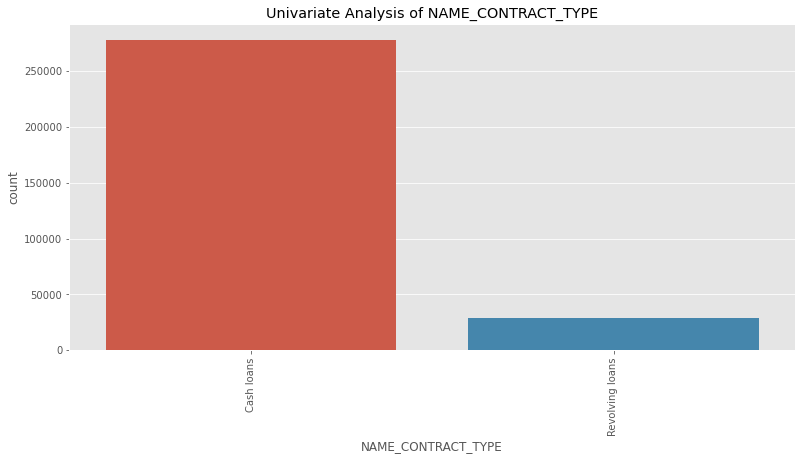

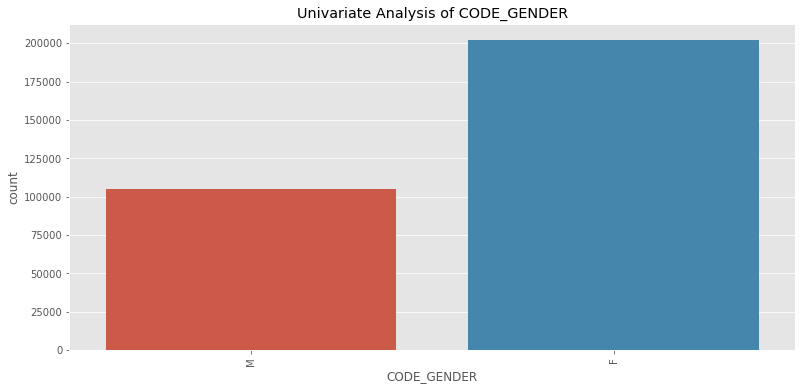

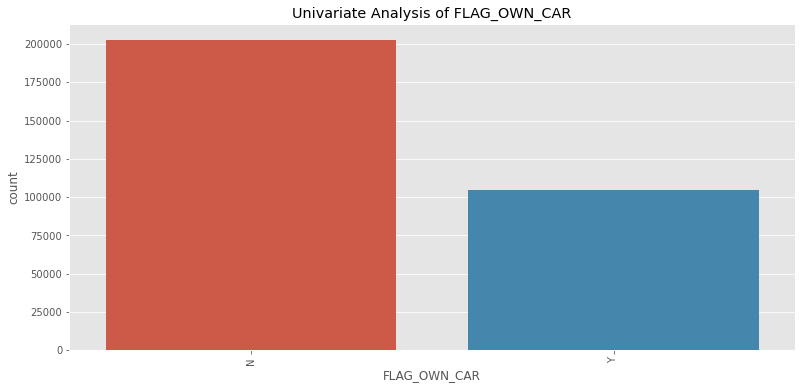

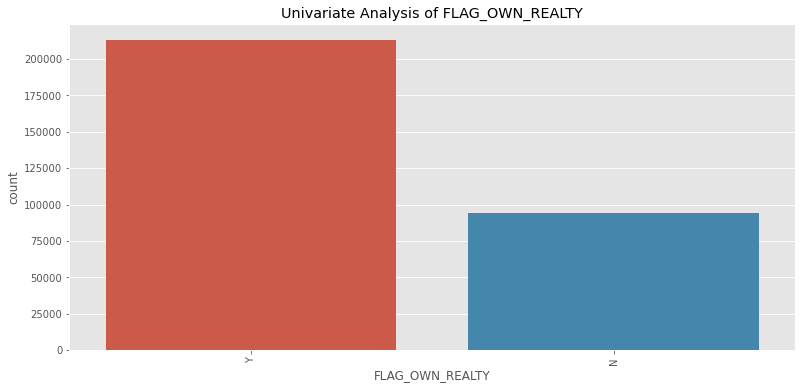

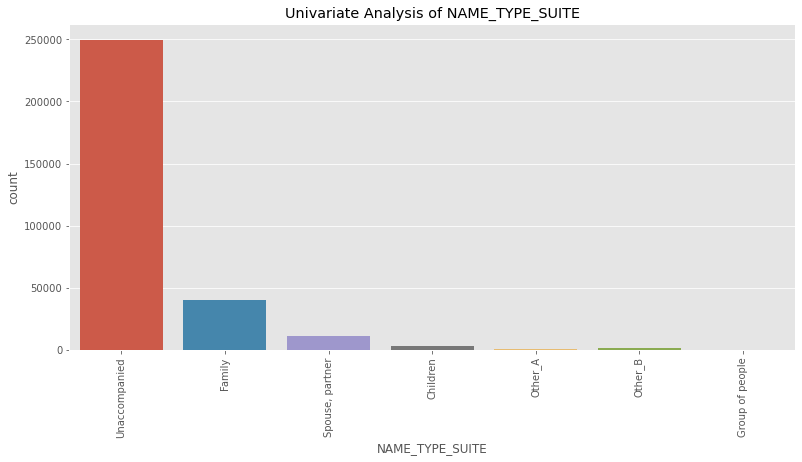

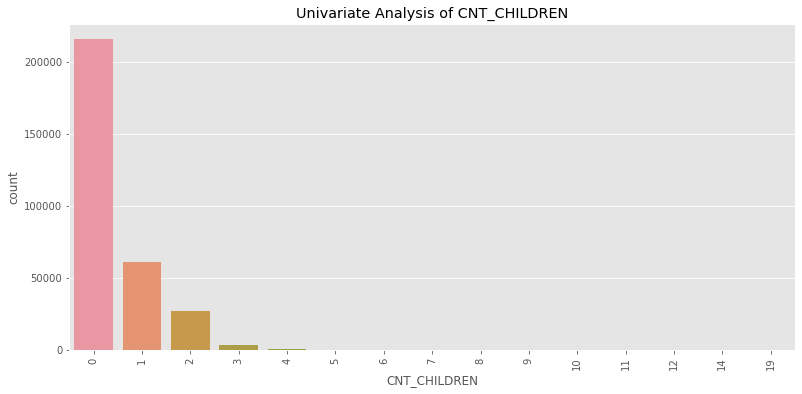

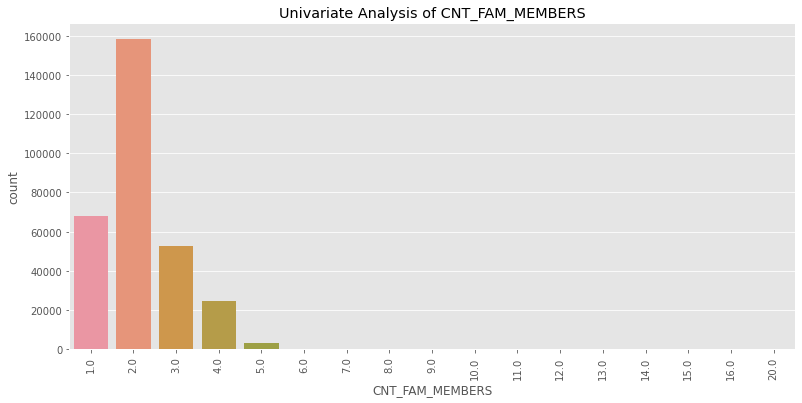

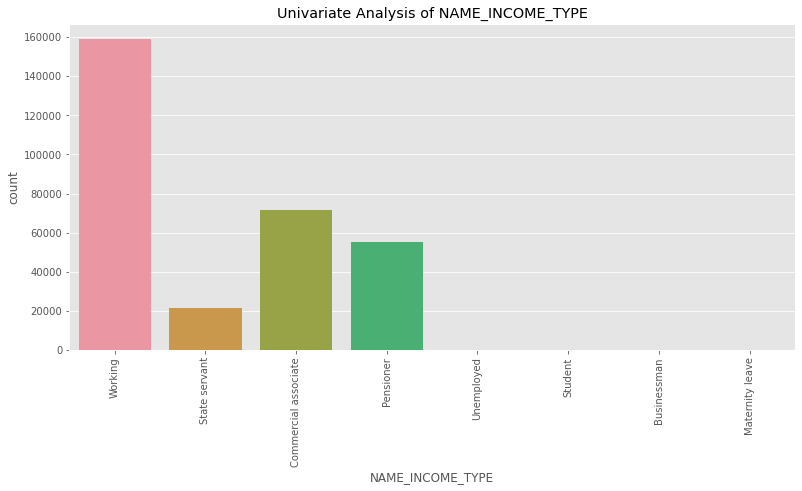

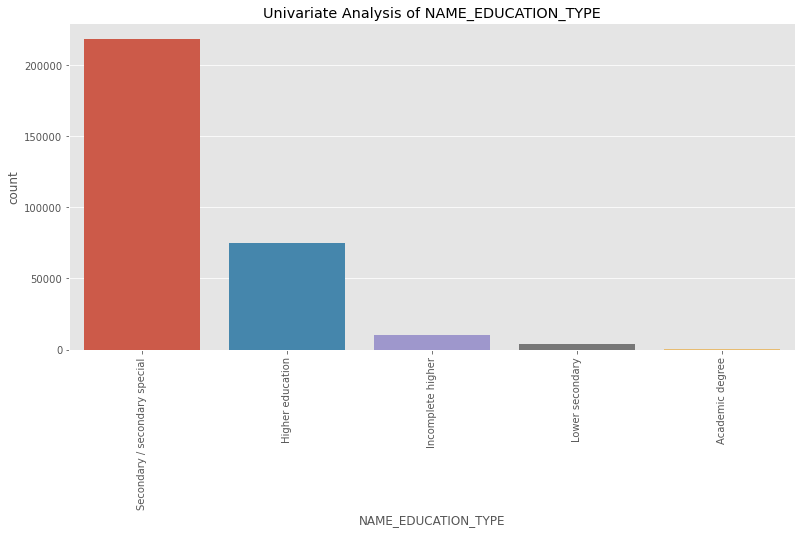

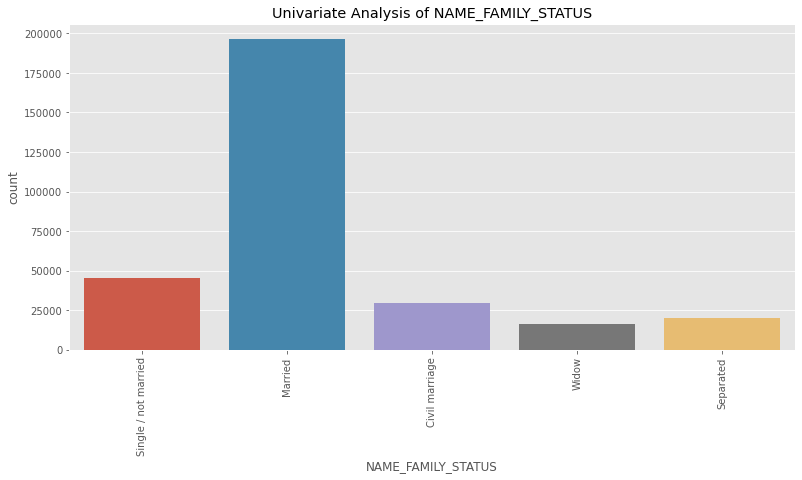

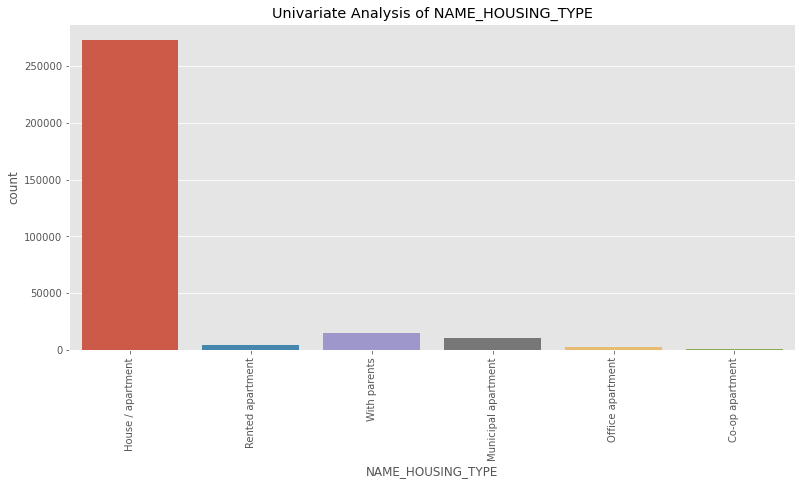

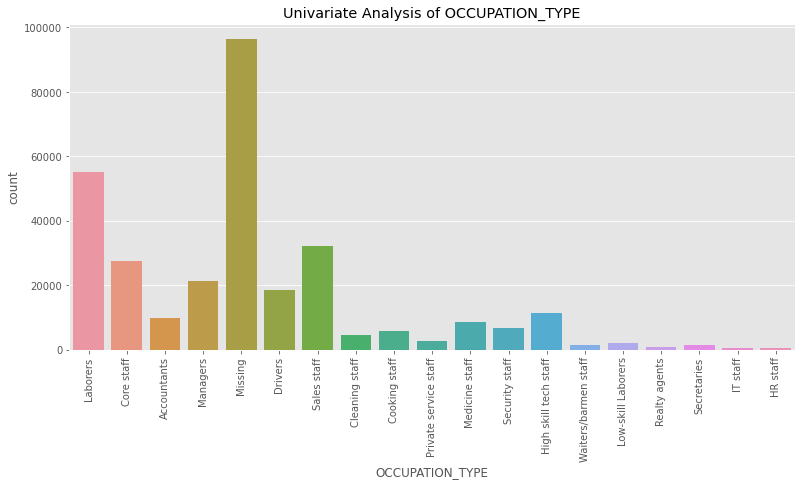

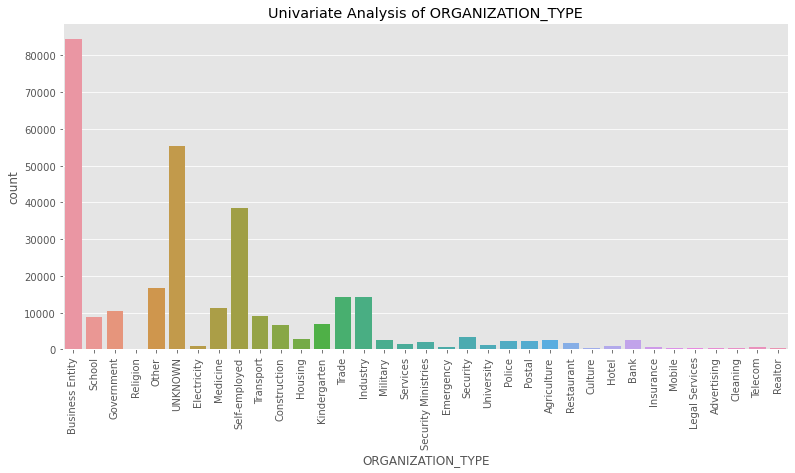

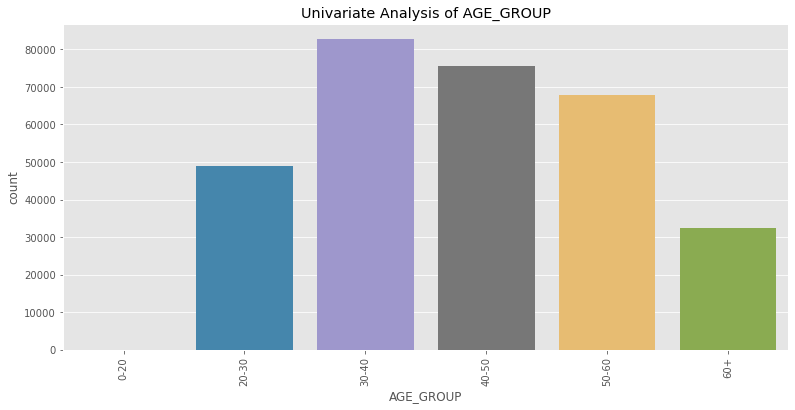

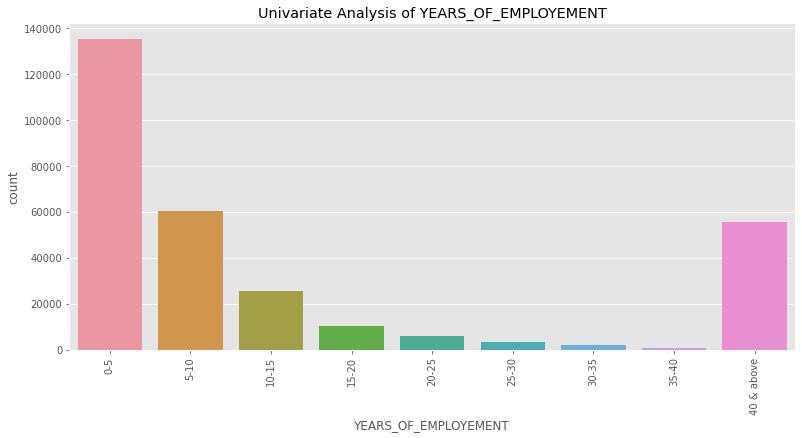

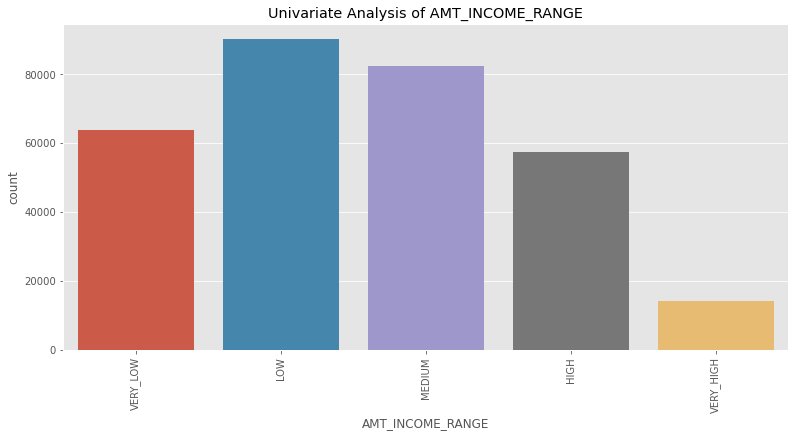

In [67]:
for i in Cat_cols:
    uni_var(i)

##### Observations :- 
   - Female Applied for Loans more than males
   - People rely on cash loans than revolving loans
   - Clients with no car and no house took more loans and this is obvious as they may took loan for car or house
   - Most of clients come alone to take loan
   - Majority of the Applicants have zero or no children
   - Most of the clients have 2 family members.
   - Mostly working class has highest percentage of loans followed by pensioners and commercial associates
   - The clients with secondary education is first and least being applications with academic degree
   - Married ones took loans more as they have more responsibilities than others
   - Business Entity needs more money for business expansions and all and holds first place in terms of organization
   - laborers took more loans and trend decreases on high jobs
   - Mainly middle aged people took more loans due to their liabilities than other age groups
   - Low and Medium Income clients and people with less years experience took more loans than others 


#### SEGMENTED UNIVARIATE ANALYSIS

In [68]:
plt.style.use('default')
%matplotlib inline

In [69]:
# define function for countplot 
def univar_count(column):
    plt.figure(figsize=(13,6))
    plt.rcParams["axes.labelsize"]=12
    plt.subplot(1,2,1)
    sns.countplot(data=TARGET_0,x=column,order=sorted(TARGET_0[column].value_counts().index,reverse=True),palette='flare')
    plt.title("Ontime Paying Clients")
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(data=TARGET_1,x=column,order=sorted(TARGET_1[column].value_counts().index,reverse=True),palette='flare')
    plt.title("Payment difficulty Clients")
    plt.xticks(rotation=90)
    plt.suptitle('ANALYSIS OF'+' '+ column)

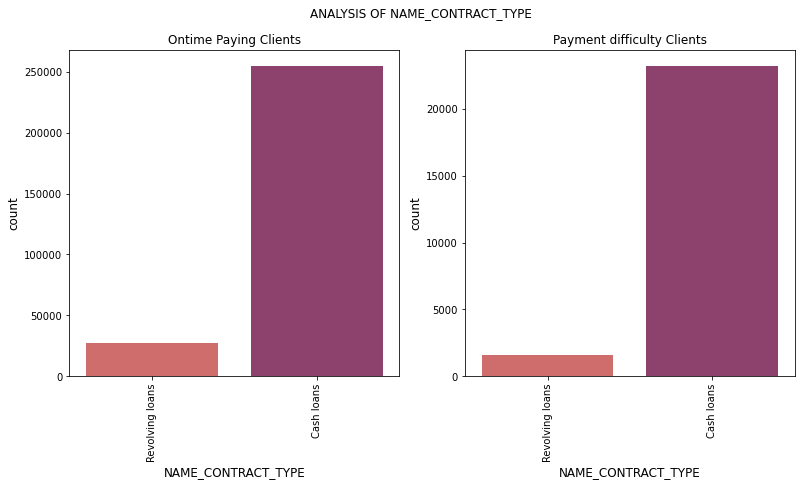

In [70]:
#Analysis of NAME_CONTRACT_TYPE
univar_count('NAME_CONTRACT_TYPE')

- We can see that both OnTime payers and Defaulters took cash loans more than Revolving loans.

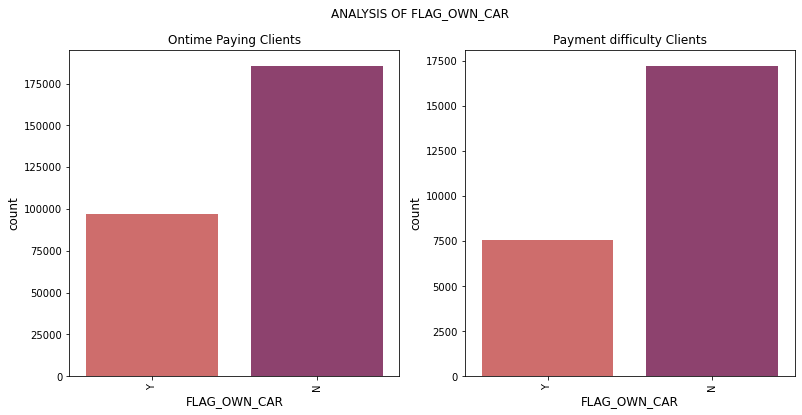

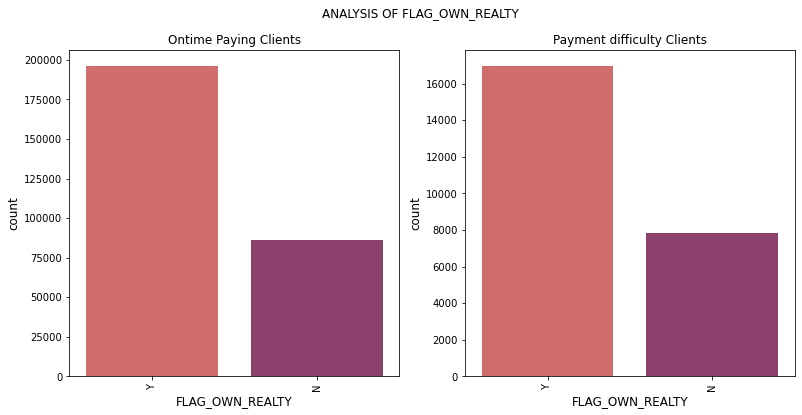

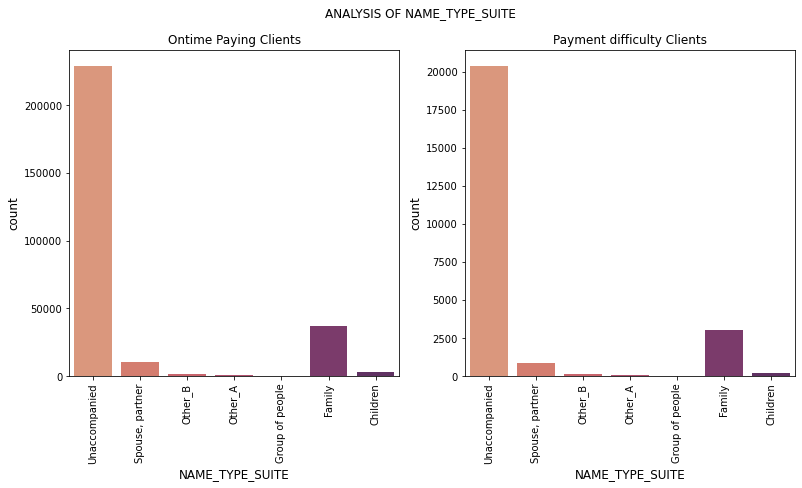

In [71]:
#Analysis of FLAG_OWN_CAR & FLAG_OWN_REALTY
var=['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE']
for i in var:
    univar_count(i)

- So customer owns a car or house and if he is accompanied by someone during application doesnt give much insights or conclusions and this metric may not be considered when targeting a customer

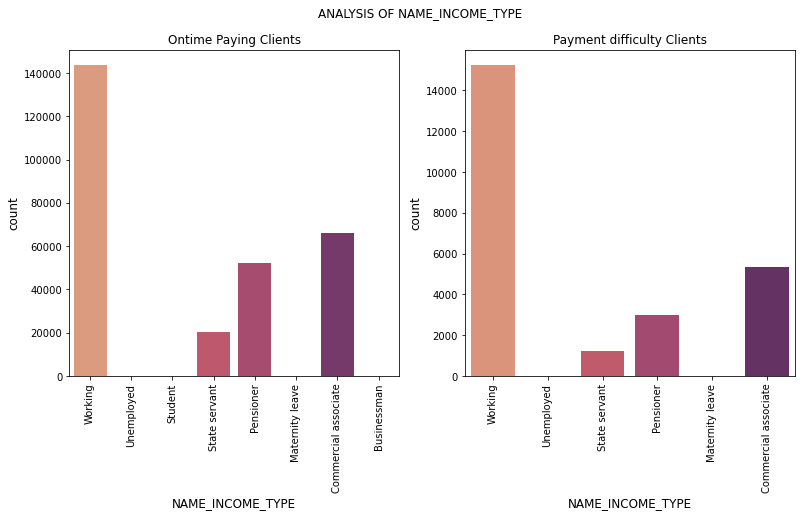

In [72]:
# Analysis of NAME_TYPE_SUITE
univar_count('NAME_INCOME_TYPE')

- Working Class holds high place in both categories
- Pensioners and Commercial associate tend to pay loans on-time
- Students and Businessman also have no payment difficulties so bank can target them in future

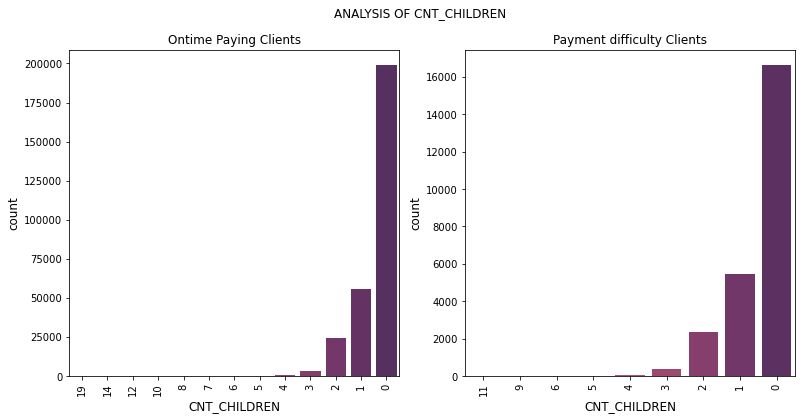

In [73]:
univar_count('CNT_CHILDREN')

- Zero Childern clients have high number in both categories
- As count of children Increases payment difficulty increases

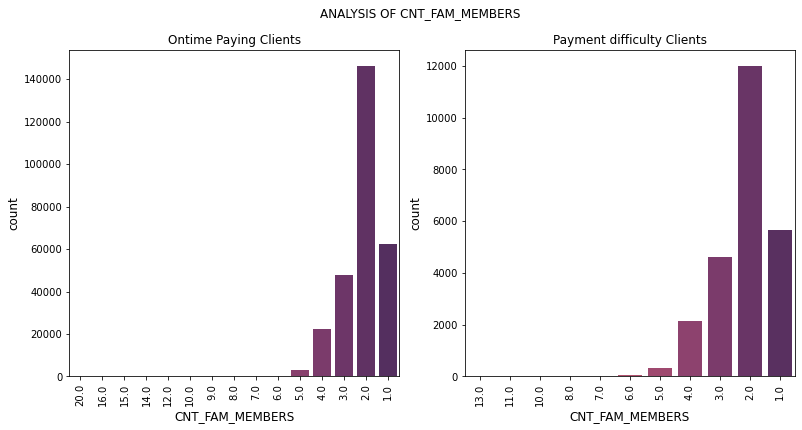

In [74]:
univar_count('CNT_FAM_MEMBERS')

- Most of clients have 2 family members and they are high in both categories
- But an Increase in Count of family members payment difficulty also increases

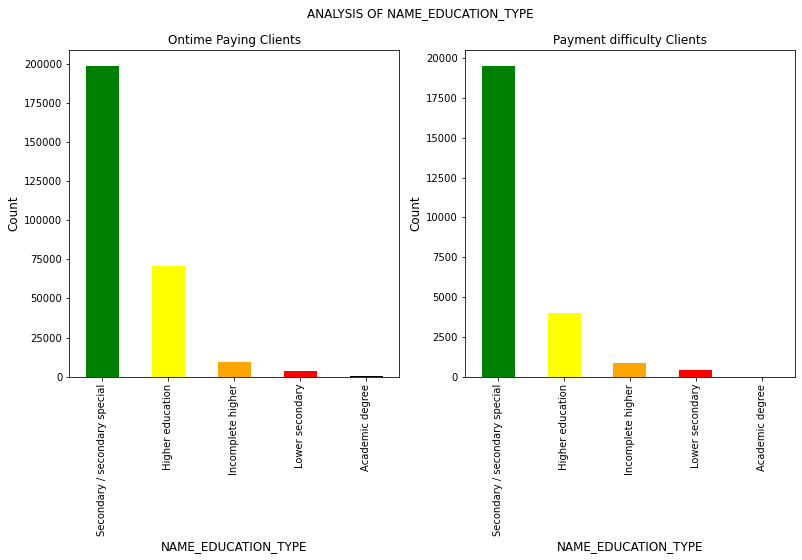

In [75]:
#Analysis of NAME_EDUCATION_TYPE
plt.figure(figsize=(13,6))
plt.rcParams["axes.labelsize"]=12
plt.subplot(1,2,1)
TARGET_0['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color=['Green','Yellow','Orange','Red','Black'])  
plt.title("Ontime Paying Clients")
plt.xticks(rotation=90)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.subplot(1,2,2)
TARGET_1["NAME_EDUCATION_TYPE"].value_counts().plot.bar(color=['Green','Yellow','Orange','Red','Black'])
plt.title("Payment difficulty Clients")
plt.xticks(rotation=90)
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.suptitle('ANALYSIS OF NAME_EDUCATION_TYPE')
plt.show()

- Secondary/secondary special is high in both categories
- Customers with Higher Education and Academic degree have higher ontime payments than defaulters and this can be because they   are settled than others


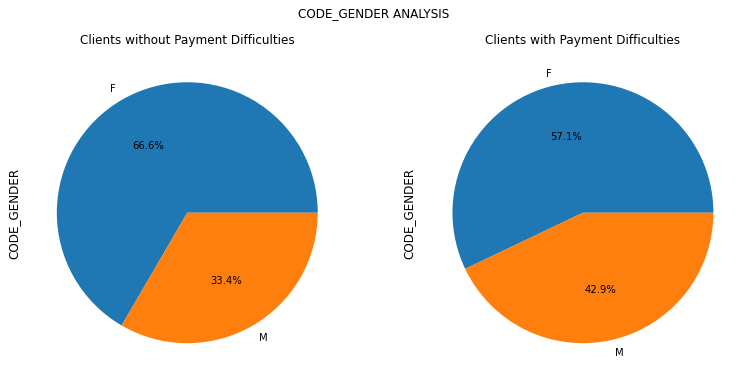

In [76]:
#Analysis of CODE_GENDER
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
TARGET_0['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Clients without Payment Difficulties")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
TARGET_1['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Clients with Payment Difficulties")
plt.xticks(rotation=90)
plt.suptitle('CODE_GENDER ANALYSIS')
plt.show()

- Default percentage is more for Male clients than Female Clients
- Female Ontime Payment percentage is higher than payment difficulty percentage


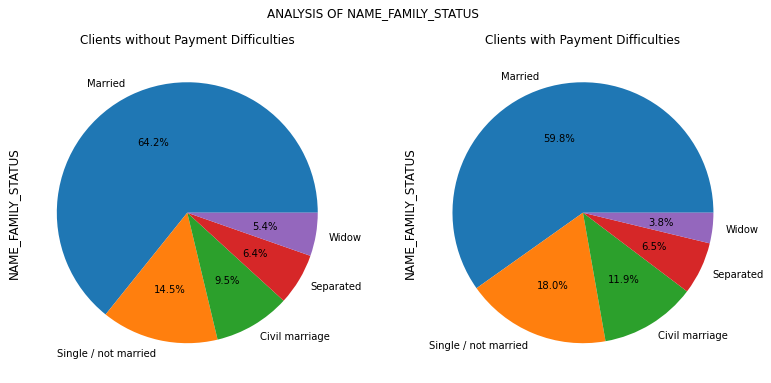

In [77]:
#Analysis of NAME_FAMILY_STATUS
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
TARGET_0['NAME_FAMILY_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Clients without Payment Difficulties")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
TARGET_1['NAME_FAMILY_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Clients with Payment Difficulties")
plt.xticks(rotation=90)
plt.suptitle('ANALYSIS OF NAME_FAMILY_STATUS')
plt.show()

- Married and Widow Ontime payment percentage is higher than Defaluting category
- Single/not married has more difficulty in repayment followed by Civil marriage

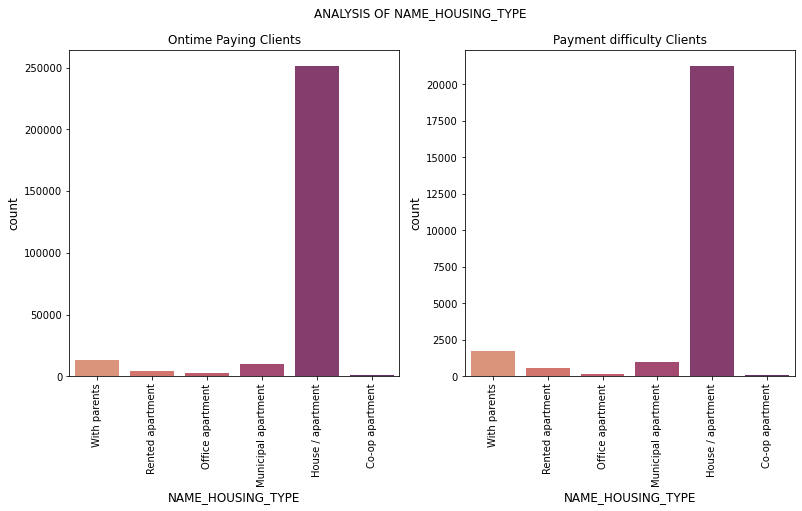

In [78]:
#Analysis of NAME_HOUSING_TYPE
univar_count('NAME_HOUSING_TYPE')

- Clients with house/Apartment is high in both categories.This can be because for without payment difficulties they already have house and liability is less and for defaulters it is be because they may have housing loan also.Also this is contrary to FLAG OWN REALTY analysis 
- When compared both category people with Rented Apartments and with parents have more payment difficulties than other.It may be because they have more liabilites than others

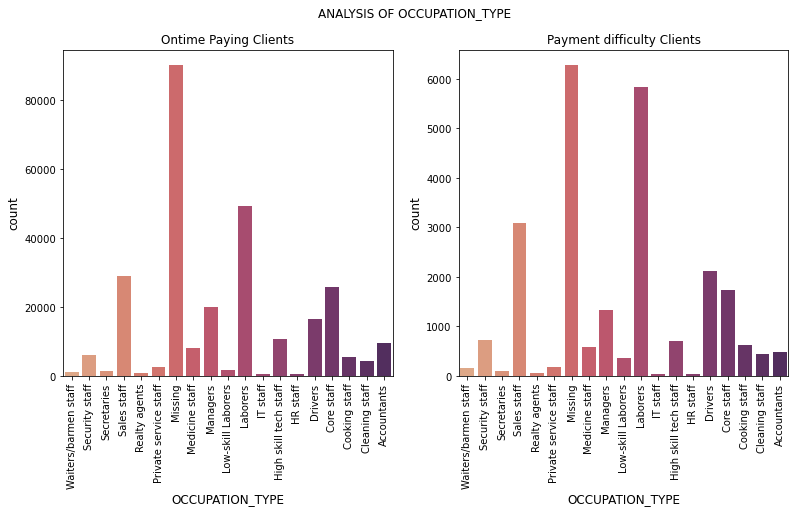

In [79]:
# Analysis of OCCUPATION_TYPE
univar_count('OCCUPATION_TYPE')

- We found that Laborers are highest defaulters.People with higher jobs tend to pay loan ontime

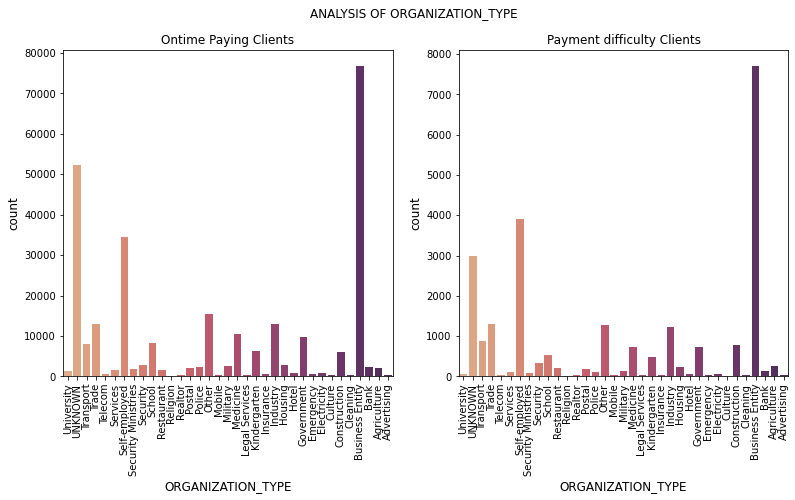

In [80]:
#Analysis of ORGANIZATION_TYPE
univar_count('ORGANIZATION_TYPE')

- Bussiness Entity holds first place in both categories.This may be because some make good profit and some make loss

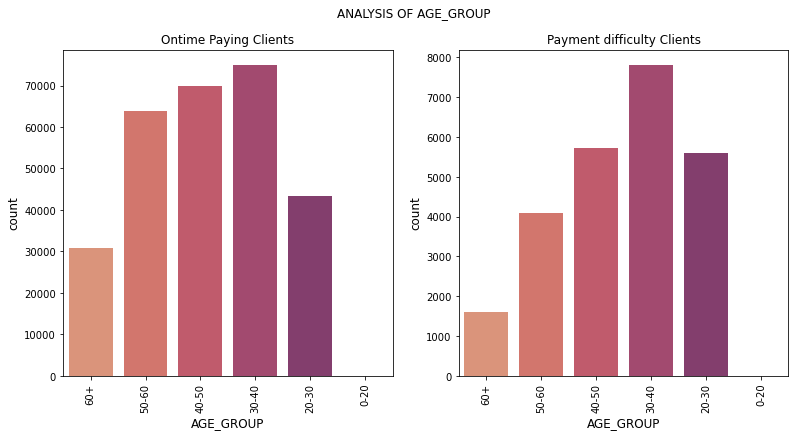

In [81]:
# Analysis of AGE_GROUP
univar_count('AGE_GROUP')

- 20-30 category has more number defaulters when both segments are evaluated
- 30-40 age group has most ontime payers and defaulters.This may be because this age is when people become settled and also this is time when people got more responsibilities


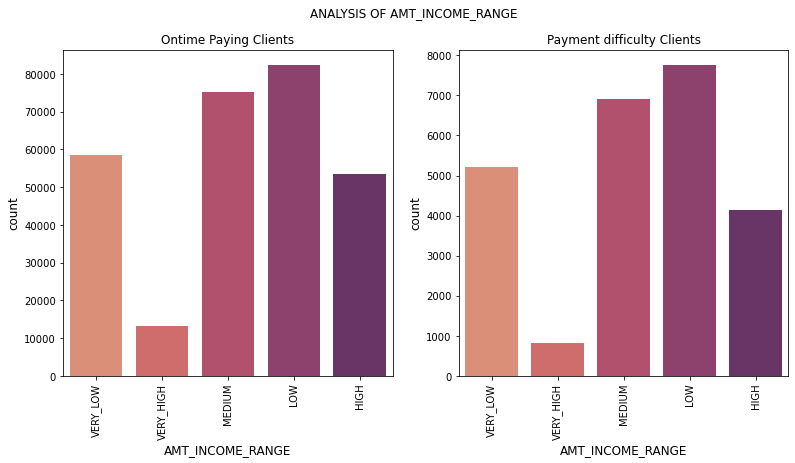

In [82]:
#Analysis of ANNUAL_INCOME
univar_count('AMT_INCOME_RANGE')

- Customers with HIGH and VERY_HIGH income tends to default less compared to others and with low income are main defaulters

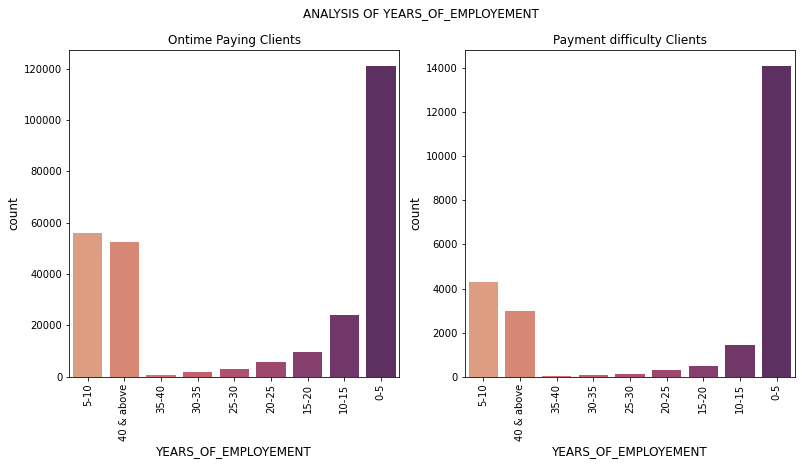

In [83]:
univar_count('YEARS_OF_EMPLOYEMENT')

- Employed for 0-5 years holds first place in both segments.This can be because of the salary they obtained.
- Overall when people become experienced payment difficulty decreases

 ### Numerical Variables

Univariate unsegmented Analysis done in outlier Analysis
#### SEGMENTED UNIVARIATE ANALYSIS

In [84]:
#Define function for easy analysis
def uni_num(column):
    plt.style.use('ggplot')
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(TARGET_0[column],color="green")
    plt.title('Ontime-Payers')
    plt.subplot(1,2,2)
    sns.distplot(TARGET_1[column],color="red")
    plt.title('Defaulters')
    plt.suptitle('ANALYSIS OF'+' '+ column,size=15)
    plt.show()

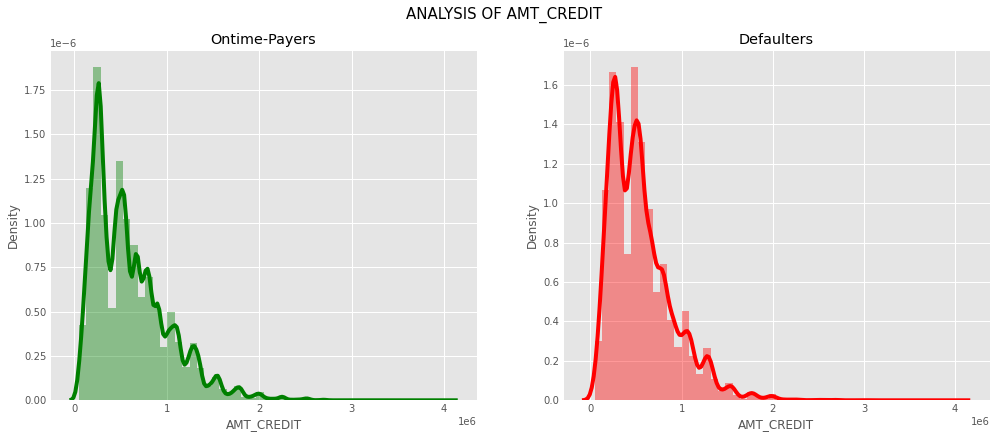

In [110]:
#Analysis of AMT_CREDIT
uni_num('AMT_CREDIT')

- The graph shows the presence of outliers in both 
- Approximately from 3 to 6 lakh there are more clients with difficulty in payments

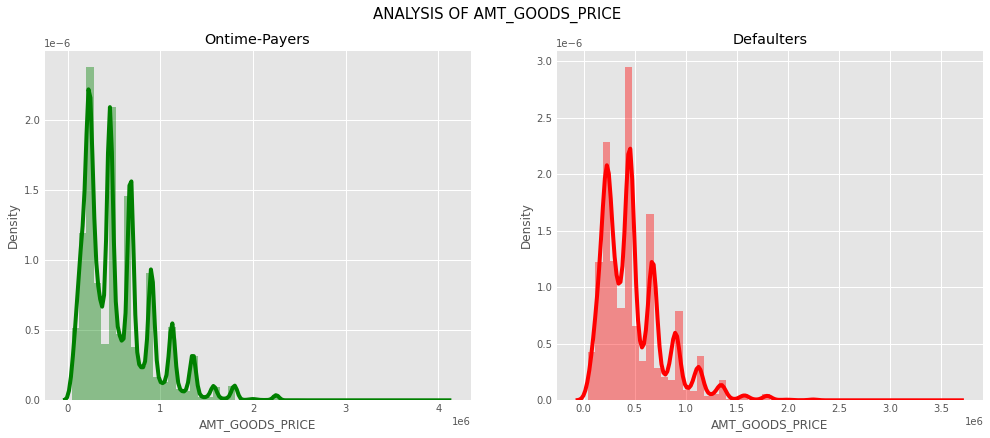

In [111]:
uni_num('AMT_GOODS_PRICE')

- For Goods price from 2.5 to 5 lakh we can see Defaulters are high.


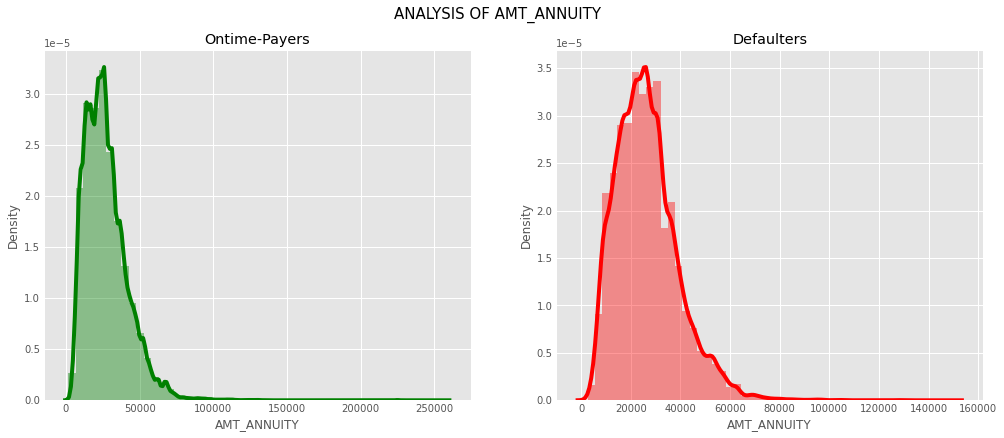

In [112]:
uni_num('AMT_ANNUITY')

For both Target_0 and Target_1 we have outliers and both have similar distribution

### BIVARIATE ANALYSIS & MULTIVARIATE ANALYSIS

 ### Continuous-Continuous Analysis

In [85]:
# Define function for easy access for Analysis
plt.style.use('default')
%matplotlib inline
def scatter_plot(column1,column2):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.scatterplot(data=TARGET_0,x=column1,y=column2)
    plt.title('Ontime-Payers')
    plt.subplot(1,2,2)
    sns.scatterplot(data=TARGET_1,x=column1,y=column2)
    plt.title('Defaulters')
    plt.suptitle('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.show()

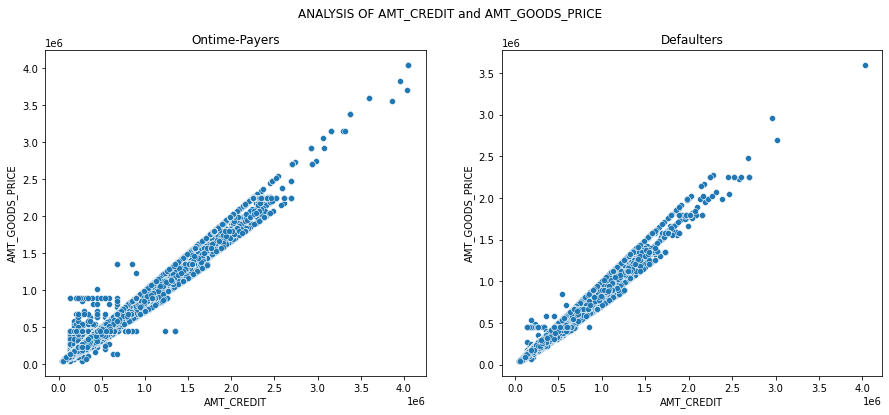

In [86]:
#Analysis of AMOUNT_CREDIT,AMOUNT_GOODS_PRICE
scatter_plot('AMT_CREDIT','AMT_GOODS_PRICE')

- There is a strong positive linear relationship between GOODS_PRICE and CREDIT.As price of the goods for which the loan is given increases credit amount of loan also increases

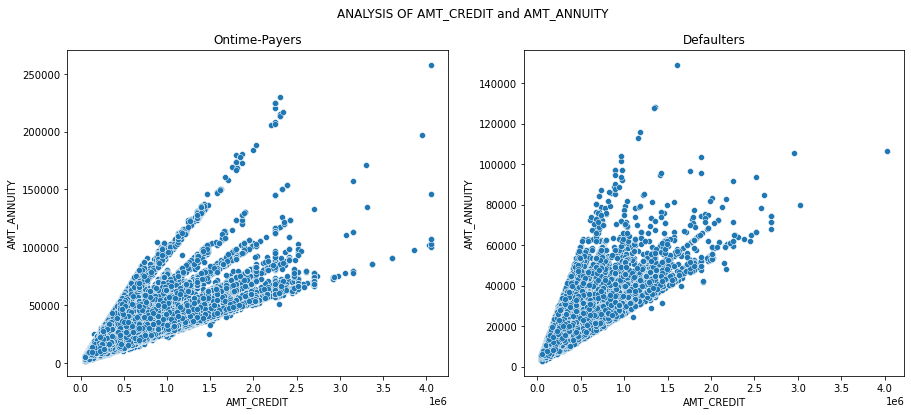

In [116]:
#Analysis of AMT_CREDIT and AMT_ANNUITY
scatter_plot('AMT_CREDIT','AMT_ANNUITY')

In [117]:
# Checking by removing outliers in AMT_ANNUITY as it has more outliers than AMT_CREDIT
#define function for finding max value for outlier calculation
def outliers(column):
    Q1_T0=TARGET_0[column].quantile(0.25)
    Q3_T0=TARGET_0[column].quantile(0.75)
    Q1_T1=TARGET_1[column].quantile(0.25)
    Q3_T1=TARGET_1[column].quantile(0.75)
    IQR_T0=Q3_T0-Q1_T0
    MAX_T0=Q3_T0+1.5*IQR_T0
    IQR_T1=Q3_T1-Q1_T1
    MAX_T1=Q3_T1+1.5*IQR_T1
    print('MAX_T0(ontime) is:',MAX_T0)
    print('MAX_T1(default) is:',MAX_T1)

In [118]:
# outlier calculation for AMT_ANNUITY
outliers('AMT_ANNUITY')

MAX_T0(ontime) is: 62187.75
MAX_T1(default) is: 56398.5


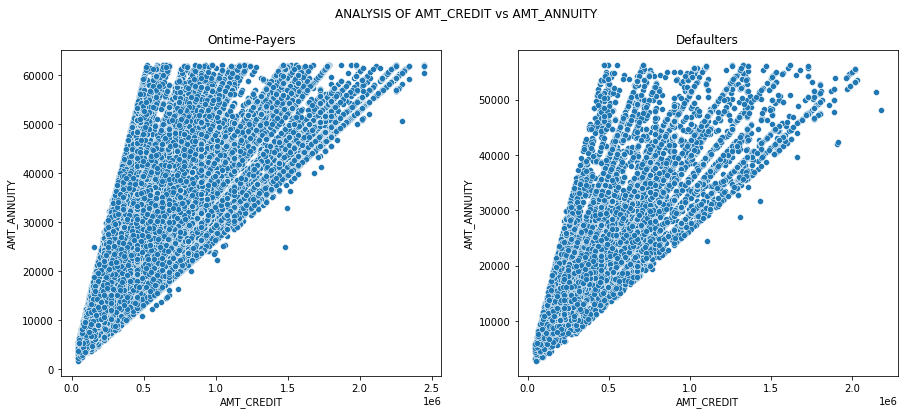

In [119]:
#plot without outliers
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data=TARGET_0,x='AMT_CREDIT',y=TARGET_0[TARGET_0.AMT_ANNUITY<62187.75].AMT_ANNUITY)
plt.title('Ontime-Payers')
plt.subplot(1,2,2)
sns.scatterplot(data=TARGET_1,x='AMT_CREDIT',y=TARGET_1[TARGET_1.AMT_ANNUITY<56408.625].AMT_ANNUITY)
plt.title('Defaulters')
plt.suptitle('ANALYSIS OF AMT_CREDIT vs AMT_ANNUITY')
plt.show()


- So we can see a positive relation between credit amount of loan and loan Annuity.But Outliers are there

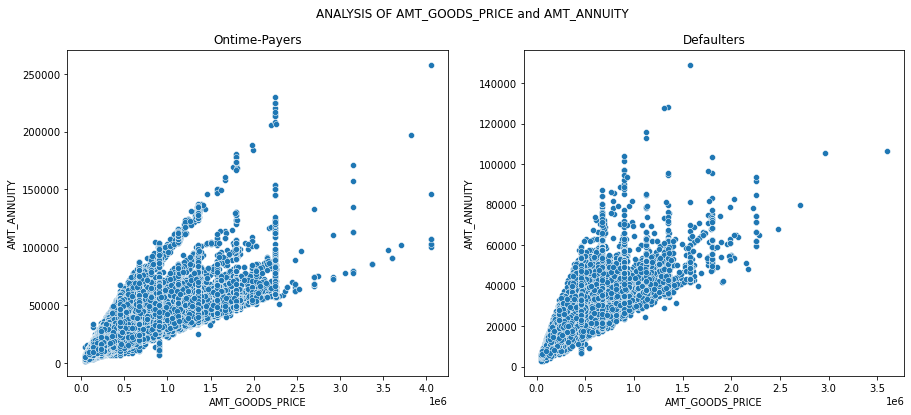

In [125]:
# Analysis of AMT_ANNUITY and AMT_GOODS_PRICE
scatter_plot('AMT_GOODS_PRICE','AMT_ANNUITY')

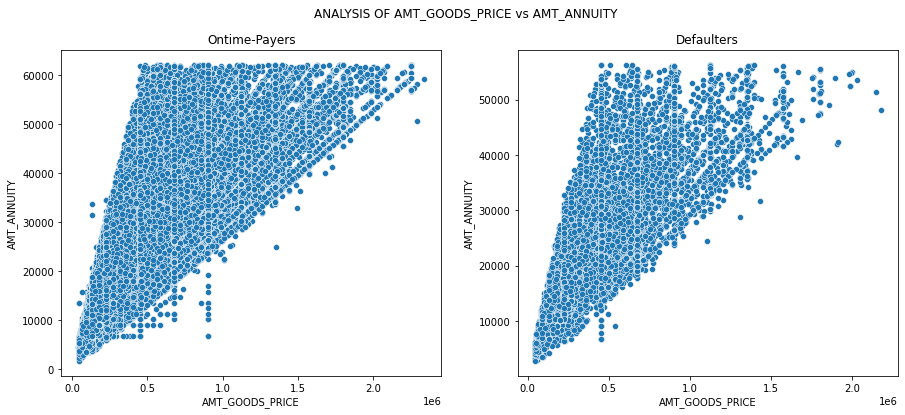

In [120]:
#plot without outliers
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data=TARGET_0,x='AMT_GOODS_PRICE',y=TARGET_0[TARGET_0.AMT_ANNUITY<62187.75].AMT_ANNUITY)
plt.title('Ontime-Payers')
plt.subplot(1,2,2)
sns.scatterplot(data=TARGET_1,x='AMT_GOODS_PRICE',y=TARGET_1[TARGET_1.AMT_ANNUITY<56408.625].AMT_ANNUITY)
plt.title('Defaulters')
plt.suptitle('ANALYSIS OF AMT_GOODS_PRICE vs AMT_ANNUITY')
plt.show()

- There is a positive linear realtionship between AMT_GOODS_PRICE and AMT_ANNUITY
- As price of the goods for which the loan is given increases,then Loan Annuity also increases

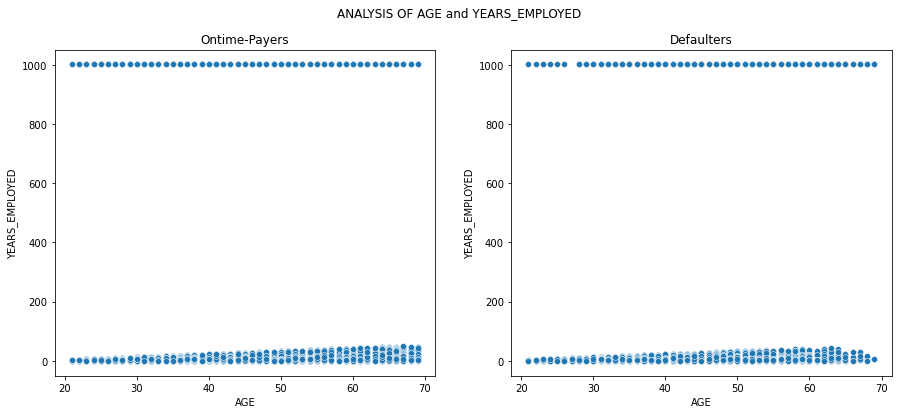

In [121]:
# Analysis of AGE and YEARS_EMPLOYED
scatter_plot('AGE','YEARS_EMPLOYED')

In [128]:
# YEARS_EMPLOYED has lot of outliers at 1000.so exclude that and plot
outliers('YEARS_EMPLOYED')

MAX_T0(ontime) is: 38.0
MAX_T1(default) is: 19.5


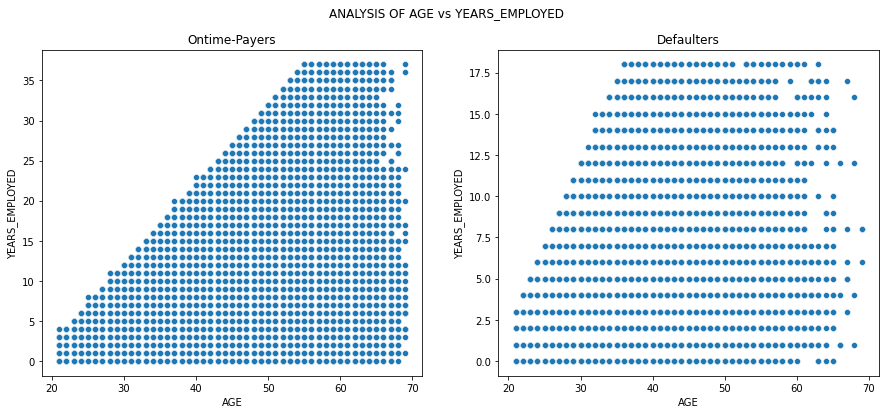

In [122]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data=TARGET_0,x='AGE',y=TARGET_0[TARGET_0.YEARS_EMPLOYED < 38.0].YEARS_EMPLOYED)
plt.title('Ontime-Payers')
plt.subplot(1,2,2)
sns.scatterplot(data=TARGET_1,x='AGE',y=TARGET_1[TARGET_1.YEARS_EMPLOYED < 19.].YEARS_EMPLOYED)
plt.title('Defaulters')
plt.suptitle('ANALYSIS OF AGE vs YEARS_EMPLOYED')
plt.show()

- At start Age and work Experience shows a positive realtion,but its not strong.And we can see also people at all ages with zero experience 

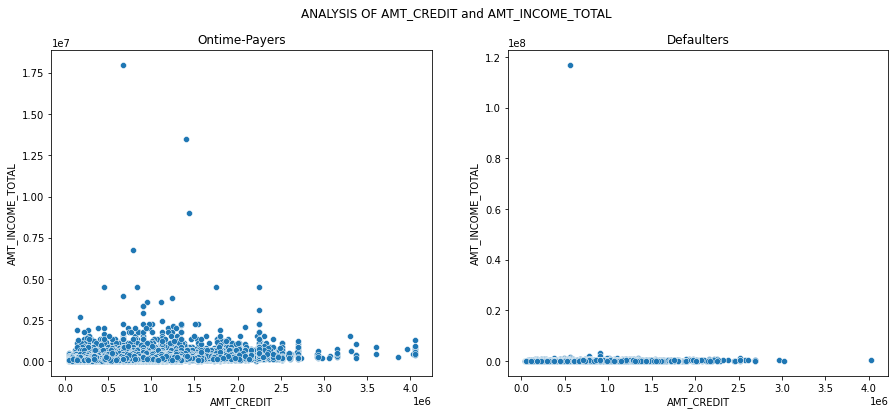

In [130]:
# Anaiysis of AMT_CREDIT & AMT_INCOME_TOTAL
scatter_plot('AMT_CREDIT','AMT_INCOME_TOTAL')

In [131]:
# As AMOUNT_INCOME_TOTAL has more outliers.calculate max value 
outliers('AMT_INCOME_TOTAL')

MAX_T0(ontime) is: 337500.0
MAX_T1(default) is: 337500.0


In [132]:
outliers('AMT_CREDIT')

MAX_T0(ontime) is: 1620000.0
MAX_T1(default) is: 1406688.75


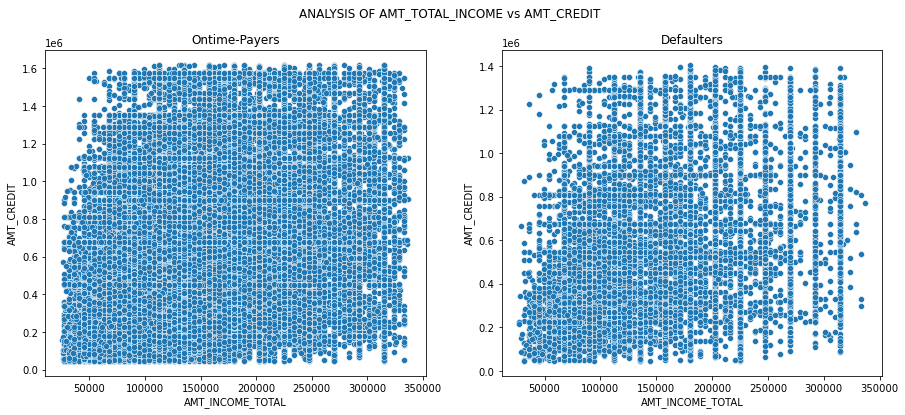

In [123]:
# Plot AMT_CREDIT,AMT_INCOME_TOTAL
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data=TARGET_0,x=TARGET_0[TARGET_0.AMT_INCOME_TOTAL < 337500].AMT_INCOME_TOTAL,y=TARGET_0[TARGET_0.AMT_CREDIT < 1620000].AMT_CREDIT)
plt.title('Ontime-Payers')
plt.subplot(1,2,2)
sns.scatterplot(data=TARGET_1,x=TARGET_1[TARGET_1.AMT_INCOME_TOTAL < 337500].AMT_INCOME_TOTAL,y=TARGET_1[TARGET_1.AMT_CREDIT < 1406688].AMT_CREDIT)
plt.title('Defaulters')
plt.suptitle('ANALYSIS OF AMT_TOTAL_INCOME vs AMT_CREDIT')
plt.show()

- For Ontime payers its densely packed in all regions,but for Defaulters its densely packed in lower income-lower credit regions.
So most of the defaulters are low income clients and bank should taken this to consideration

<function matplotlib.pyplot.show(close=None, block=None)>

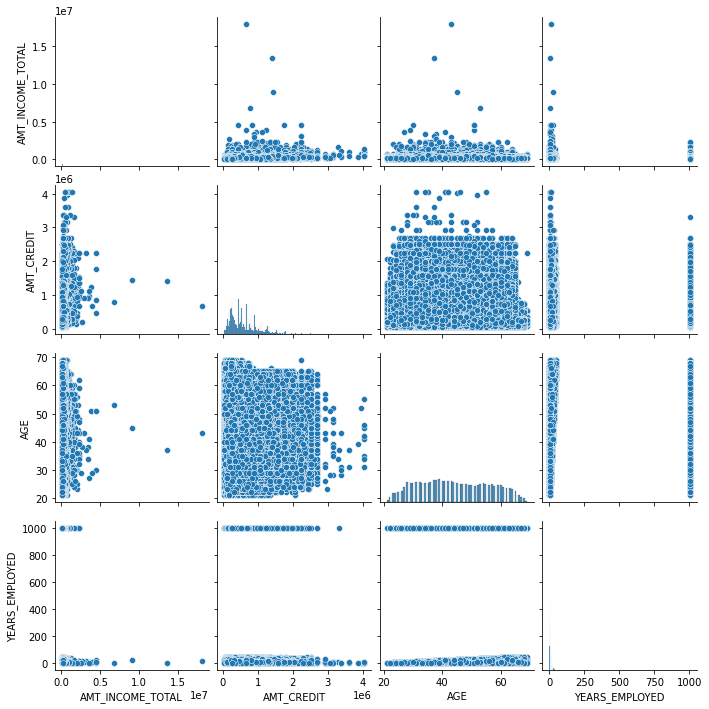

In [124]:
# Multivariate Analysis
# Analysing AMT_INCOME_TOTAL,AMT_CREDIT,AGE,YEARS_EMPLOYED for TARGET_0
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.pairplot(TARGET_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AGE','YEARS_EMPLOYED']])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

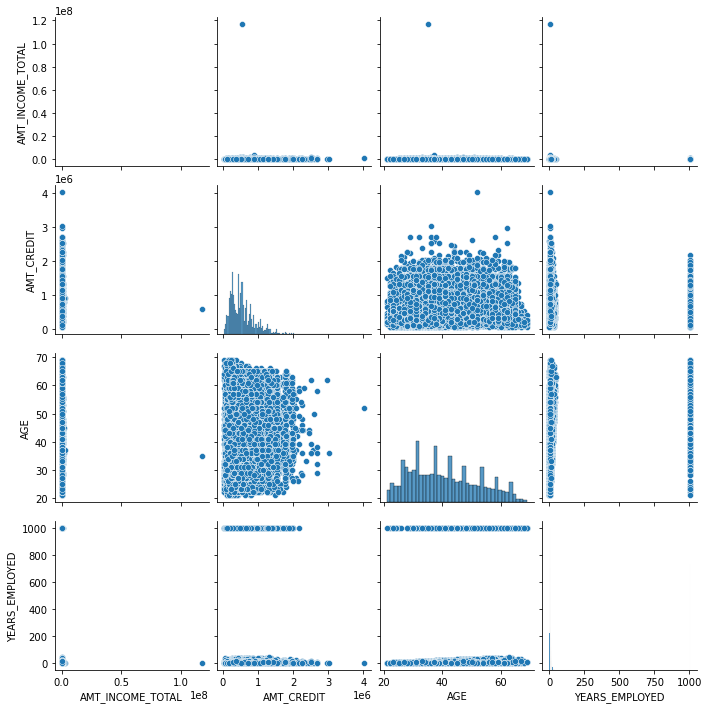

In [125]:
# Analysing AMT_INCOME_TOTAL,AMT_CREDIT,AGE,YEARS_EMPLOYED for TARGET_1
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.pairplot(TARGET_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AGE','YEARS_EMPLOYED']])
plt.show

- Both TARGET_0 and TARGET_1 has similar distribution for most of the cases
- Low Income ones are applied for Loan most as they are not well settled

### Numerical-Categorical Analysis

In [87]:
#Bivariate Analysis
# Using function for easy acess of variables
def numcat_bivar(column1,column2):
    plt.figure(figsize=(21,6))
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.rcParams['axes.labelsize']=15
    plt.rcParams
    plt.subplot(1,2,1)
    sns.boxplot(data=TARGET_0,x=column1,y=column2,order=sorted(TARGET_0[column1].value_counts().index,reverse=True))
    plt.title('Ontime-Payers',size=15)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=TARGET_1,x=column1,y=column2,order=sorted(TARGET_1[column1].value_counts().index,reverse=True))
    plt.title('Defaulters',size=15)
    plt.xticks(rotation=90)
    plt.show()

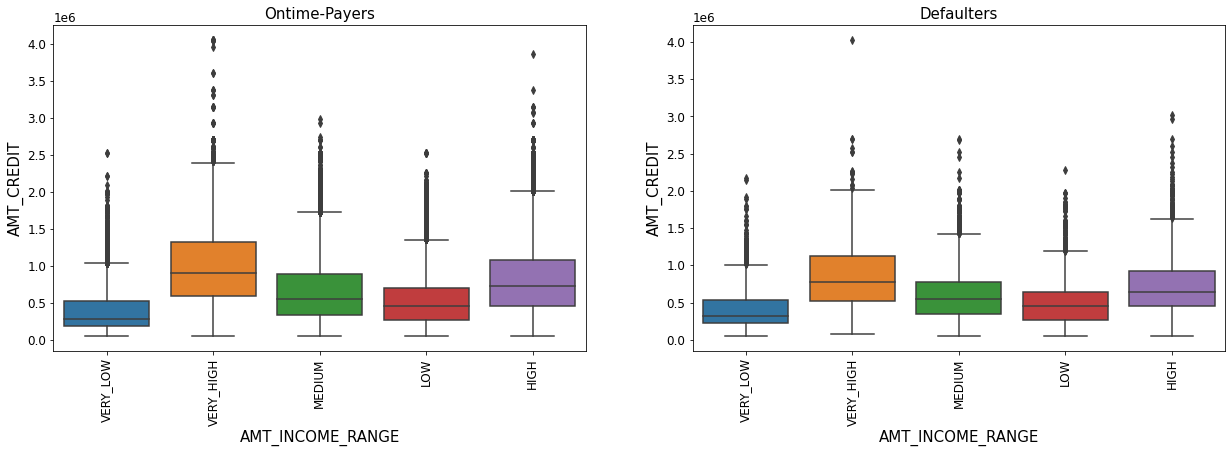

In [88]:
# Analysis of NAME_EDUCATION_TYPE,AMT_CREDIT
numcat_bivar('AMT_INCOME_RANGE','AMT_CREDIT')

- High and Very_High got more credit amount than lower income categories and their presence is high in Ontime payers category

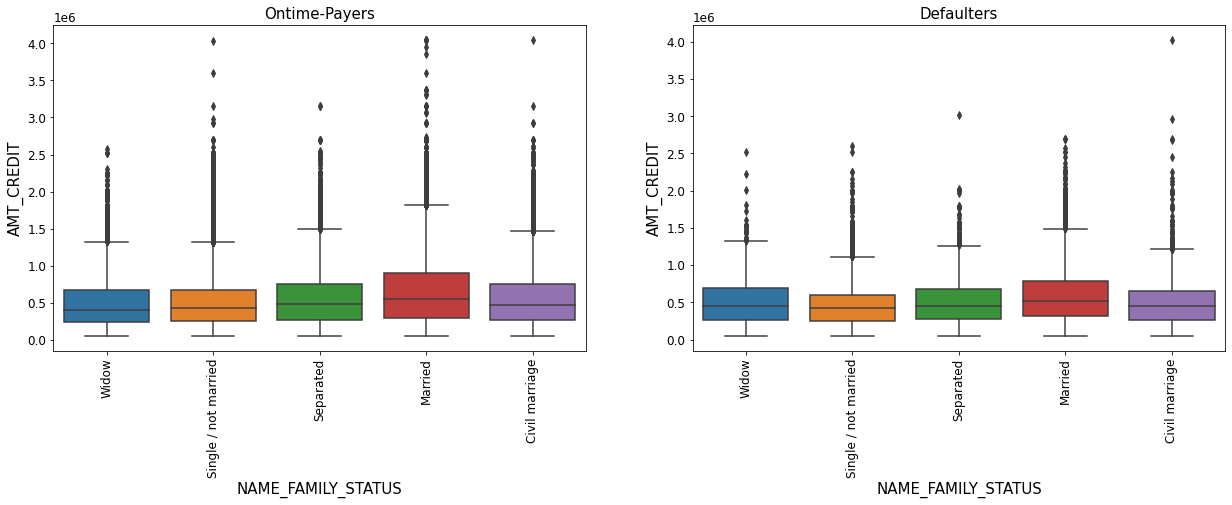

In [89]:
numcat_bivar('NAME_FAMILY_STATUS','AMT_CREDIT')

- Married followes by Separated got higher credits has no payment difficulties

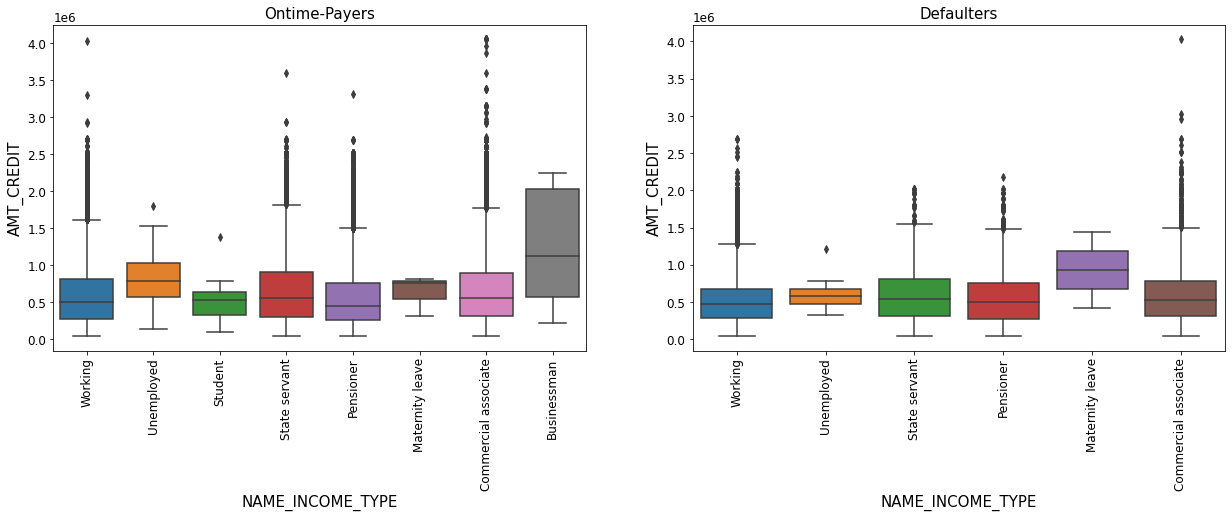

In [90]:
numcat_bivar('NAME_INCOME_TYPE','AMT_CREDIT')

- Bussinessman who got high loan amount tends to pay it ontime
- Similarly Student eventhough credit amount is low tends to pay ontime
- But Maternity leave clients eventhough their representation is less in data tends to have more payement difficulty than ontime payment

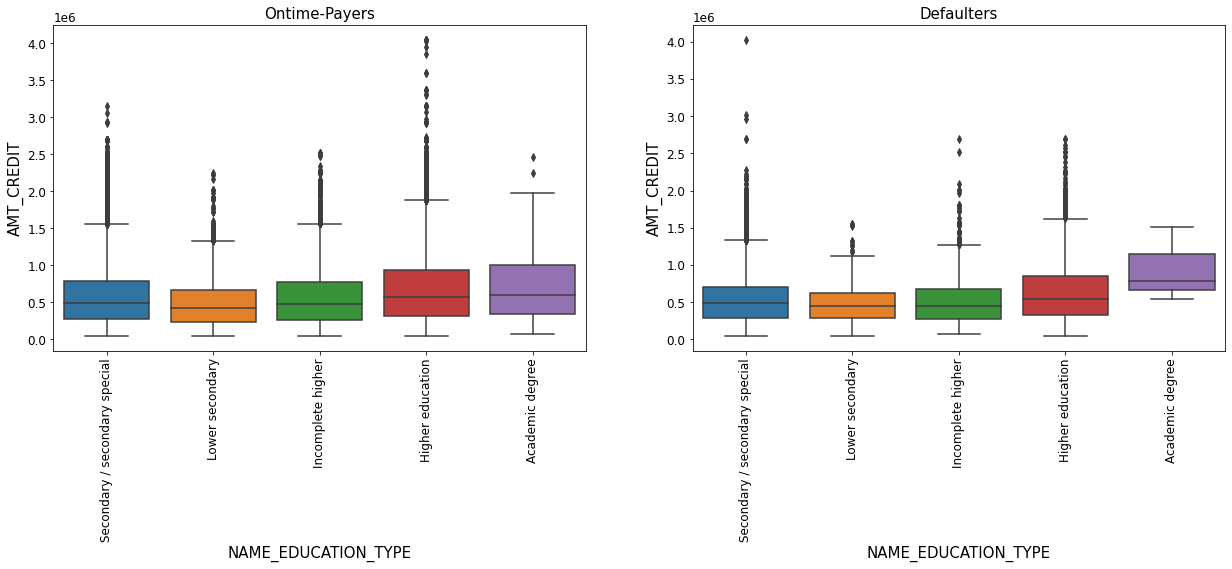

In [334]:
numcat_bivar('NAME_EDUCATION_TYPE','AMT_CREDIT')

- Higher Education and Academic degree received more credits and their presence is more in Ontime paying category
- As Education level is low defaulting tendency is high

In [91]:
#Multivariate Analysis
def num_cat(column1,column2,column3):
    plt.figure(figsize=(20,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.subplot(1,2,1)
    sns.boxplot(data=TARGET_0,x=column1,y=column2,hue=column3,hue_order=sorted(TARGET_0[column3].value_counts().index,reverse=True))
    plt.title('Ontime-Payers')
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=TARGET_1,x=column1,y=column2,hue=column3,hue_order=sorted(TARGET_0[column3].value_counts().index,reverse=True))
    plt.title('Defaulters')
    plt.suptitle('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.xticks(rotation=90)
    plt.show()

In [92]:
def num_cat_bar(column1,column2,column3):
    plt.figure(figsize=(18,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=11)
    plt.rc('ytick', labelsize=11)
    plt.subplot(1,2,1)
    sns.barplot(data=TARGET_0,x=column1,y=column2,hue=column3,hue_order=sorted(TARGET_0[column3].value_counts().index,reverse=True),estimator=lambda x:np.quantile(x,0.75),ci=None)
    plt.title('Ontime-Payers')
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.barplot(data=TARGET_1,x=column1,y=column2,hue=column3,estimator=lambda x:np.quantile(x,0.75),ci=None)
    plt.title('Defaulters')
    plt.suptitle('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.xticks(rotation=90)
    plt.show()

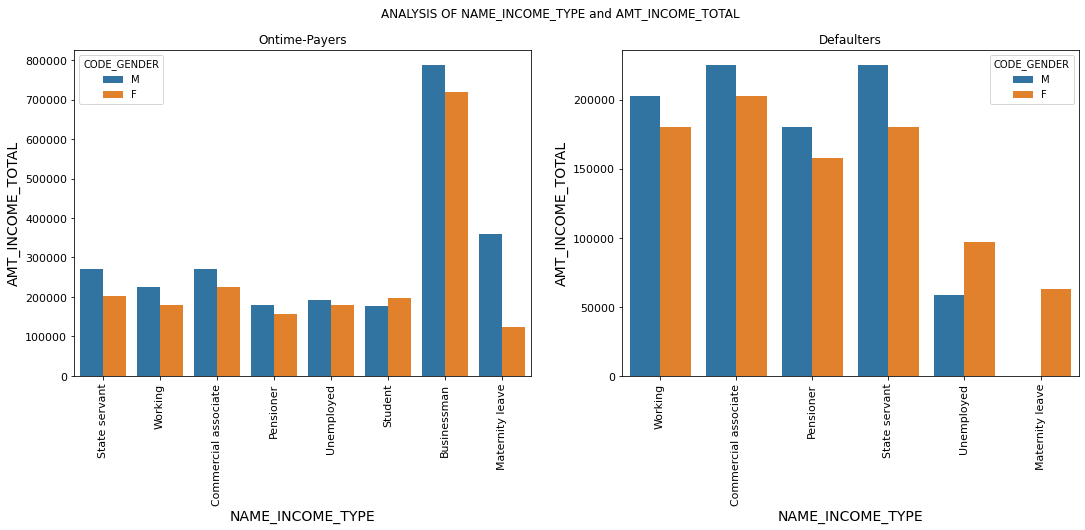

In [93]:
num_cat_bar('NAME_INCOME_TYPE','AMT_INCOME_TOTAL','CODE_GENDER')

- Working class & Commercial associate and State servant, both Male and Female have payment difficulties  for low income
- Businessman has high income and also an ontime payer 
- students eventhough income is less they pay loan ontime

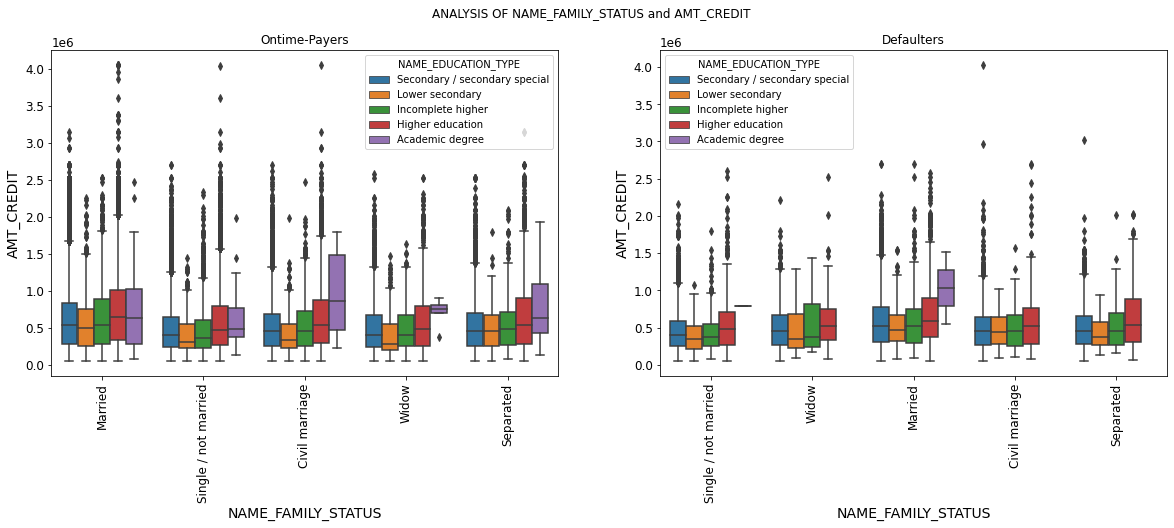

In [94]:
num_cat('NAME_FAMILY_STATUS','AMT_CREDIT','NAME_EDUCATION_TYPE')

- Married Academic degree having high credit has difficulty in loan repayment
- But when considered all other Family_status categories we found that people with Academic degree are paying loan ontime and also have credit amount high
- Higher Education,Secondary Education have higher outliers in Ontime_payers credit amount 
- civil marriage and Separated cases have most credit in upper quartile.

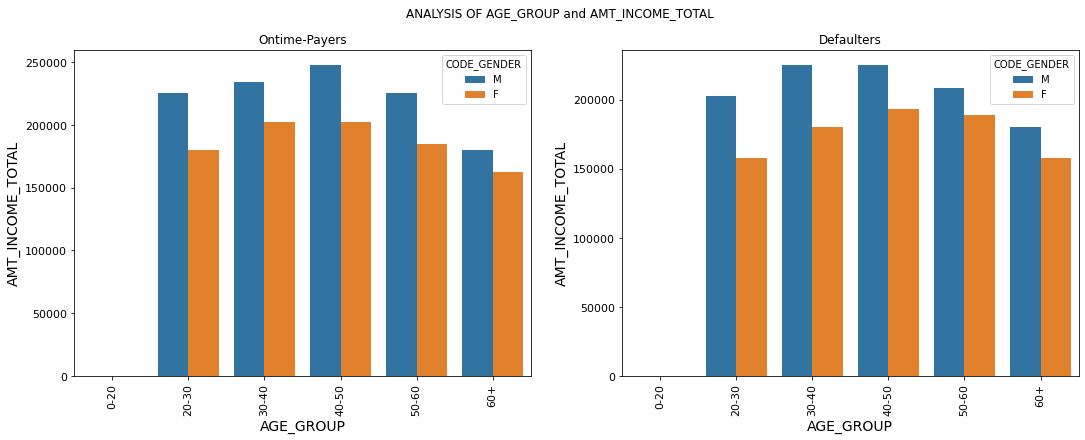

In [225]:
num_cat_bar('AGE_GROUP','AMT_INCOME_TOTAL','CODE_GENDER')

- Graph is somewhat similar in both scenerios.And overall Male has higher income and also higher payment difficulties
- For Age group 30 to 50 we can see even for high Income Male find it difficult for payment


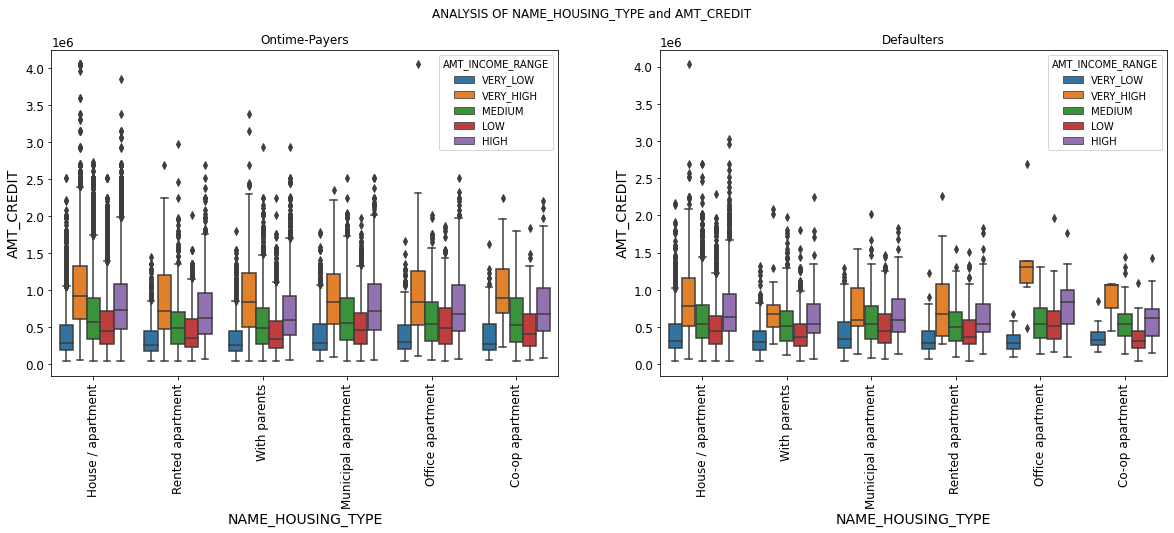

In [226]:
num_cat('NAME_HOUSING_TYPE','AMT_CREDIT','AMT_INCOME_RANGE')

- Very High and High income in all housing types has credit amount high and they are ontime payers 
- Rented and With parents other than very high income all other have low credit compared to other housing types for ontime payers
- High Income with High credit defaults more in office apartment

- ### Categorical-Categorical Analysis

In [95]:
# DEfine Function
def cat_cat(column1,column2):
    plt.figure(figsize=(20,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.subplot(1,2,1)
    sns.countplot(data=TARGET_0,x=column1,hue=column2,hue_order=sorted(TARGET_0[column2].value_counts().index,reverse=True))
    plt.title('Ontime-Payers',size=14)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(data=TARGET_1,x=column1,hue=column2,hue_order=sorted(TARGET_1[column2].value_counts().index,reverse=True))
    plt.title('Defaulters',size=14)
    plt.suptitle('ANALYSIS OF'+' '+ column1+' and '+column2,size=15)
    plt.xticks(rotation=90)
    plt.show()

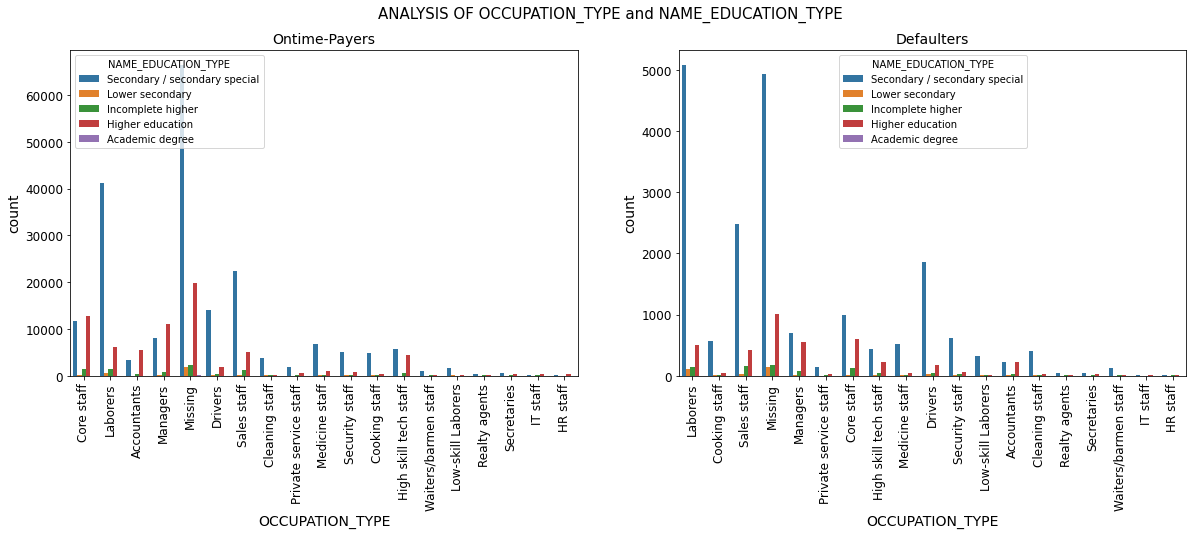

In [96]:
# Analysis of OCCUPATION_TYPE & NAME_EDUCATION_TYPE
cat_cat('OCCUPATION_TYPE','NAME_EDUCATION_TYPE')

- Laborers with secondary education with payment difficulty is more than without difficulty in payment followed by sales staff and drivers
- As education and job is on higher grade ,payment difficulty decreases

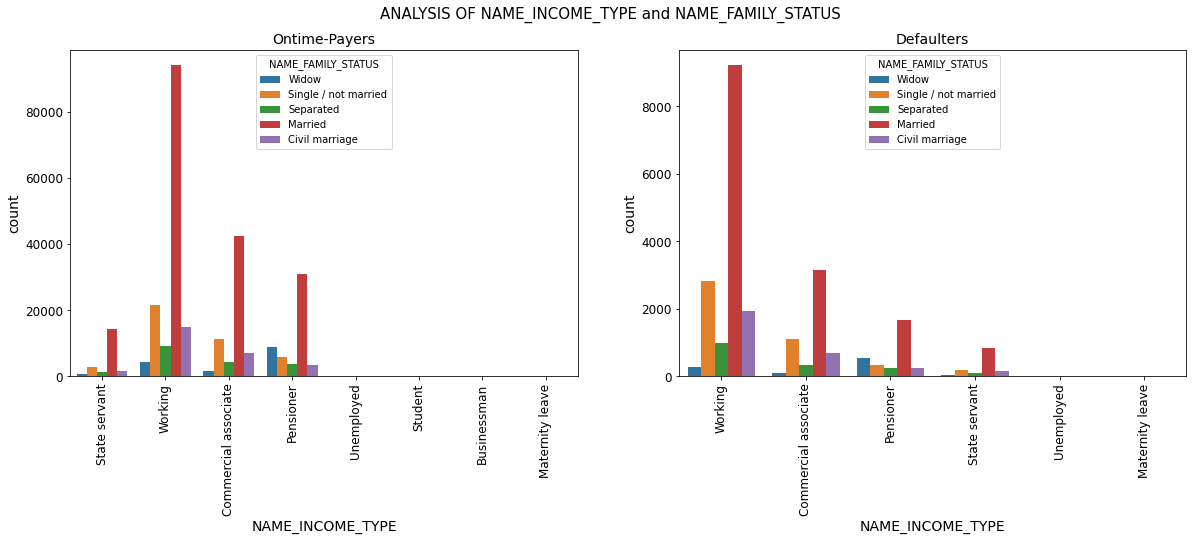

In [262]:
# Analysis of NAME_INCOME_TYPE & NAME_FAMILY_STATUS
cat_cat('NAME_INCOME_TYPE','NAME_FAMILY_STATUS')

- Married Working has high records in both categories
- Single and civil mariiage has more payment difficulties
- Maternity leave clients has payment difficulties even if they are in low number

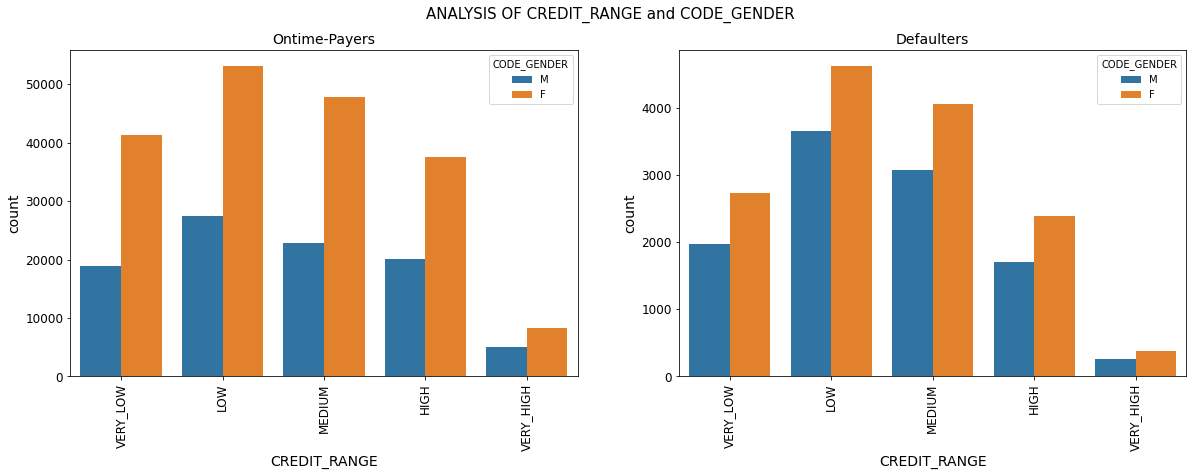

In [236]:
# Analysis of CREDIT_RANGE & CODE_GENDER
cat_cat('CREDIT_RANGE','CODE_GENDER')

- Females have high Credit amount of the loan than males
- Males with Low and Medium credit range defaults more than other categories


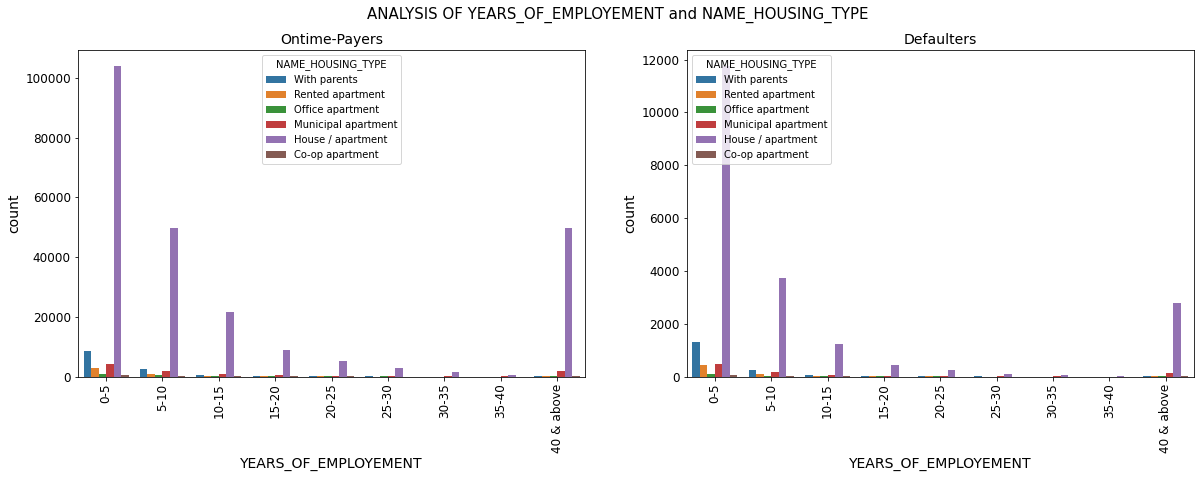

In [237]:
# Analysis of YEARS_OF_EMPLOYEMENT & NAME_HOUSING_TYPE
cat_cat('YEARS_OF_EMPLOYEMENT','NAME_HOUSING_TYPE')

- Clients with less experience and House/apartment as housing situation is first in both cases.Less experienced low income ones may be defaulters
- As experince increases for all categories of housing type payment difficulty decreases and its obvious

### CORRELATION CALCULATION

### Correlation Analysis for Clients with Payment Difficulties

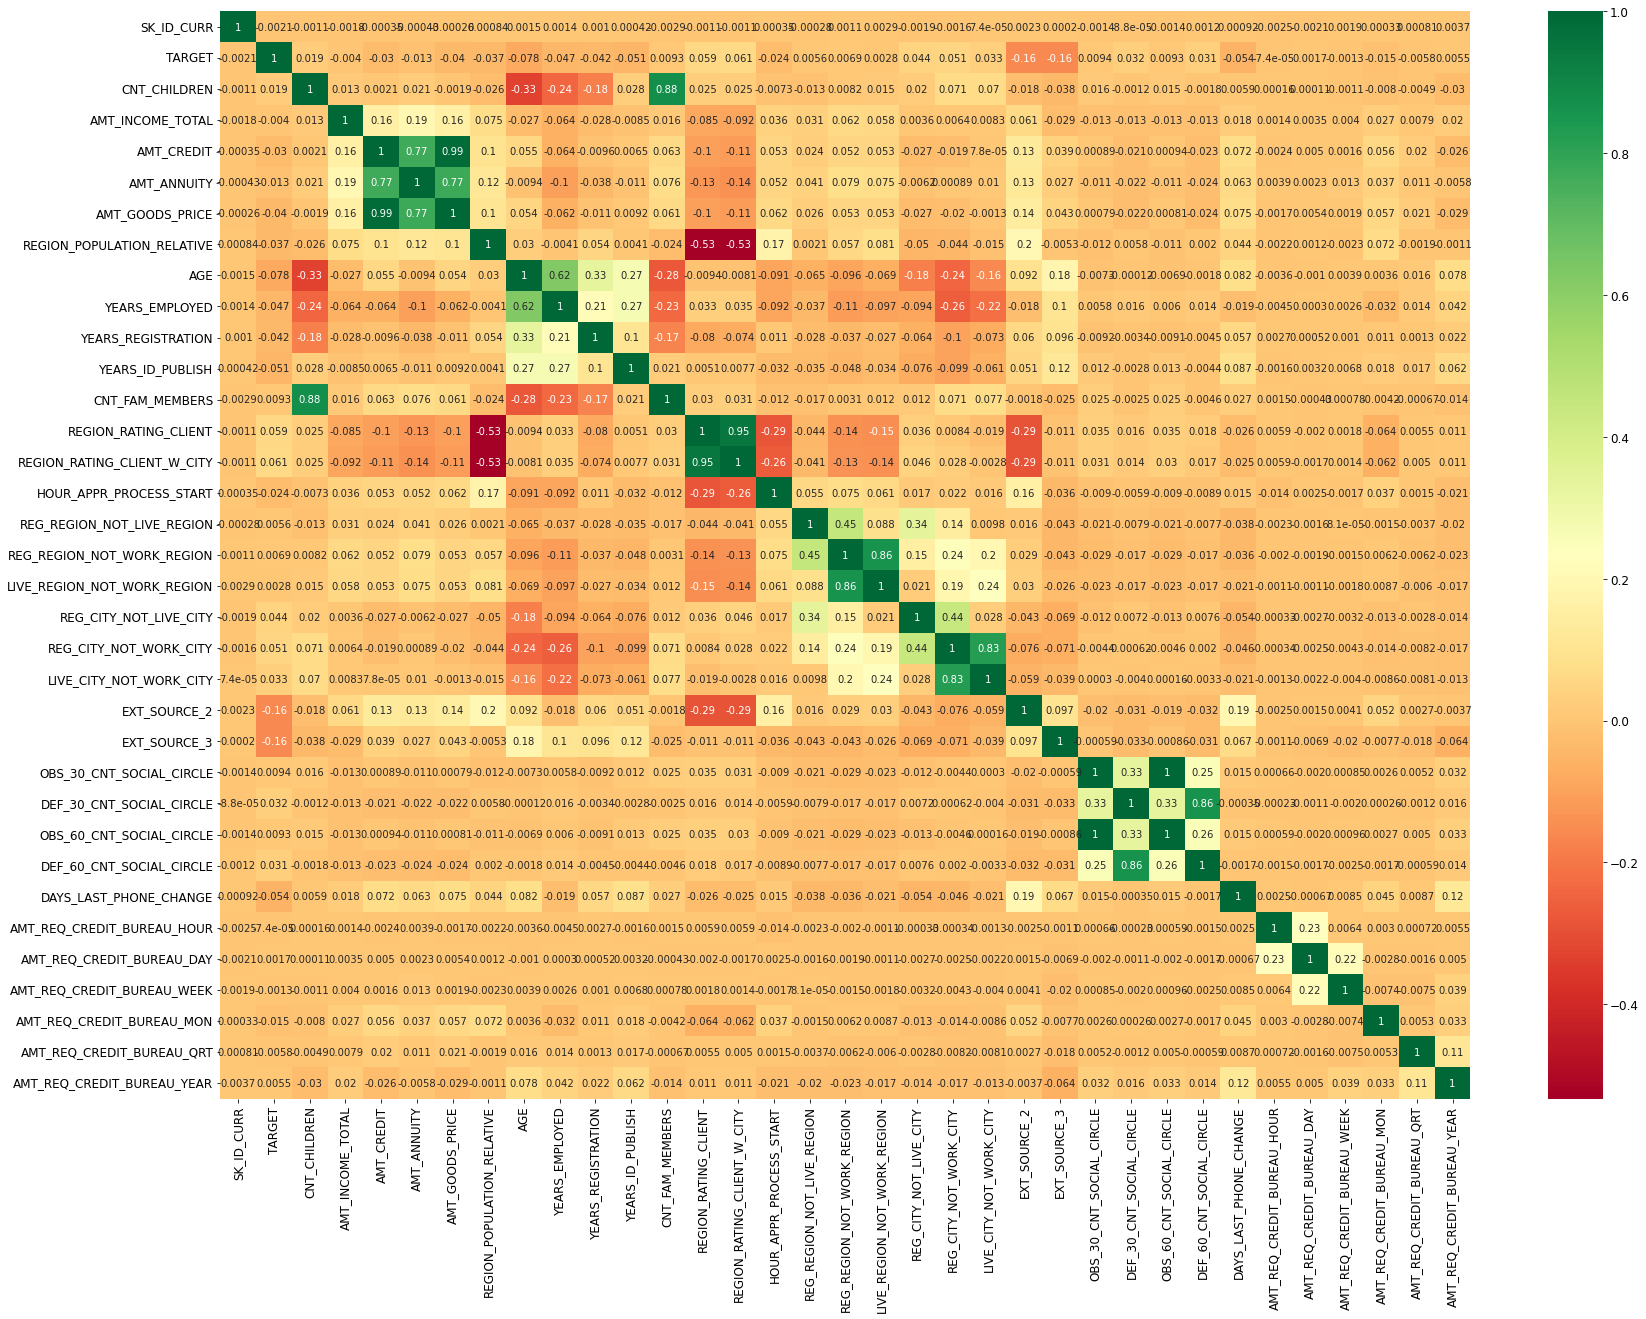

In [97]:
# Correlation plot for App_data
plt.figure(figsize=(28,20))
sns.heatmap(App_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [155]:
# As TARGET is not a continuous variable which is increasing or decreasing.We remove TARGET variable here for sake of correlation calculation
CorrTARGET_1=TARGET_1.drop('TARGET',axis=1)

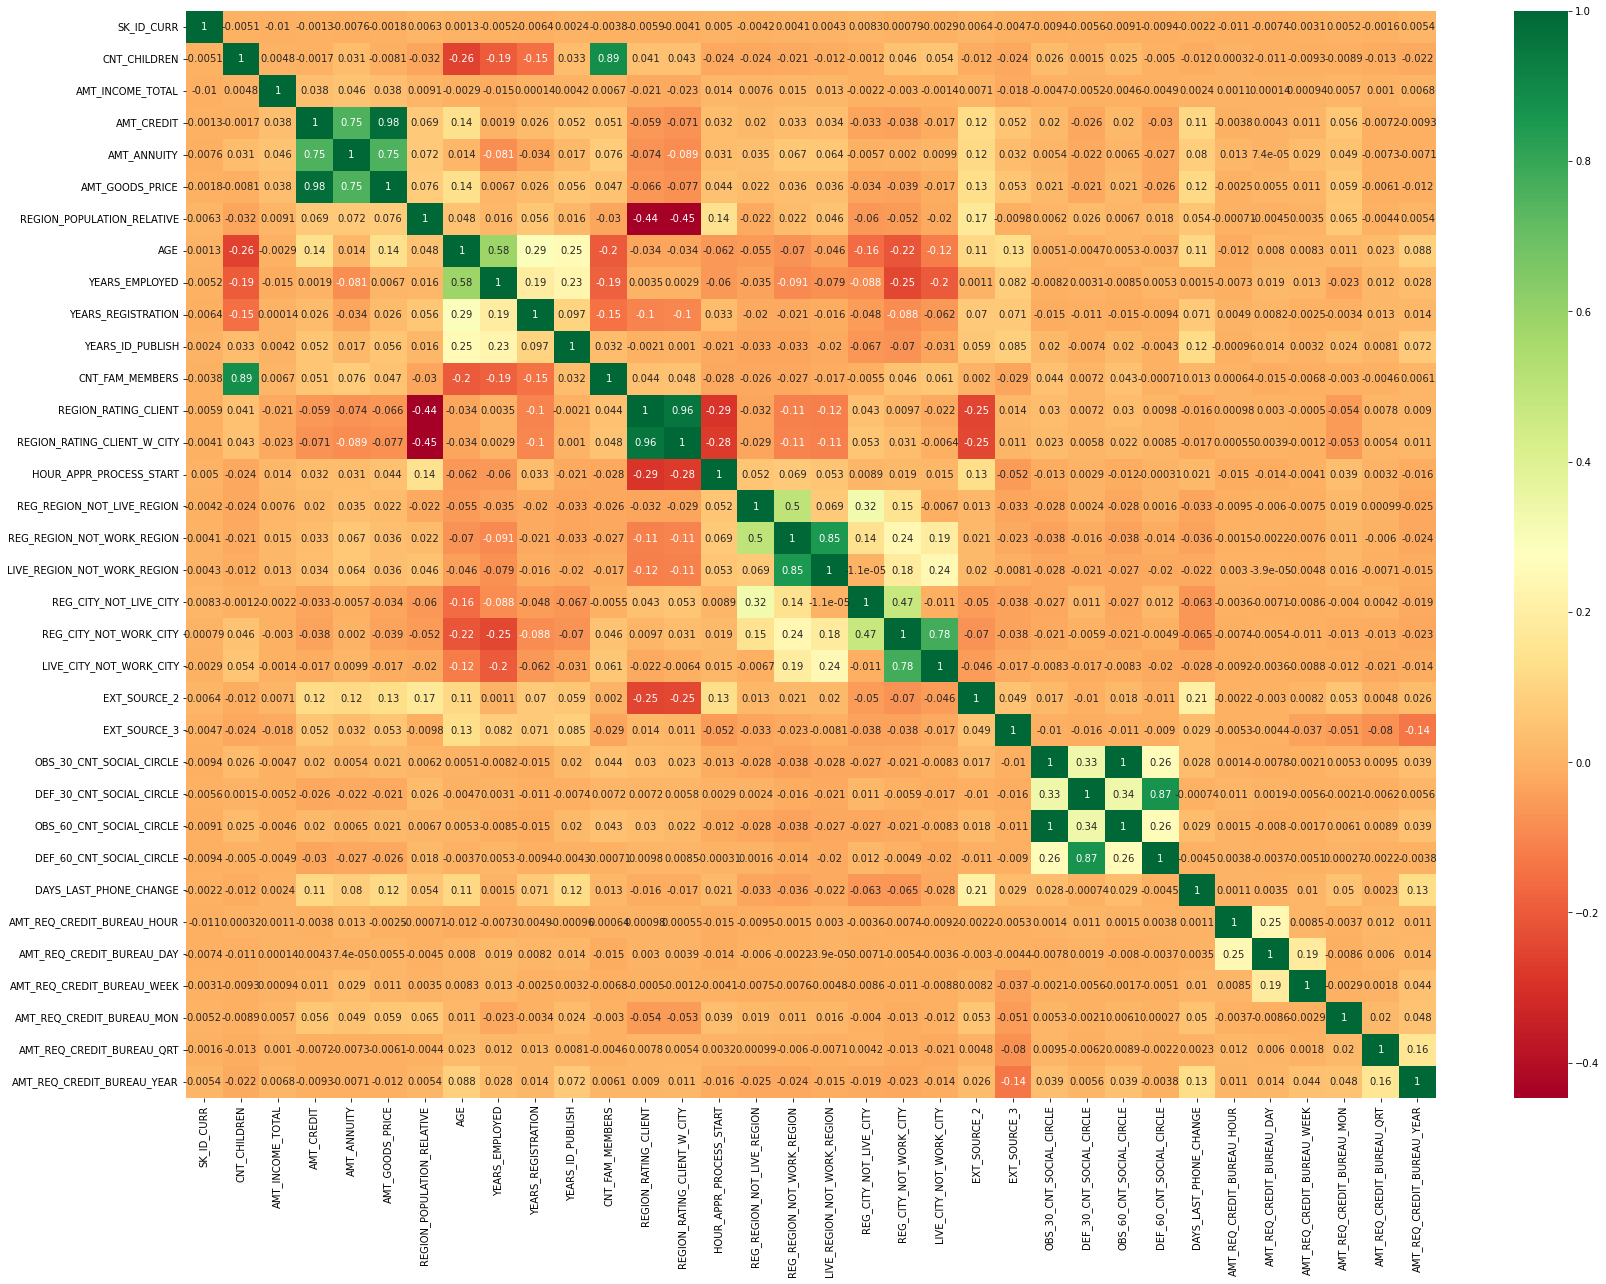

In [156]:
#plot correlation using HEATMAP
plt.figure(figsize=(28,20))
sns.heatmap(CorrTARGET_1.corr(),annot=True,cmap="RdYlGn")
plt.show()

 #### TOP 10 Correlation for TARGET_1 
- AMT_CREDIT-AMT_GOODS_PRICE   0.98
- REGION_RATING_CLIENT - REGION_RATING_CLIENT_W_CITY 0.96
- CNT_FAM_MEMBERS - CNT_CHILDREN 0.88
- DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE 0.87
- REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION 0.85
- REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY 0.78
- AMT_CREDIT-AMT_ANNUITY  0.75
- AMT_GOODS_PRICE-AMT_ANNUITY 0.75
- AGE-YEARS_EMPLOYED 0.58
- REG_REGION_NOT_WORK_REGION-REG_REGION_NOT_LIVE_REGION 0.5

### Correlation Analysis for Clients Without Payment Difficulties

In [157]:
# As TARGET is not a continuous variable which is increasing or decreasing.We remove TARGET variable here for sake of correlation calculation
Corr_TARGET_0=TARGET_0.drop('TARGET',axis=1)

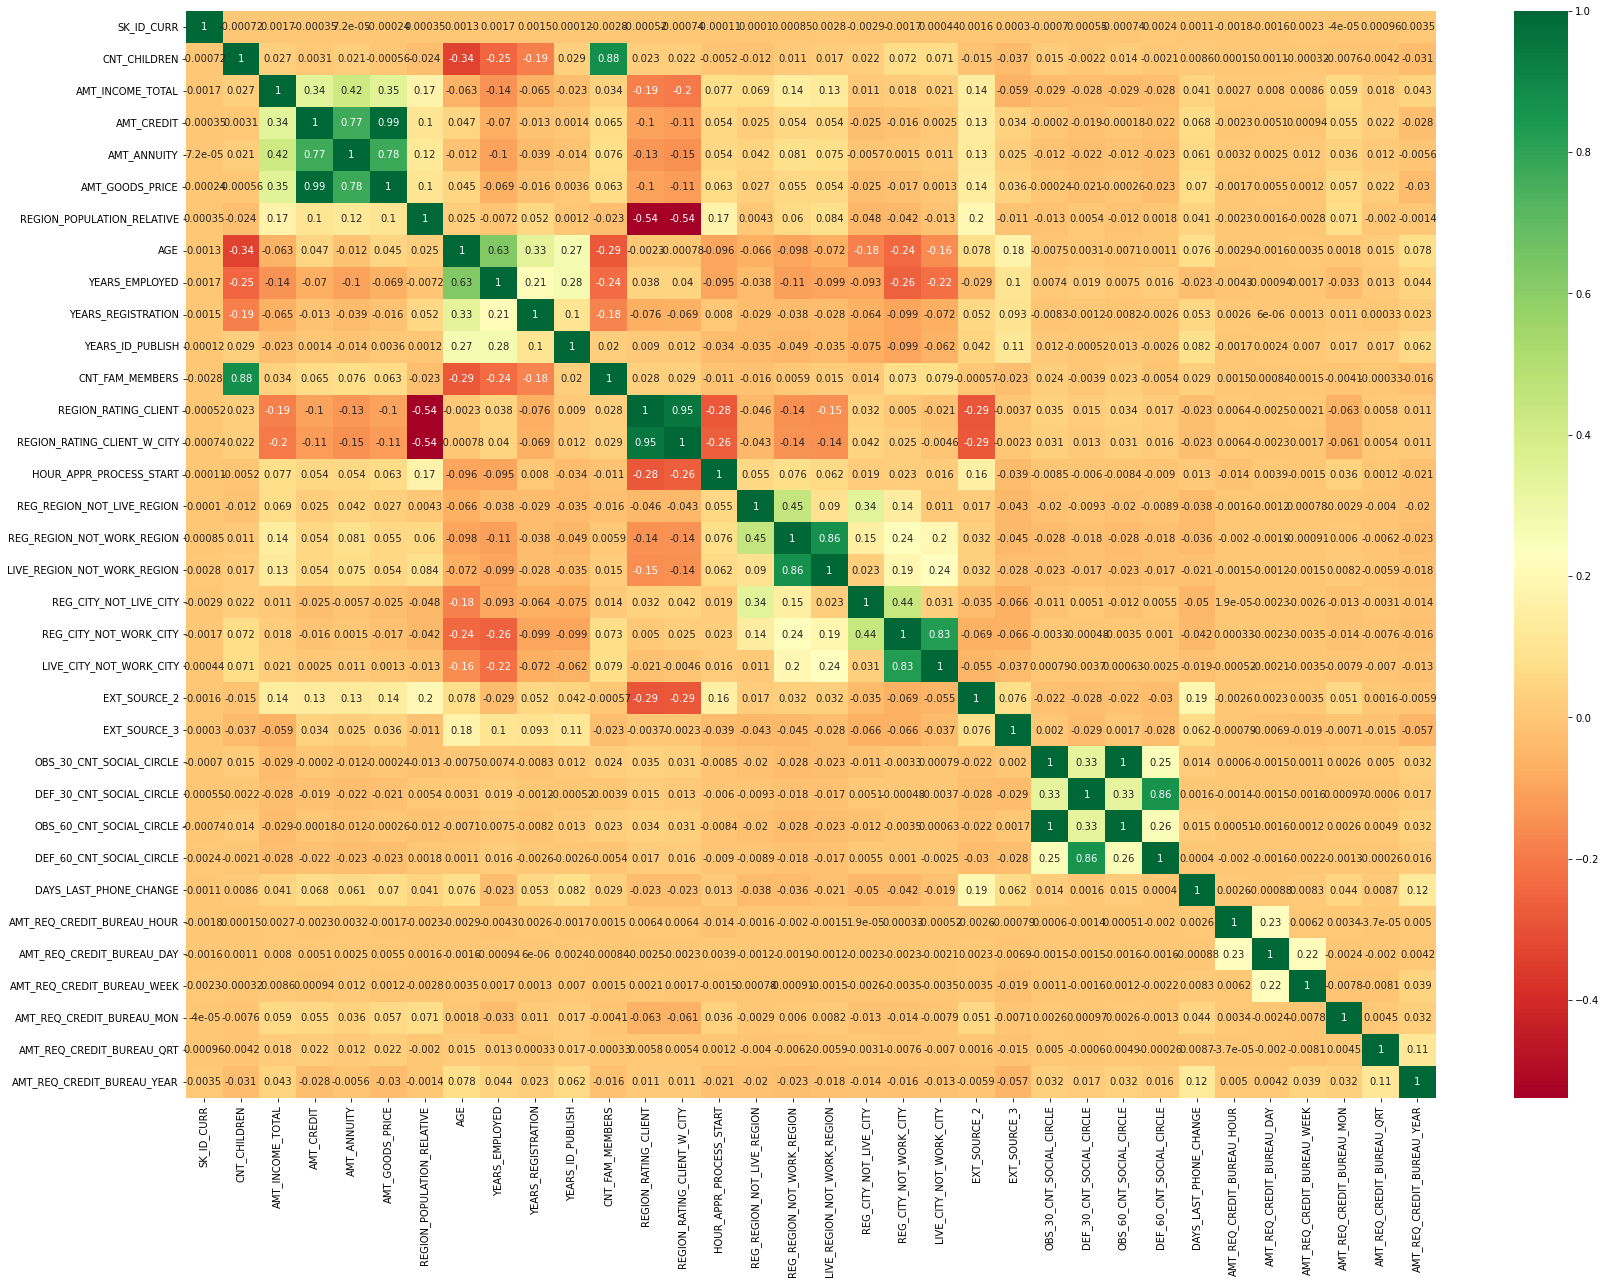

In [158]:
#Correlation calculation using HEATMAP
plt.figure(figsize=(28,20))
sns.heatmap(Corr_TARGET_0.corr(),annot=True,cmap="RdYlGn")
plt.show()

 #### TOP 10 Correlation for TARGET_0 
- AMT_CREDIT-AMT_GOODS_PRICE   0.99
- REGION_RATING_CLIENT - REGION_RATING_CLIENT_W_CITY 0.95
- CNT_FAM_MEMBERS - CNT_CHILDREN 0.88
- DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE 0.86
- REG_REGION_NOT_WORK_REGION - LIVE_REGION_NOT_WORK_REGION 0.86
- REG_CITY_NOT_WORK_CITY - LIVE_CITY_NOT_WORK_CITY 0.83
- AMT_GOODS_PRICE-AMT_ANNUITY 0.78
- AMT_CREDIT-AMT_ANNUITY  0.77
- AGE-YEARS_EMPLOYED 0.63
- REG_REGION_NOT_WORK_REGION-REG_REGION_NOT_LIVE_REGION 0.45

## PREVIOUS APPLICATION DATA ANALYSIS

In [98]:
# Import dataset
Prev_data=pd.read_csv('previous_application.csv')

In [239]:
# print top 5 rows
Prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [99]:
#check structure of dataframe
Prev_data.shape

(1670214, 37)

In [100]:
# To check full info with columns and  their data types
Prev_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [241]:
# get statistical info
Prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## <b> Data Cleaning </b>

### Handling Missing Values

In [101]:
#check null value percentage
null_perc=Prev_data.isnull().mean()*100
null_perc

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [102]:
# Check columns where missing value percentage is >40
null_perc[null_perc>40]


AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [103]:
#Assign null values>40% index to a variable
Above_40=null_perc[null_perc>40].index.to_list()

In [104]:
# As most of the rows are missing for this columns we can drop these columns
Prev_data.drop(Above_40,axis=1,inplace=True)


In [105]:
# check shape of df
Prev_data.shape

(1670214, 26)

In [168]:
# Now again check the percentage of null values
Prev_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [230]:
# HAndling missing values for AMT_ANNUITY,AMT_CREDIT,CNT_PAYMENT
for i in ['AMT_ANNUITY','AMT_CREDIT','CNT_PAYMENT']:
    print(i ,':\n',Prev_data[i].describe(),'\n')

AMT_ANNUITY :
 count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64 

AMT_CREDIT :
 count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64 

CNT_PAYMENT :
 count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64 



As Missing percentage is high and as they are numerical column we can keep it as it is for now

In [231]:
# Handling PRODUCT_COMBINATION 
Prev_data.PRODUCT_COMBINATION.value_counts(dropna=False) 

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
NaN                                  346
Name: PRODUCT_COMBINATION, dtype: int64

In [106]:
# As its a categorical columns and missing values are less.We can impute missing values with mode
Prev_data.PRODUCT_COMBINATION.fillna(Prev_data.PRODUCT_COMBINATION.mode()[0],inplace=True)

### Checking and Correcting incorrect data

In [234]:
# check NAME_CONTRACT_TYPE
Prev_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [107]:
# we can impute this with mode as cash loans is most
Prev_data.NAME_CONTRACT_TYPE.replace('XNA','Cash loans',inplace=True)

In [169]:
# check NAME_CASH_LOAN_PURPOSE
Prev_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [108]:
# As missing values XNA and XAP percentage is high.Replacing them with mode will result in wrong analysis.So we replace it with 'NOT AVAILABLE'
Prev_data.NAME_CASH_LOAN_PURPOSE.replace(['XNA','XAP'],'NOT AVAILABLE',inplace=True)

In [171]:
# Check DAYS_DECISION
Prev_data.DAYS_DECISION.unique()

array([  -73,  -164,  -301, ..., -1967, -2389,    -1], dtype=int64)

In [109]:
# As it has negative values and days cant be negative.so convert to positive
Prev_data.DAYS_DECISION=Prev_data.DAYS_DECISION.abs()

In [238]:
# check NAME_CLIENT_TYPE
Prev_data.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

In [110]:
# As Repeater is having higher percentage and XNA count is less.So replace XNA with Repeater
Prev_data.NAME_CLIENT_TYPE.replace('XNA','Repeater',inplace=True)

In [175]:
for i in ['NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']:
    print(i,':\n',Prev_data[i].value_counts(normalize=True)*100,end='\n\n')

NAME_PAYMENT_TYPE :
 Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

CODE_REJECT_REASON :
 XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

NAME_GOODS_CATEGORY :
 XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.30

For above columns XNA percentage is high so we are not replacing it with mode.It can be misentry or customer not filled the column.we will leave it as it is

### OUTLIER ANALYSIS

In [111]:
# define function
def outlier_prev(column):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,6))
    sns.boxplot(Prev_data[column])
    plt.title('Outlier Analysis of '+' '+column)
    plt.tight_layout(pad=3)
    plt.show()

In [177]:
# Display statistical info
for i in ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE']:
    print(i,':\n',Prev_data[i].describe(),end='\n\n')

AMT_ANNUITY :
 count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

AMT_APPLICATION :
 count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

AMT_CREDIT :
 count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

AMT_GOODS_PRICE :
 count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64



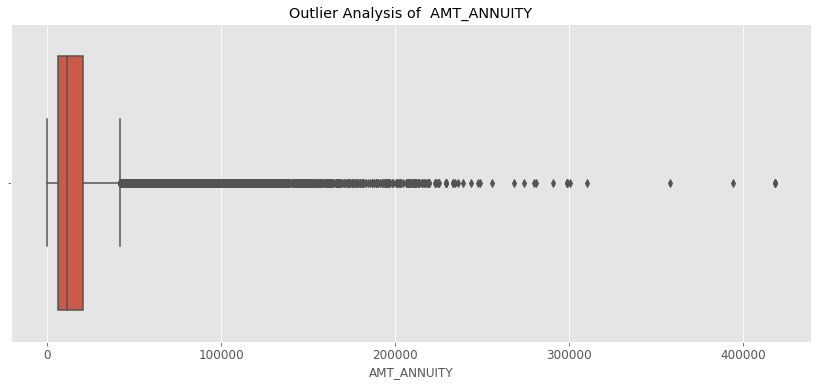

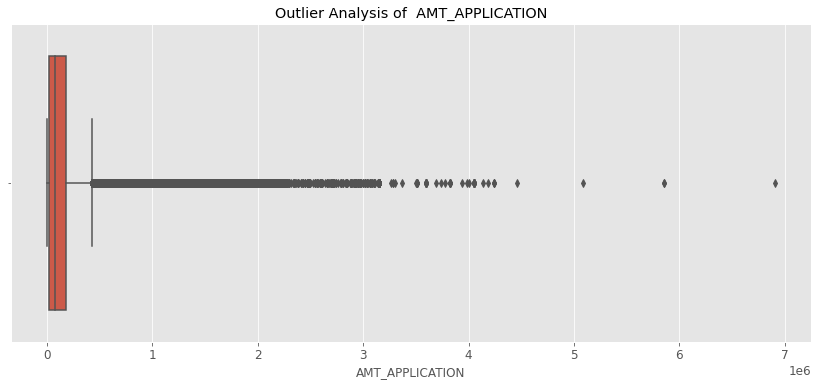

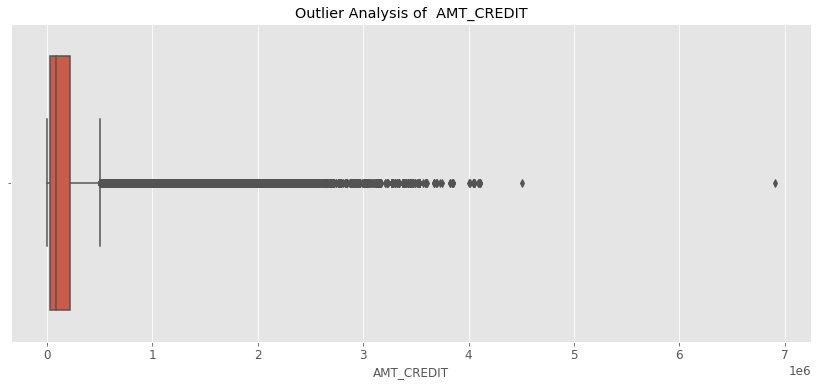

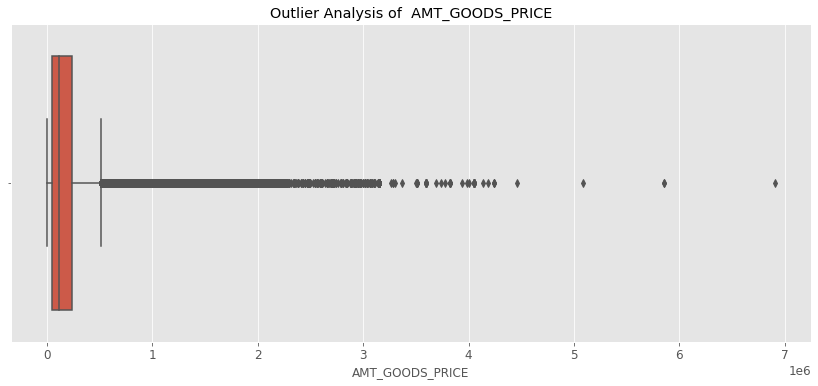

In [112]:
for i in ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE']:
    outlier_prev(i)

<b> Observations: </b>

  - From statistical and boxplot we understand the presence of Outliers
  - For AMT_ANNUITY most values lies between ~ 6k & 21k and above ~ 42k all values are outliers
  - For AMT_APPLICATION most values lies between approximately 18k and 180k and above ~ 400k all are outliers
  - For AMT_CREDIT most values lies between 24k and 200k and above ~ 500k all are outliers
  - For AMT_GOODS_PRICE most values lies between 50k and 230k approxiamtely and all above ~ 500k are considered as outliers

### UNIVARIATE ANALYSIS

- ### Categorical Analysis

In [113]:
plt.style.use('default')
%matplotlib inline

In [114]:
# define function
def uni_var_cat(column):
    plt.figure(figsize=(13,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    sns.countplot(data=Prev_data,x=column)
    plt.title("Univariate Analysis of"+ ' '+column)
    plt.xticks(rotation=90)
    plt.show()

In [115]:
# Select categorical variables for analysis
categorical=['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY']

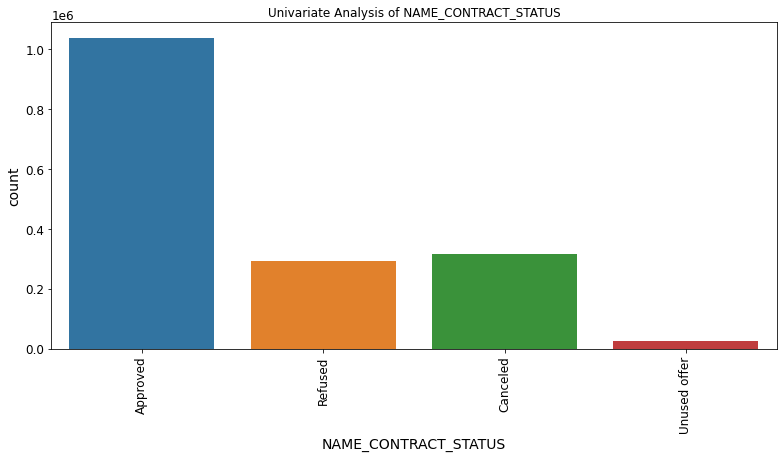

In [116]:
# Analysis of NAME_CONTRACT_STATUS
uni_var_cat('NAME_CONTRACT_STATUS')

- Approved loans outnumbered the Cancelled,Refused and Unused offer.
- Second is cancelled and cancelled and Refused have minor difference in count

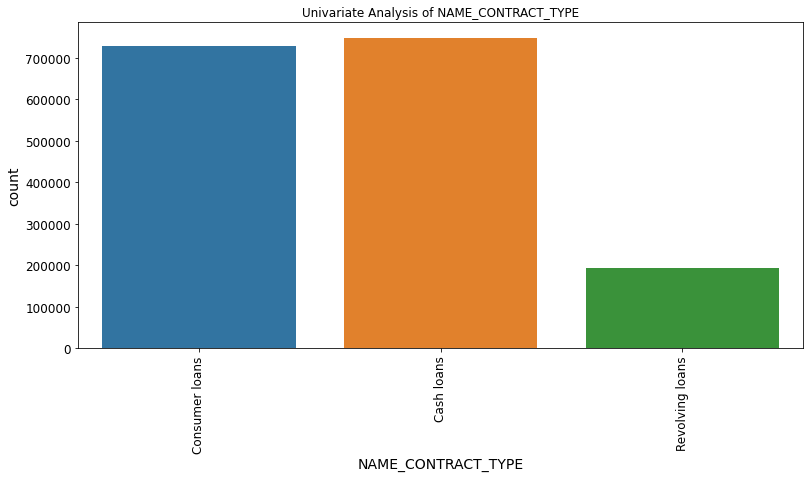

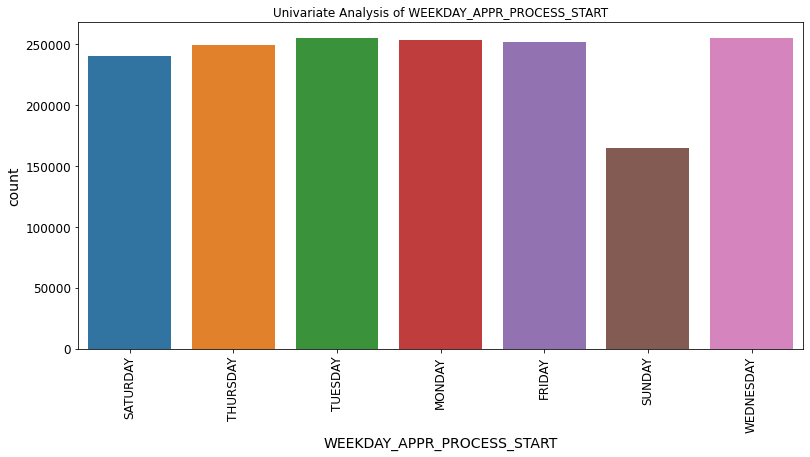

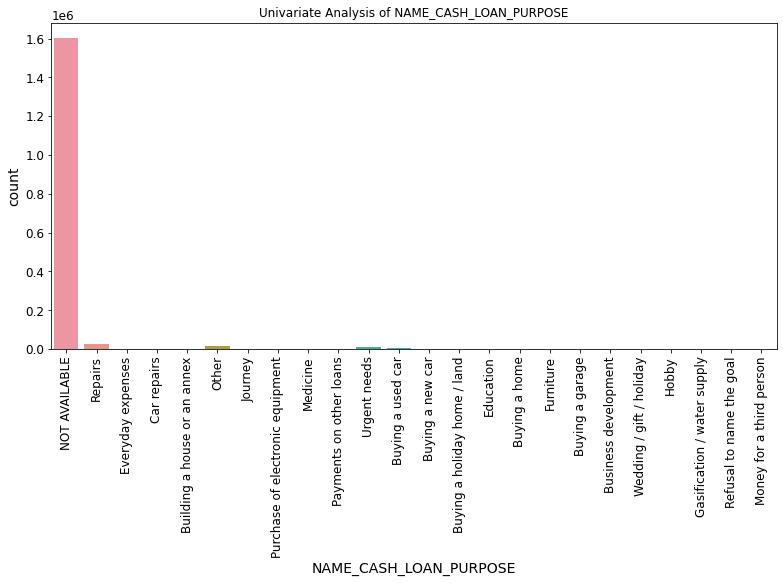

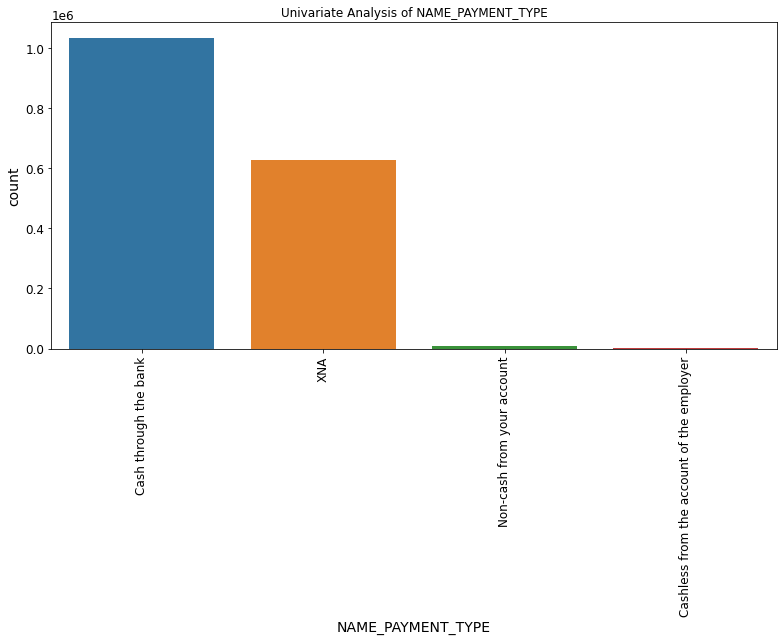

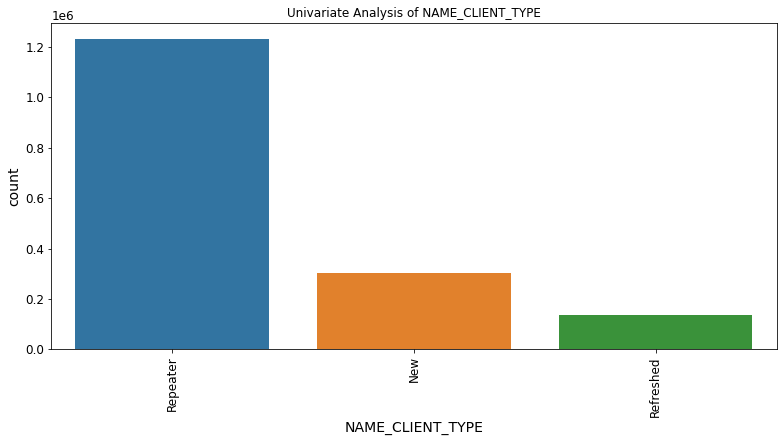

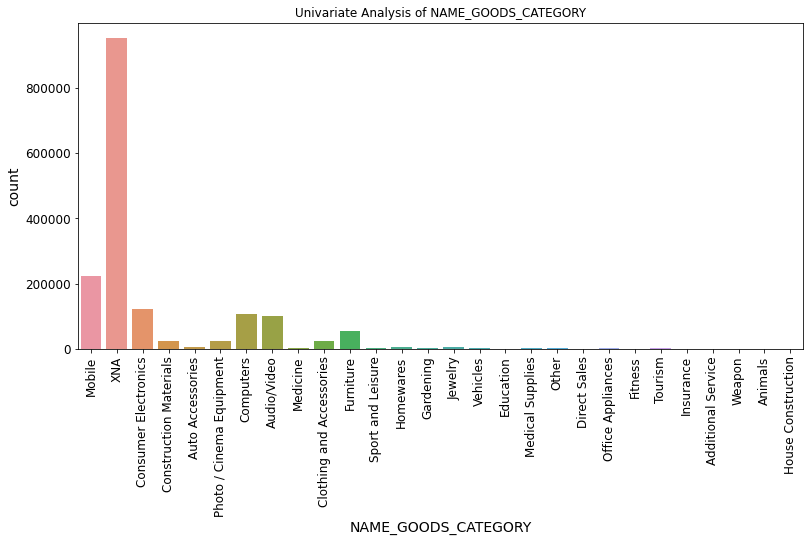

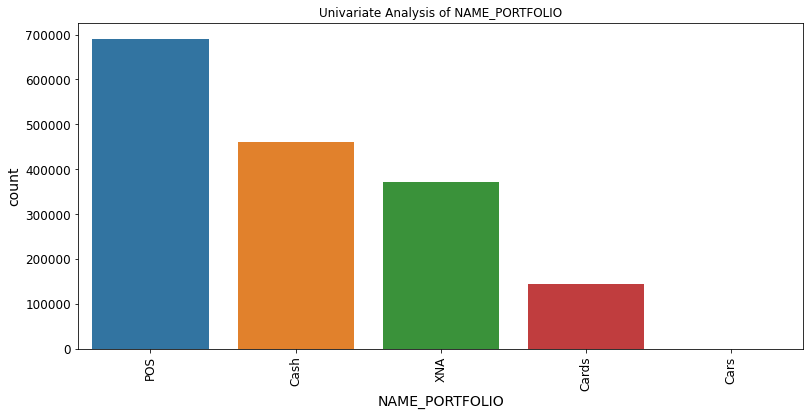

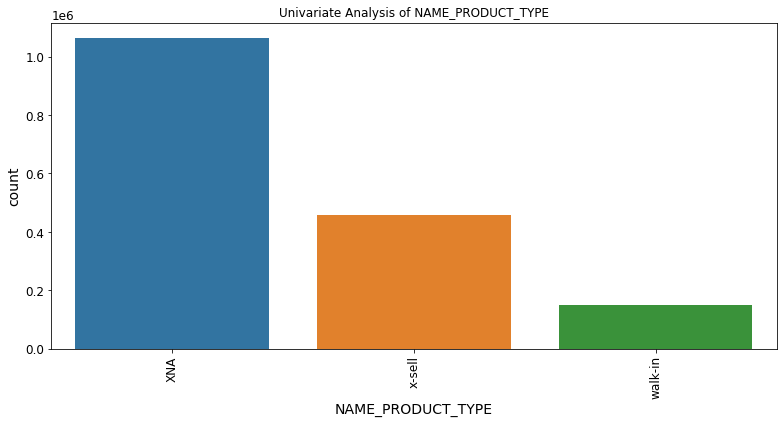

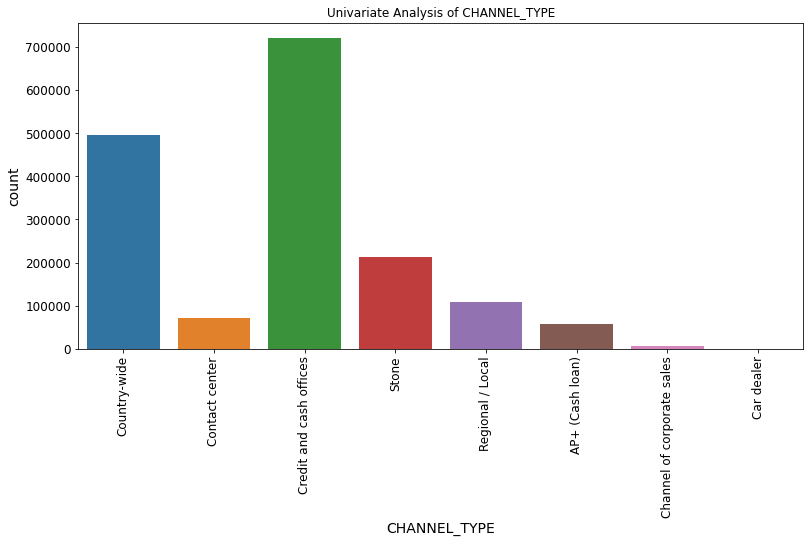

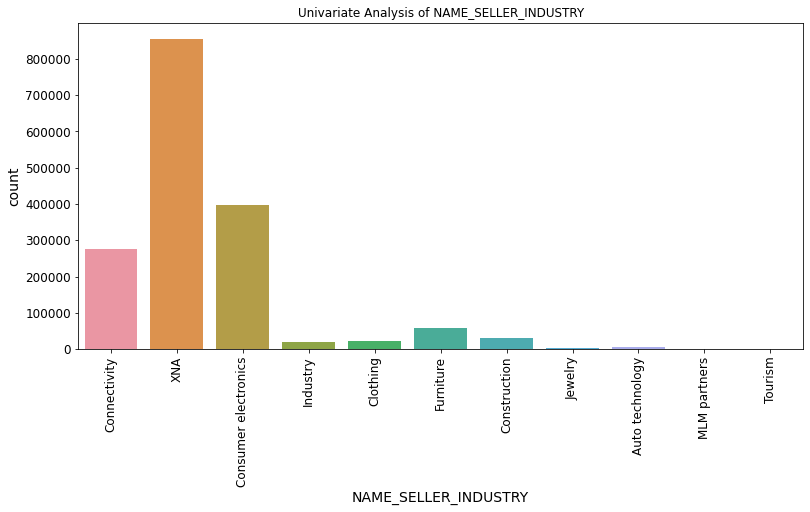

In [117]:
# Analysis of other variables
for i in categorical:
    uni_var_cat(i)

For many columns majority of data are in XNA or not available.Analysis done taking that apart

<b> Observations:- <b>
- Most of the clients preferred Cash loans than Consumer and Revolving loans previously also
- Most of the clients prefer weekdays for loan application.But some preferred weekends also
- Majority of the clients use loan for repairs,other and urgent needs.Rest of the parameters have negligible participation
- Clients done loan repayment through bank by cash 
- Already existing client outnumbered New clients
- Majority of clients applied for Mobiles in previous Application
- Most of the previous loan applications was for Point of sale followed by Cash and Cards
- Majority of the previuos application was cross shell than walkin.But most of the values was not filled properly
- Through Credit and cash offices and country-wide most of the previous clients were acquired
- consumer electronics and Connectivity are the good seller industries


- ### Numerical Variables

In [118]:
# function definition for Analysis
def uni_var_num(column):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(13,6))
    sns.distplot(Prev_data[column],bins=20)
    plt.title("Univariate Analysis of"+ ' '+column)
    plt.xticks(rotation=90)

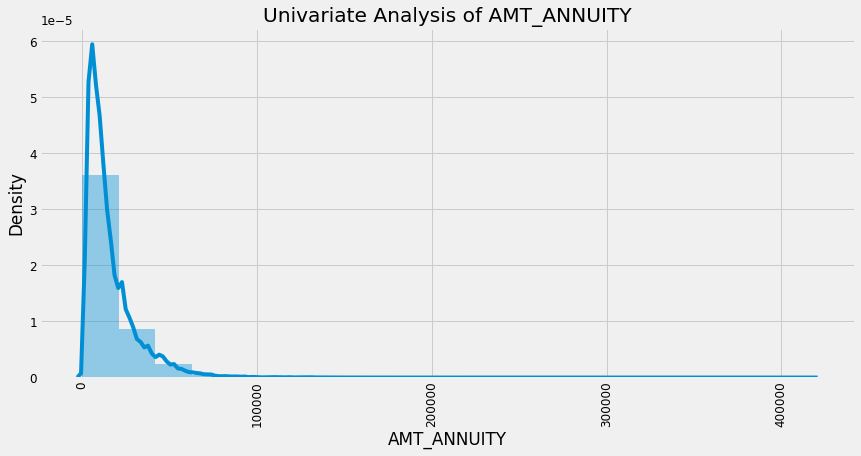

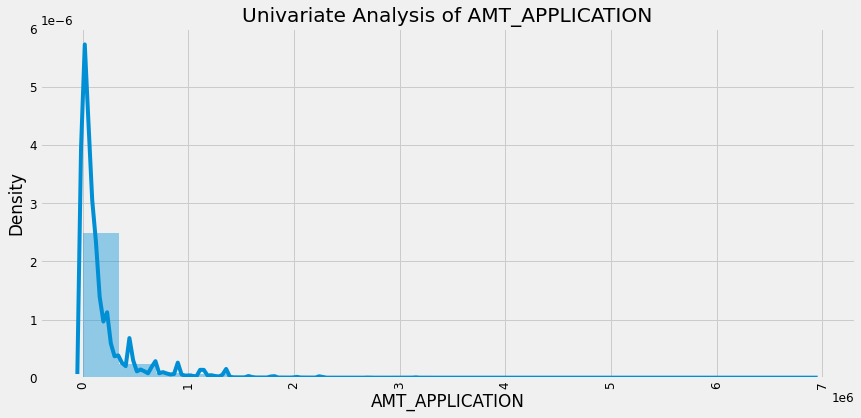

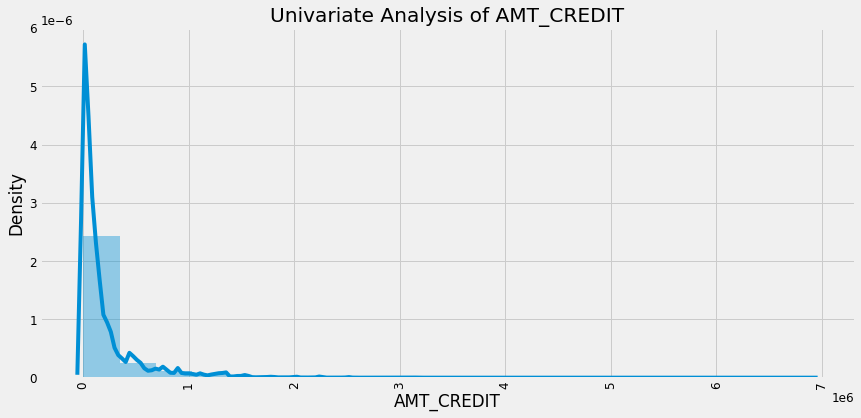

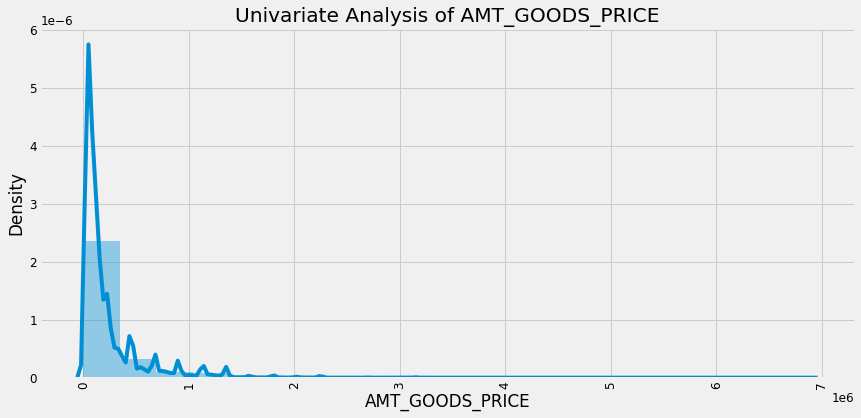

In [119]:
# Univariate Analysis of numerical variables
for i in ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_GOODS_PRICE']:
    uni_var_num(i)

- We can see majority of the values lies between 0 and 20k approximately for AMT_ANNUITY.As Annuity amount increases client number decreases.Graph is not normal distribution because of outliers
- AMT_APPLICATION:Loan amount asked by clients in previous application is low and spike at start prove this.This field also have outlier
- Credit Amount show similar distribution as AMT_APPLICATION and this shows almost all clients was sanctioned the amount they requested.Outliers are there
- Most of the Goods price of good that client asked for on the previous application lies within 200k.Outliers are there

### BIVARIATE ANALYSIS / MULTIVARIATE ANALYSIS

 ### Continuous-Continuous Analysis

In [120]:
#Bivariate Analysis
plt.style.use('default')
%matplotlib inline
def scatter_plot_bivar(column1,column2):
    plt.figure(figsize=(15,6))
    sns.scatterplot(data=Prev_data,x=column1,y=column2)
    plt.title('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.show()

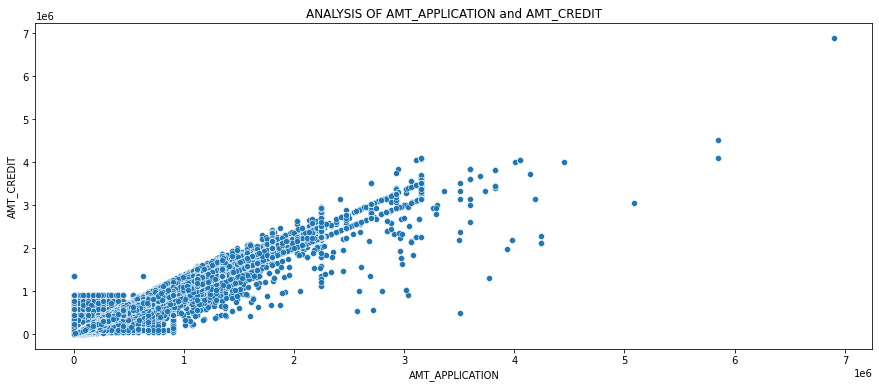

In [121]:
# Analysis of AMT_APPLICATION & AMT_CREDIT_PREV
scatter_plot_bivar('AMT_APPLICATION','AMT_CREDIT')

- AMT_APPLICATION and AMT_CREDIT has a positive correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

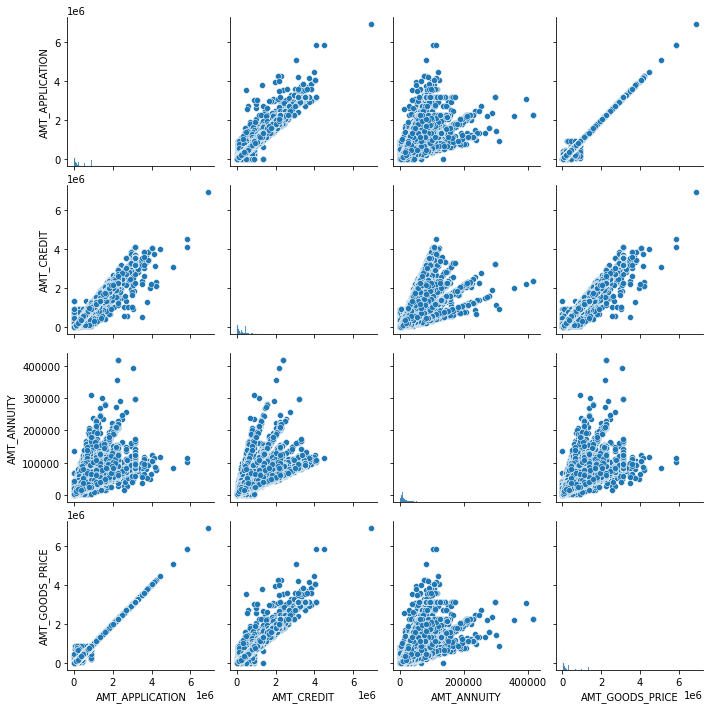

In [279]:
#Multivariate
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.pairplot(Prev_data[['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show

We can see all 4 variables have positive correlation with each other means one increases with other

### Numerical-Categorical Analysis

In [122]:
#Bivariate Analysis
def num_cat_bivar(column1,column2):
    plt.figure(figsize=(20,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    sns.barplot(data=Prev_data,x=column1,y=column2,estimator=lambda x:np.quantile(x,0.75))
    plt.title('ANALYSIS OF'+' '+ column1+' and '+column2,size=15)
    plt.xticks(rotation=90)
    plt.show()

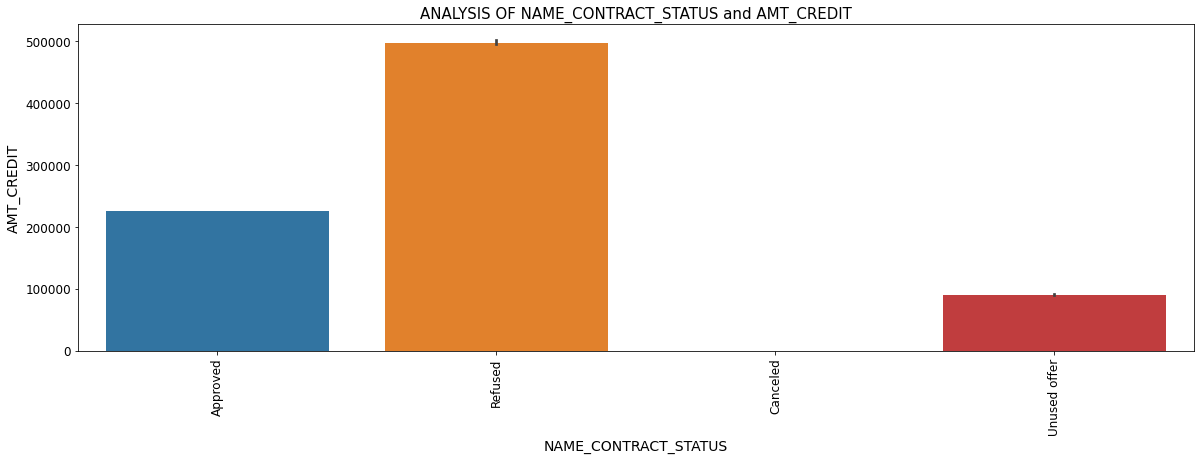

In [123]:
# Analysis of NAME_CONTRACT_STATUS & AMT_CREDIT
num_cat_bivar('NAME_CONTRACT_STATUS','AMT_CREDIT')

- We can see that lower credit amount request has been approved previously.Some unused offers are also there.Bank can concentrate on these unused offer ones

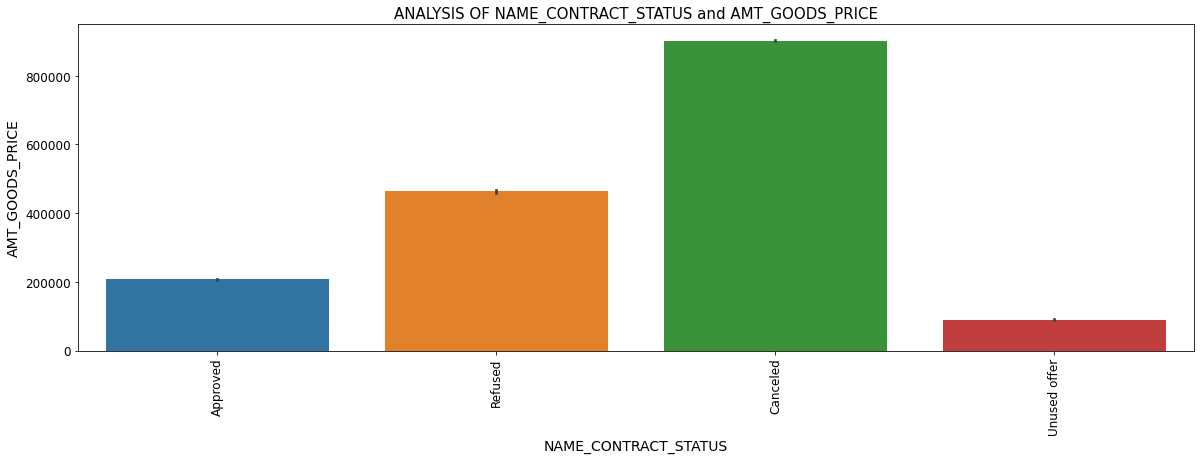

In [293]:
# Analysis of NAME_CONTRACT_STATUS & AMT_GOODS_PRICE
num_cat_bivar('NAME_CONTRACT_STATUS','AMT_GOODS_PRICE')

- Loan approved for low goods_price.Almost all high Goods price are either cancelled or Refused

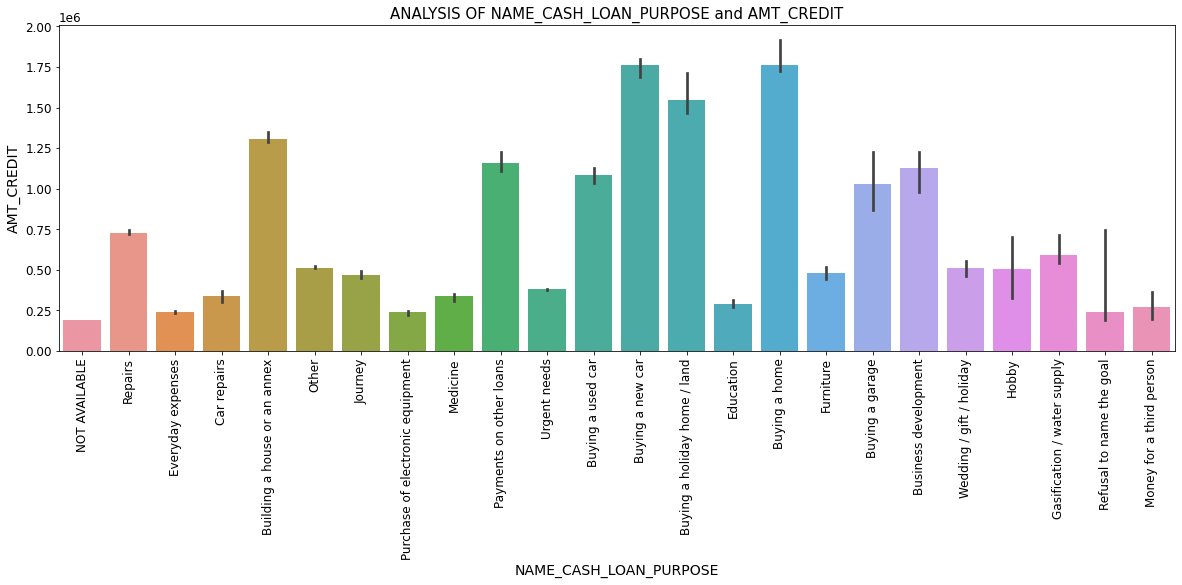

In [350]:
# Analysis of NAME_CASH_LOAN_PURPOSE & AMT_CREDIT
num_cat_bivar('NAME_CASH_LOAN_PURPOSE','AMT_CREDIT')

- Buying a home,Buying a car,Buying a holidayhome/land got more credit than other categories.We know for these loans avail funds by providing your asset as collateral to the lender.So bank can promote this type of safer loans

### Categorical-Categorical Analysis

In [124]:
# Function definition
def cat_cat(column1,column2):
    plt.figure(figsize=(15,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    sns.countplot(data=Prev_data,x=column1,hue=column2,hue_order=sorted(Prev_data[column2].value_counts().index,reverse=True))
    plt.title('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.xticks(rotation=90)
    plt.show()

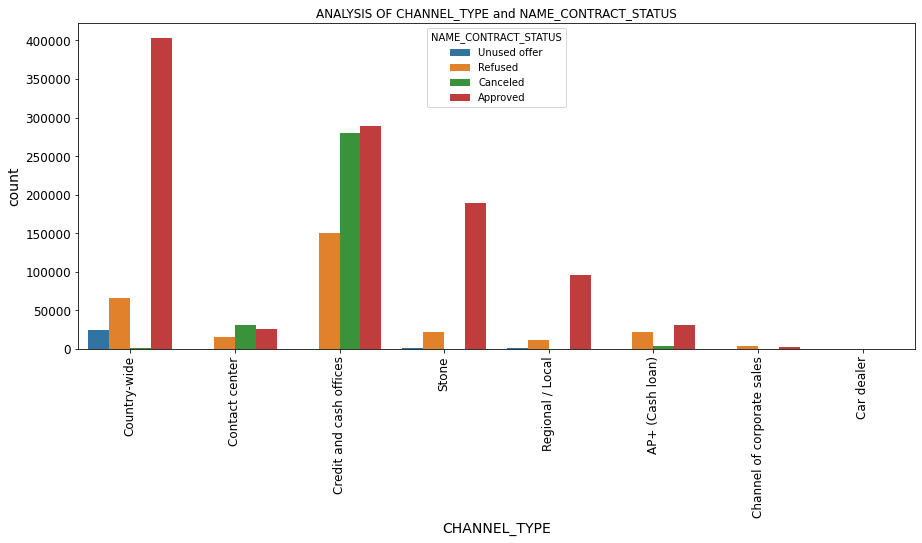

In [125]:
# Analysis of CHANNEL_TYPE & NAME_CONTRACT_STATUS
cat_cat('CHANNEL_TYPE','NAME_CONTRACT_STATUS')

- Country_wide channel has more approved loans than others followed by Credit and cash offices
- Refues and cancelled have more number in Credit and cash offices

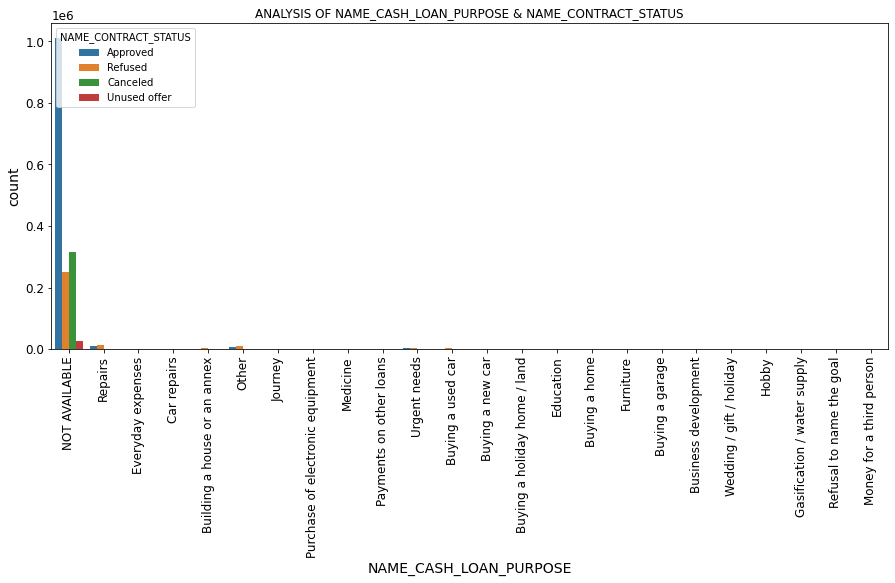

In [312]:
plt.figure(figsize=(15,6))
plt.rcParams['axes.labelsize']=14
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.countplot(data=Prev_data,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',orient='h')
plt.title('ANALYSIS OF NAME_CASH_LOAN_PURPOSE & NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

- Repairs have high refusal rate than Approval rate.Similar for Others also
- For rest couldnt get insights from graph

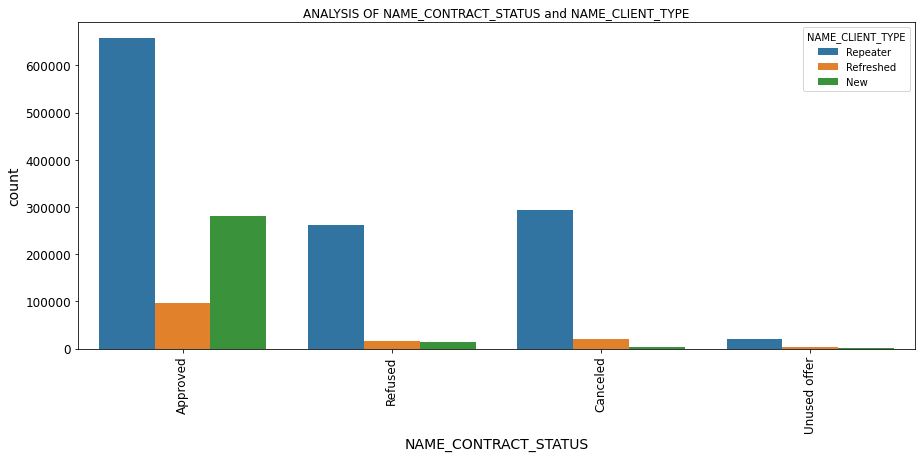

In [353]:
# Analysis of NAME_CONTRACT_STATUS & NAME_CLIENT_TYPE
cat_cat('NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE')

- Repeaters or Old clients  has higher approval rates than new ones

## Merging Application and Previous Application for further Analysis

In [126]:
#Merge App_data and Prev_data with inner join on common column SK_ID_CURR
Merged_data=App_data.merge(Prev_data,on='SK_ID_CURR',how='inner')

In [127]:
#View dataframe
Merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
0                    0.018801   26               2                  10   
1                    0.003541   46               3                   3   
2                    0.003541   46               3                   3   
3                    0.003541   46               3                   3   
4                    0.010032   52               1                  12   

   YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                 6        Laborers              1.0                     2   
1                 1      Core staff              2.0                     1   
2                 1      Core staff              2.0                     1   
3                 1      Core staff              2.0                     1   
4                 7        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                         11                           0   
3                         11                           0   
4                          9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2               

In [128]:
# check shape
Merged_data.shape

(1413701, 77)

In [129]:
# Removing some columns not helping in Analysis
Merged_data.drop(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y',
                  'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                  'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                  'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [130]:
# Rename common name columns for easy identification
Merged_data.rename(columns={'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                           'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START',
                           'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                           'AMT_CREDIT_y':'AMT_CREDIT_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                            'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV'},inplace=True)

In [131]:
# Again check shape
Merged_data.shape

(1413701, 53)

In [307]:
# Display statistical info
Merged_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+05   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

         AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.413701e+06  1.413701e+06     1.413701e+06   
mean   5.875537e+05  2.701688e+04     5.276522e+05   
std    3.849173e+05  1.395072e+04     3.531028e+05   
min    4.500000e+04  1.615500e+03     4.050000e+04   
25%    2.700000e+05  1.682100e+04     2.385000e+05   
50%    5.084955e+05  2.492550e+04     4.500000e+05   
75%    8.079840e+05  3.454200e+04     6.795000e+05   
max    4.050000e+06  2.250000e+05     4.050000e+06   

       REGION_POPULATION_RELATIVE           AGE  YEARS_EMPLOYED  \
count                1.413701e+06  1.413701e+06    1.413701e+06   
mean                 2.074985e-02  4.471711e+01    1.991440e+02   
std                  1.334702e-02  1.191005e+01    3.928366e+02   
min                  2.900000e-04  2.100000e+01    0.000000e+00   
25%                  1.003200e-02  3.500000e+01    3.000000e+00   
50%                  1.885000e-02  4.400000e+01    7.000000e+00   
75%                  2.866300e-02  5.500000e+01    1.700000e+01   
max                  7.250800e-02  6.900000e+01    1.001000e+03   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count        1.413701e+06      1.413701e+06     1.413701e+06   
mean         1.370485e+01      8.309687e+00     2.150501e+00   
std          9.735906e+00      4.145857e+00     9.006787e-01   
min          0.000000e+00      0.000000e+00     1.000000e+00   
25%          5.000000e+00      5.000000e+00     2.000000e+00   
50%          1.200000e+01      9.000000e+00     2.000000e+00   
75%          2.100000e+01      1.200000e+01     3.000000e+00   
max          6.800000e+01      2.000000e+01     2.000000e+01   

       DAYS_LAST_PHONE_CHANGE    SK_ID_PREV  AMT_ANNUITY_PREV  \
count            1.413701e+06  1.413701e+06      1.106483e+06   
mean             2.965060e+00  1.922744e+06      1.583718e+04   
std              2.209678e+00  5.327153e+05      1.472491e+04   
min              0.000000e+00  1.000001e+06      0.000000e+00   
25%              1.000000e+00  1.461346e+06      6.257858e+03   
50%              3.000000e+00  1.922698e+06      1.122376e+04   
75%              5.000000e+00  2.384012e+06      2.042078e+04   
max              1.200000e+01  2.845381e+06      4.180581e+05   

       AMT_APPLICATION  AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV  DAYS_DECISION  \
count     1.413701e+06     1.413700e+06          1.094176e+06   1.413701e+06   
mean      1.752436e+05     1.963541e+05          2.264512e+05   8.803670e+02   
std       2.936222e+05     3.194813e+05          3.159376e+05   7.835402e+02   
min       0.000000e+00     0.000000e+00          0.000000e+00   1.000000e+00   
25%       1.975050e+04     2.488050e+04          4.982850e+04   2.710000e+02   
50%       7.087050e+04     8.059500e+04          1.102455e+05   5.820000e+02   
75%       1.800000e+05     2.156400e+05          2.295000e+05   1.313000e+03   
max       5.850000e+06     4.509688e+06          5.850000e+06   2.922000e+03   

       SELLERPLACE_AREA   CNT_PAYMENT  
count      1.413701e+06  1.106488e+06  
mean       3.149878e+02  1.605194e+01  
std        7.695082e+03  1.456675e+01  
min       -1.000000e+00  0.000000e+00  
25%       -1.000000e+00  6.000000e+00  
50%        4.000000e+00  1.200000e+01  
75%        8.500000e+01  2.400000e+01  
max        4.000000e+06  8.400000e+01

### BIVARIATE ANALYSIS

### Categorical-Categorical Analysis

In [132]:
# Function definition
def cat_cat_merged(column1,column2):
    plt.figure(figsize=(15,6))
    plt.rcParams['axes.labelsize']=14
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    sns.countplot(data=Merged_data,x=column1,hue=column2,hue_order=sorted(Merged_data[column2].value_counts().index,reverse=True))
    plt.title('ANALYSIS OF'+' '+ column1+' and '+column2)
    plt.xticks(rotation=90)
    plt.show()

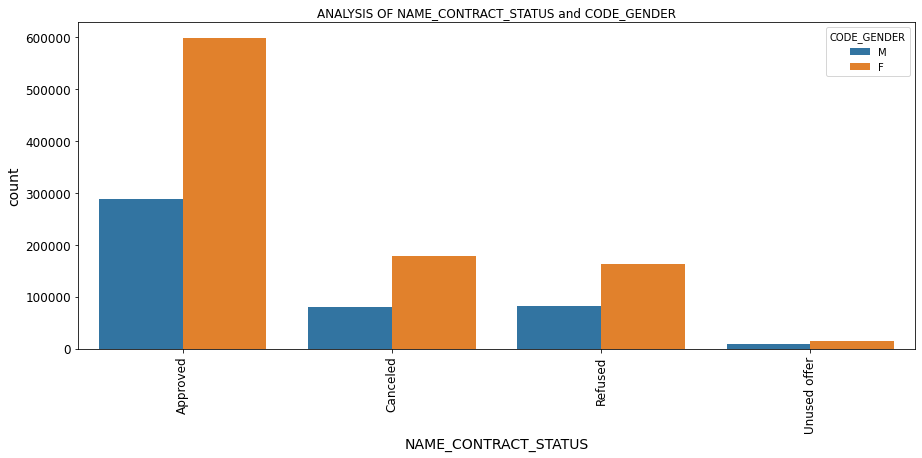

In [133]:
# Analysis of NAME_CONTRACT_STATUS & CODE_GENDER
cat_cat_merged('NAME_CONTRACT_STATUS','CODE_GENDER')

- Female Loan Applications are approved than Male.The reason is their default percentage is less than Ontime payment percentage.

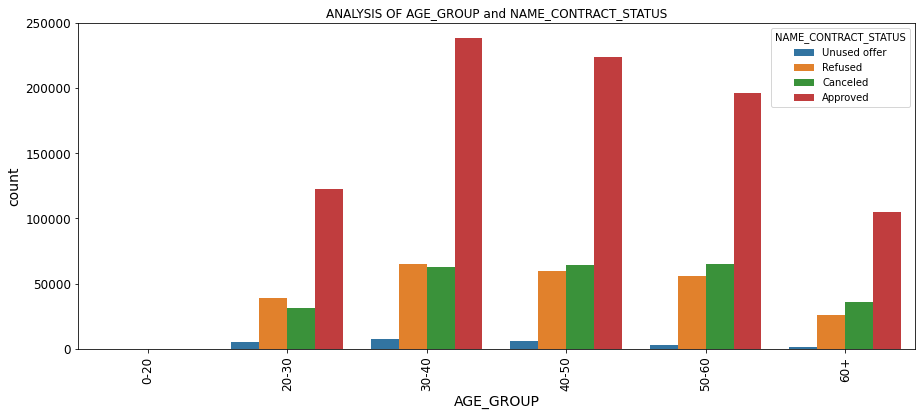

In [316]:
# Analysis of AGE_GROUP & NAME_CONTRACT_STATUS
cat_cat_merged('AGE_GROUP','NAME_CONTRACT_STATUS')

- 30-60 age group has higher Approval rates for previous Application
- 60+ has low refusal rate

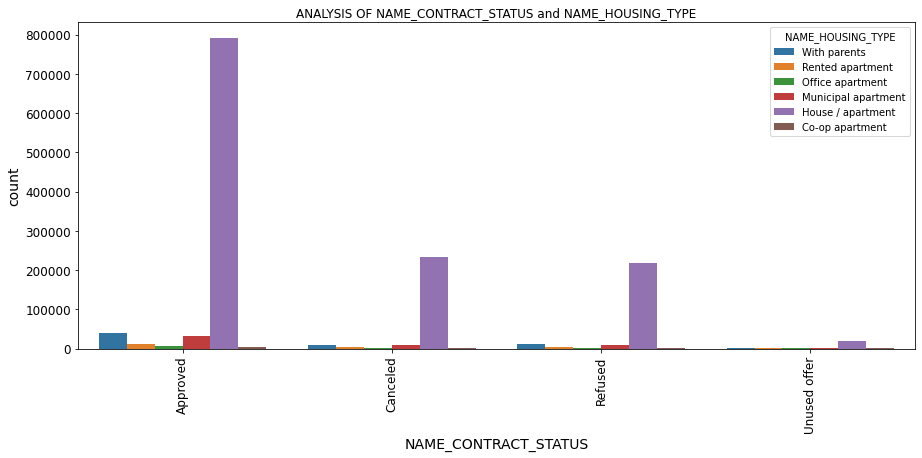

In [317]:
# Analysis of NAME_CONTRACT_STATUS & NAME_HOUSING_TYPE
cat_cat_merged('NAME_CONTRACT_STATUS','NAME_HOUSING_TYPE')

- Clients have housing type as House/Apartment got more loan approvals than others

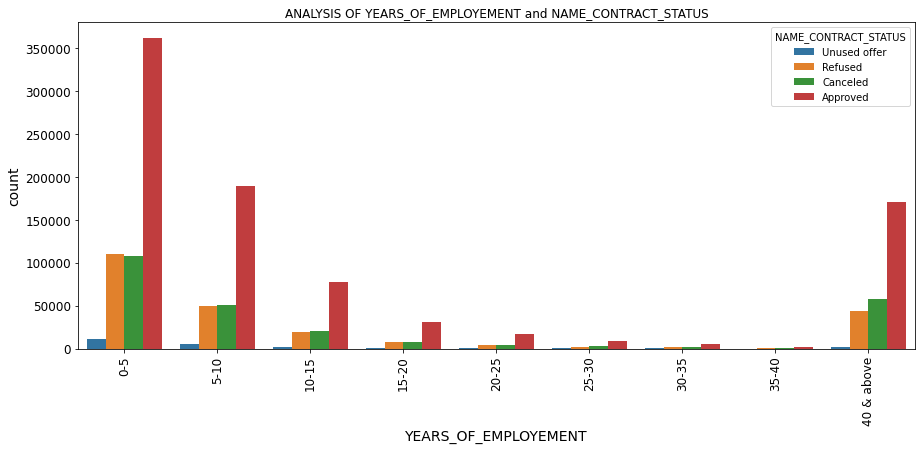

In [318]:
# Analysis of YEARS_OF_EMPLOYEMENT & NAME_CONTRACT_STATUS
cat_cat_merged('YEARS_OF_EMPLOYEMENT','NAME_CONTRACT_STATUS')

- Maximum loan approvals given for 0-5 years exoerience followed by 5-10

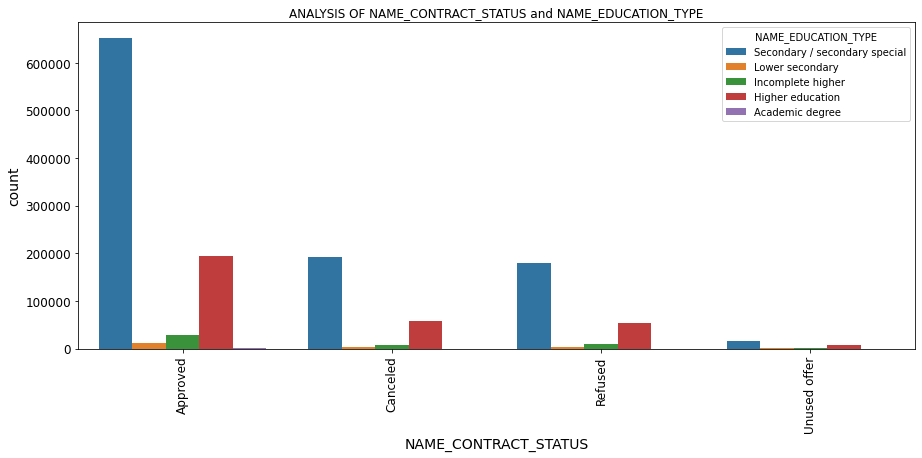

In [319]:
# Analysis of NAME_CONTRACT_STATUS & NAME_EDUCATION_TYPE
cat_cat_merged('NAME_CONTRACT_STATUS','NAME_EDUCATION_TYPE')

- Secondary/Secondary special has got higher loan approvals followed by Higher Education in previous application.But they are high in defaulters category also

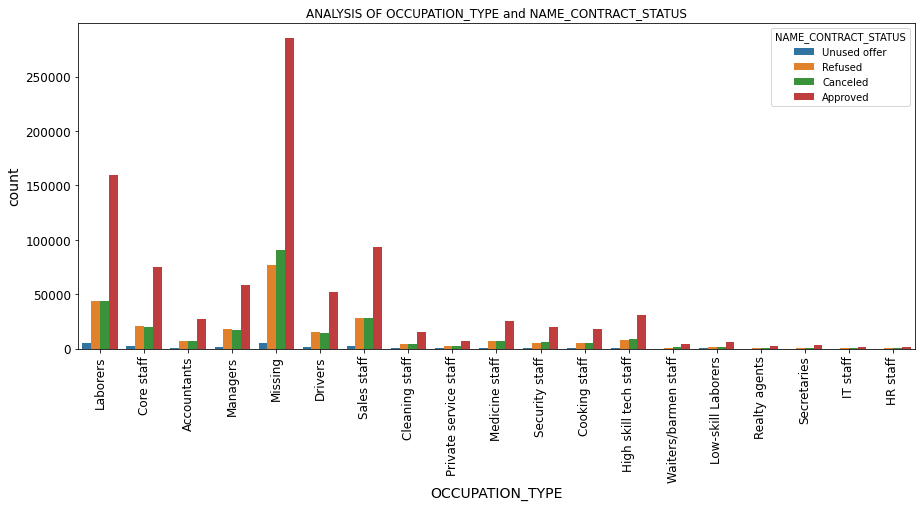

In [320]:
# Analysis of OCCUPATION_TYPE & NAME_CONTRACT_STATUS
cat_cat_merged('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')

- High Loan approvals were given for Laborers and Sales staff.

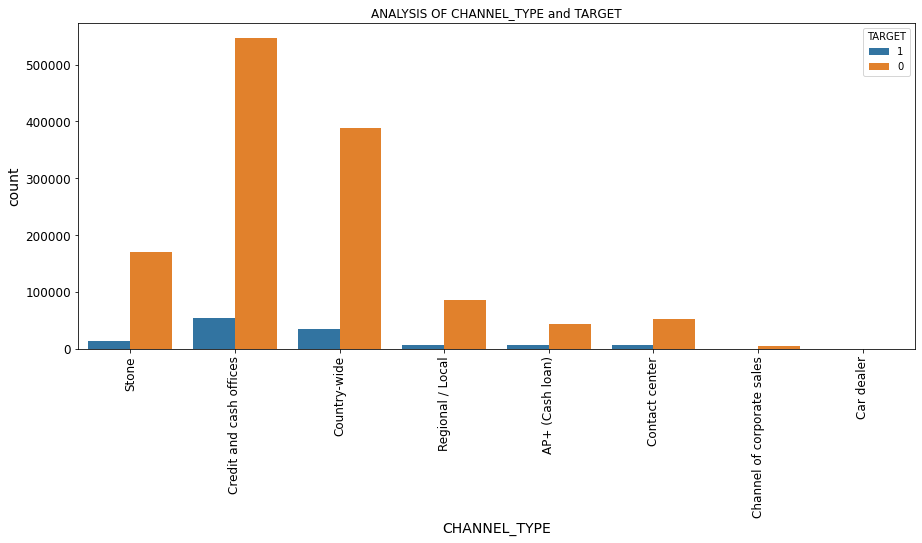

In [321]:
# Analysis of CHANNEL_TYPE & TARGET
cat_cat_merged('CHANNEL_TYPE','TARGET')

- Credit and cash offices has more clients without payement difficulties followes by country-wide
- Car dealer and Channel of corporate sales have clients who are defaulters

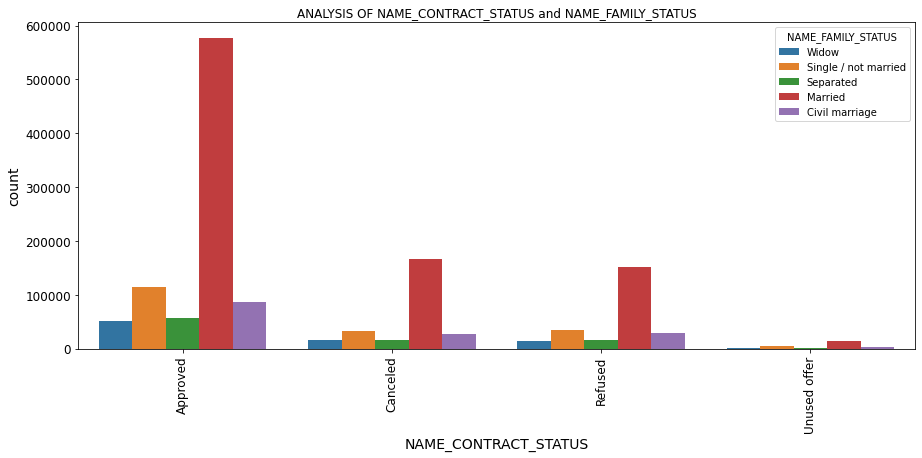

In [322]:
# Analysis of NAME_CONTRACT_STATUS & NAME_FAMILY_STATUS
cat_cat_merged('NAME_CONTRACT_STATUS','NAME_FAMILY_STATUS')

- Married clients outnumbered other categories in loan approval in previous application followed by single and Civil Marriage

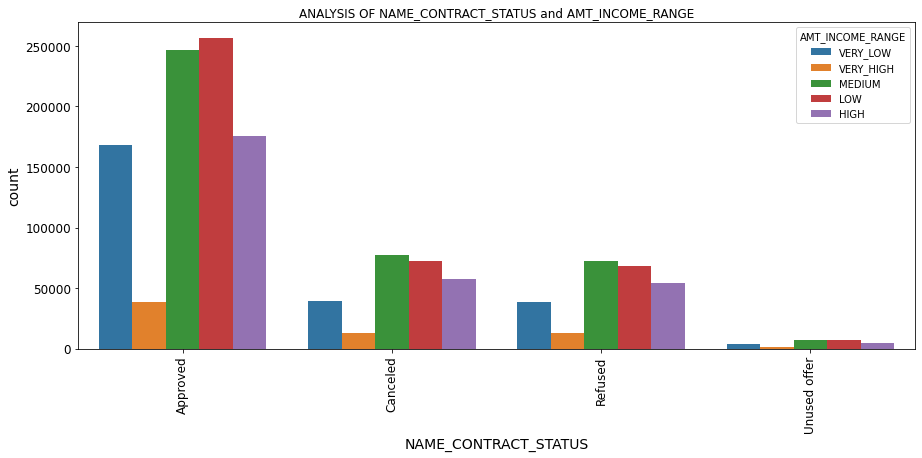

In [323]:
# Analysis of NAME_CONTRACT_STATUS & AMT_INCOME_RANGE
cat_cat_merged('NAME_CONTRACT_STATUS','AMT_INCOME_RANGE')

- Low and Medium and very low income clients loan were approved more in previous application.But they are high in defaulters category also

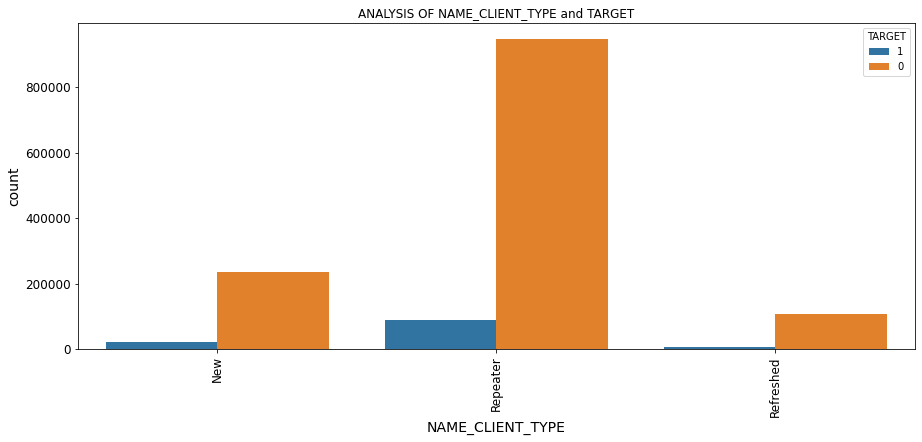

In [324]:
# Analysis of NAME_CLIENT_TYPE & TARGET
cat_cat_merged('NAME_CLIENT_TYPE','TARGET')

- Generally Repeaters or Old clients are ontime payers than New and Refreshed clients

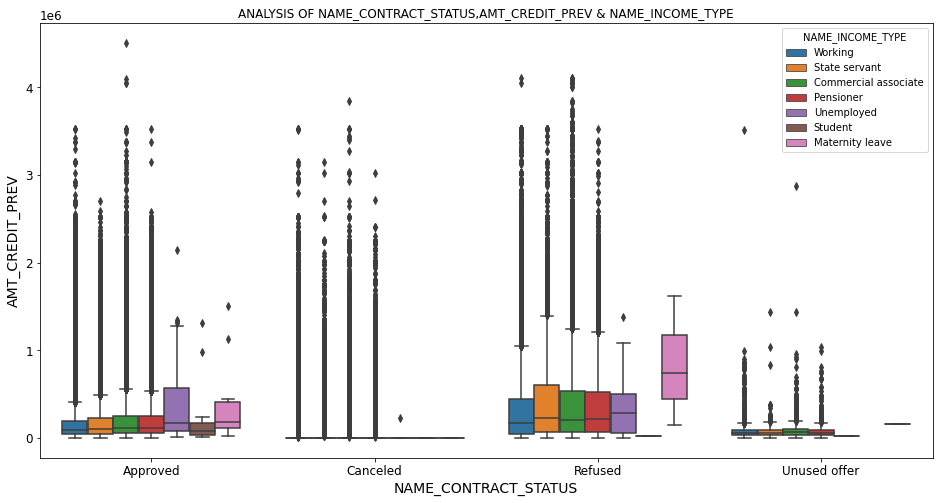

In [325]:
#Multivariate
plt.figure(figsize=(16,8))
sns.boxplot(data=Merged_data,x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_PREV',hue='NAME_INCOME_TYPE')
plt.title('ANALYSIS OF NAME_CONTRACT_STATUS,AMT_CREDIT_PREV & NAME_INCOME_TYPE') 
plt.show()

- Clients in Maternity leave loan applications with high amount has been rejected by bank.
- Students Loan requests has been approved,So they are good Targets
- Outliers are there in all cases

### <b> CONCLUSION: </b>

- Female tends to repay loan ontime than Males.So focus should be given to Females when Approving Loans
- Laborers are higher defaulters.So loan approval to them should be done with care
- Businessman and Students tends to pay loan ontime.Maternity leave clients even their representation is less defaults more
- Married ones are high in both categories so check should be done on other factors also when approving loan to them
- Very low and low income people tends to apply for loan most and defaults most.So further checks to be done when approving loan
- Focus more on Academic degree and higher education than secondary education when approving loans